In [ ]:
# Import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from pandas.io.parsers.readers import annotations
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation




In [ ]:
url = "/content/LA4Schools (1).csv"

In [ ]:
Data2Intel_EduRisk_Dataset = pd.read_csv(url)


print(Data2Intel_EduRisk_Dataset.head(5))

   StudentID  TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  \
0  384710734                16                18                25   
1  504699264                 8                12                17   
2  332227462                 8                12                18   
3  245262793                11                16                25   
4  331173944                 9                12                17   

   TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  WritingVocab-01-SOY  \
0                25                30                32                   20   
1                19                18                21                   40   
2                18                23                22                    6   
3                27                26                31                   41   
4                21                24                26                   26   

   HRSIW-01-SOY  Counting-01  ...  NCCD-Funded  NumSibling  SiblingOrder  \
0            49       

In [ ]:
print(f"The dataset consists of information on {Data2Intel_EduRisk_Dataset.shape[0]} primary school students, "
      f"capturing their educational performance across {Data2Intel_EduRisk_Dataset.shape[1]} attributes.\n\n"
      f"Columns and their types:\n{Data2Intel_EduRisk_Dataset.dtypes}")


The dataset consists of information on 2000 primary school students, capturing their educational performance across 34 attributes.

Columns and their types:
StudentID                           int64
TextLevel-01-SOY                    int64
TextLevel-01-MOY                    int64
TextLevel-01-EOY                    int64
TextLevel-02-SOY                    int64
TextLevel-02-MOY                    int64
TextLevel-02-EOY                    int64
WritingVocab-01-SOY                 int64
HRSIW-01-SOY                        int64
Counting-01                         int64
Counting-02                         int64
Place Value-01                      int64
Place Value-02                      int64
Addition and Subtraction-01         int64
Addition and Subtraction-02         int64
Multiplication and Division-01      int64
Multiplication and Division-02      int64
Kinder_Age                        float64
Gender                             object
Disability_Non-disable              int64
Dis

In [ ]:
# Drop the 'StudentID' column inplace
Data2Intel_EduRisk_Dataset.drop(columns=['StudentID'], inplace=True)


In [ ]:
# Checking for null values in each column
null_values =Data2Intel_EduRisk_Dataset.isnull().sum()

# Displaying the result
for column, count in null_values.items():
    if count == 0:
        print(f"{column} has No Null Values")
    else:
        print(f"{column}: {count}   Null Values Found")


TextLevel-01-SOY has No Null Values
TextLevel-01-MOY has No Null Values
TextLevel-01-EOY has No Null Values
TextLevel-02-SOY has No Null Values
TextLevel-02-MOY has No Null Values
TextLevel-02-EOY has No Null Values
WritingVocab-01-SOY has No Null Values
HRSIW-01-SOY has No Null Values
Counting-01 has No Null Values
Counting-02 has No Null Values
Place Value-01 has No Null Values
Place Value-02 has No Null Values
Addition and Subtraction-01 has No Null Values
Addition and Subtraction-02 has No Null Values
Multiplication and Division-01 has No Null Values
Multiplication and Division-02 has No Null Values
Kinder_Age has No Null Values
Gender has No Null Values
Disability_Non-disable has No Null Values
Disability_Cognitive has No Null Values
Disability_Physical has No Null Values
Disability_Sensory has No Null Values
Disability_SocialEmotional has No Null Values
NCCD-Funded has No Null Values
NumSibling has No Null Values
SiblingOrder has No Null Values
01.SES has No Null Values
02.SES ha

# TASK-1 QUESTION-1




## Target Variable (Numeracy_at_Risk)

                              Value
Total Students                 2000
Mean (Proportion At Risk)      0.25
Mode                          False
Standard Deviation         0.433121


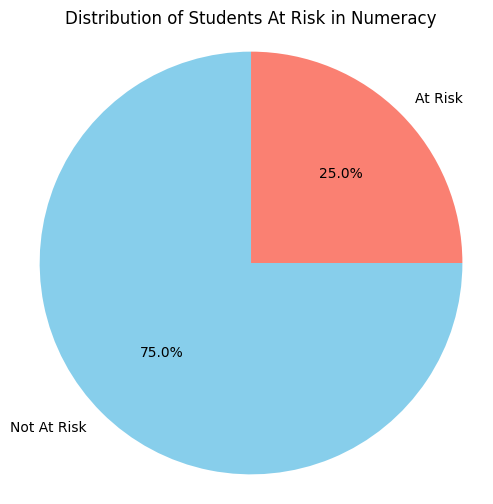

In [ ]:
summary_stats = {
    'Total Students': Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'].count(),
    'Mean (Proportion At Risk)': Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'].mean(),
    'Mode': Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'].mode()[0],
    'Standard Deviation': Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'].std()
}

# Converting to DataFrame for display
summary_Stats = pd.DataFrame.from_dict(summary_stats, orient='index', columns=['Value'])

print(summary_Stats)# Count the values in 'At_Risk_Numeracy'
counts = Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'].value_counts()

# Defining labels
labels = ['Not At Risk', 'At Risk']

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Students At Risk in Numeracy')
plt.axis('equal')
plt.show()


#Univariate Analysis

## Kinder Age

count    2000.000000
mean        5.276805
std         0.347251
min         4.504110
25%         5.015753
50%         5.282192
75%         5.534247
max         6.534247
Name: Kinder_Age, dtype: float64


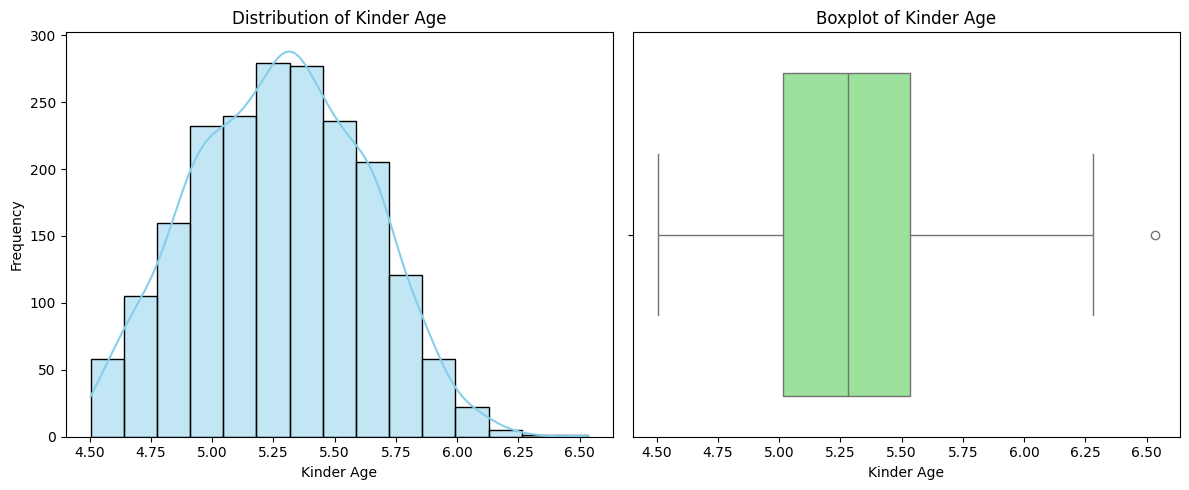

In [ ]:
kinder_age_stats = Data2Intel_EduRisk_Dataset['Kinder_Age'].describe()
print(kinder_age_stats)
plt.figure(figsize=(12, 5))

# Histogram for Kinder_Age
plt.subplot(1, 2, 1)
sns.histplot(Data2Intel_EduRisk_Dataset['Kinder_Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Kinder Age')
plt.xlabel('Kinder Age')
plt.ylabel('Frequency')

# Boxplot for Kinder_Age
plt.subplot(1, 2, 2)
sns.boxplot(x=Data2Intel_EduRisk_Dataset['Kinder_Age'], color='lightgreen')
plt.title('Boxplot of Kinder Age')
plt.xlabel('Kinder Age')

# Display the plots
plt.tight_layout()
plt.show()

count    2000.000000
mean        5.276805
std         0.347251
min         4.504110
25%         5.015753
50%         5.282192
75%         5.534247
max         6.534247
Name: Kinder_Age, dtype: float64


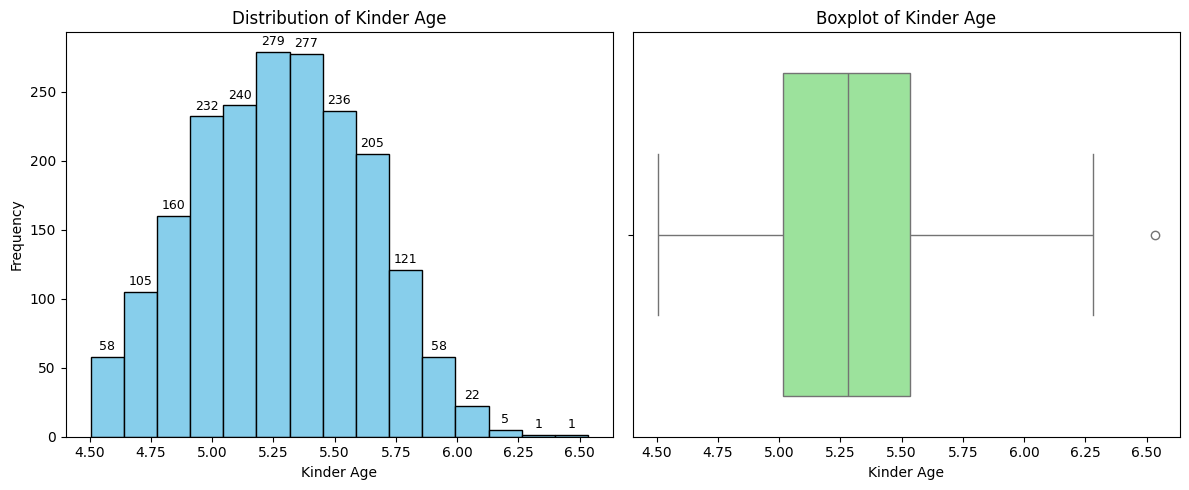

In [ ]:
import numpy as np

# Summary statistics
kinder_age_stats = Data2Intel_EduRisk_Dataset['Kinder_Age'].describe()
print(kinder_age_stats)

plt.figure(figsize=(12, 5))

# Histogram for Kinder_Age with value labels
plt.subplot(1, 2, 1)

# Create histogram manually for counts
counts, bins, patches = plt.hist(Data2Intel_EduRisk_Dataset['Kinder_Age'], bins=15, color='skyblue', edgecolor='black')

# Add number labels on top of bars
for count, bin_left in zip(counts, bins[:-1]):
    plt.text(bin_left + (bins[1] - bins[0])/2, count + 5, str(int(count)), ha='center', fontsize=9)

# Titles and labels
plt.title('Distribution of Kinder Age')
plt.xlabel('Kinder Age')
plt.ylabel('Frequency')

# Boxplot for Kinder_Age
plt.subplot(1, 2, 2)
sns.boxplot(x=Data2Intel_EduRisk_Dataset['Kinder_Age'], color='lightgreen')
plt.title('Boxplot of Kinder Age')
plt.xlabel('Kinder Age')

# Display both plots
plt.tight_layout()
plt.show()


## Gender


Total Students: 2000
Unique Genders: 2

Gender Counts:
 Gender
Male      1018
Female     982
Name: count, dtype: int64

Gender Percentages (%):
 Gender
Male      50.9
Female    49.1
Name: proportion, dtype: float64

Most Frequent Gender (Mode): Male
Frequency of Mode: 1018
Most Common Gender Among At-Risk Students: Male


<ipython-input-11-863ac837eda7>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=Data2Intel_EduRisk_Dataset, palette='dark')


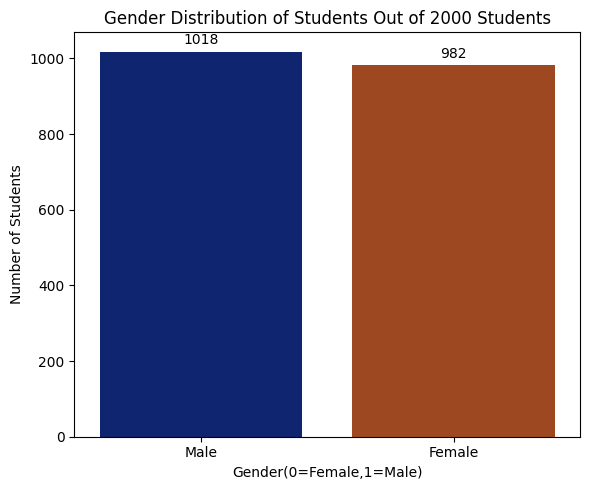

In [ ]:

# Total number of students
total_students = Data2Intel_EduRisk_Dataset['Gender'].count()

# Total number of unique genders
unique_genders = Data2Intel_EduRisk_Dataset['Gender'].nunique()

# Value counts of each gender
gender_counts = Data2Intel_EduRisk_Dataset['Gender'].value_counts()

# Mode (most frequent gender)
gender_mode = Data2Intel_EduRisk_Dataset['Gender'].mode()[0]

# Frequency of most common gender
gender_mode_freq = gender_counts[gender_mode]

# Percentage distribution of genders
gender_percentages = Data2Intel_EduRisk_Dataset['Gender'].value_counts(normalize=True) * 100

# Mode of gender among students at risk
at_risk_gender_mode = Data2Intel_EduRisk_Dataset[Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'] == 1]['Gender'].mode()[0]

# Printing results
print("Total Students:", total_students)
print("Unique Genders:", unique_genders)
print("\nGender Counts:\n", gender_counts)
print("\nGender Percentages (%):\n", gender_percentages.round(2))
print("\nMost Frequent Gender (Mode):", gender_mode)
print("Frequency of Mode:", gender_mode_freq)
print("Most Common Gender Among At-Risk Students:", at_risk_gender_mode)

# Gender Distribution with counts
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Gender', data=Data2Intel_EduRisk_Dataset, palette='dark')

# Titles and axis labels
plt.title('Gender Distribution of Students Out of 2000 Students')
plt.xlabel('Gender(0=Female,1=Male)')
plt.ylabel('Number of Students')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Show the plot
plt.tight_layout()
plt.show()



## Disability-Non Disable

Total Students (with Disability Status): 2000

Disability Counts:
 Disability_Non-disable
Non-Disabled    1381
Disabled         619
Name: count, dtype: int64

Disability Percentages (%):
 Disability_Non-disable
Non-Disabled    69.05
Disabled        30.95
Name: proportion, dtype: float64

Most Frequent Disability Status (Mode): Non-Disabled
Frequency of Mode: 1381
Most Common Disability Status Among At-Risk Students: Disabled


<ipython-input-12-c5cf630ea24b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Disability_Non-disable', data=Data2Intel_EduRisk_Dataset, palette='dark')


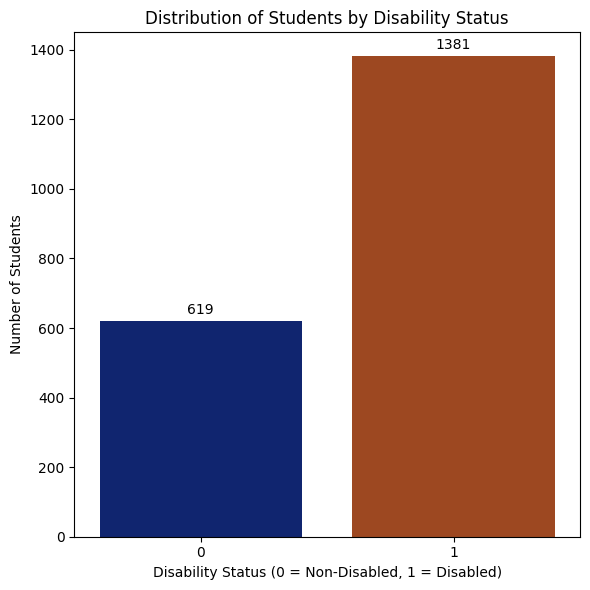

In [ ]:
# Total number of students (non-null values)
total_students = Data2Intel_EduRisk_Dataset['Disability_Non-disable'].count()

# Count of each category (1 = Non-disabled, 0 = Disabled)
disability_counts = Data2Intel_EduRisk_Dataset['Disability_Non-disable'].value_counts().rename(index={1: 'Non-Disabled', 0: 'Disabled'})

# Percentage of each category
disability_percentages = Data2Intel_EduRisk_Dataset['Disability_Non-disable'].value_counts(normalize=True).rename(index={1: 'Non-Disabled', 0: 'Disabled'}) * 100

# Mode (most common disability status)
disability_mode = Data2Intel_EduRisk_Dataset['Disability_Non-disable'].mode()[0]
disability_mode_label = 'Non-Disabled' if disability_mode == 1 else 'Disabled'
mode_frequency = disability_counts[disability_mode_label]

# Mode among At-Risk students
at_risk_mode = Data2Intel_EduRisk_Dataset[Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'] == 1]['Disability_Non-disable'].mode()[0]
at_risk_mode_label = 'Non-Disabled' if at_risk_mode == 1 else 'Disabled'

# Printing the summary
print("Total Students (with Disability Status):", total_students)
print("\nDisability Counts:\n", disability_counts)
print("\nDisability Percentages (%):\n", disability_percentages.round(2))
print("\nMost Frequent Disability Status (Mode):", disability_mode_label)
print("Frequency of Mode:", mode_frequency)
print("Most Common Disability Status Among At-Risk Students:", at_risk_mode_label)


# Plot for Disability Status with counts
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Disability_Non-disable', data=Data2Intel_EduRisk_Dataset, palette='dark')

# Custom axis labels and title
plt.title('Distribution of Students by Disability Status')
plt.xlabel('Disability Status (0 = Non-Disabled, 1 = Disabled)')
plt.ylabel('Number of Students')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Display the plot
plt.tight_layout()
plt.show()





## Disability_Cognitive


Descriptive Summary:
 count    2000.000000
mean        0.234500
std         0.423792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Disability_Cognitive, dtype: float64

Value Counts:
 Disability_Cognitive
0    1531
1     469
Name: count, dtype: int64

Percentage Distribution (%):
 Disability_Cognitive
0    76.55
1    23.45
Name: proportion, dtype: float64

Most Frequent Category (Mode): 0


<ipython-input-13-f43c17113b17>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Disability_Cognitive', data=Data2Intel_EduRisk_Dataset, palette='colorblind')


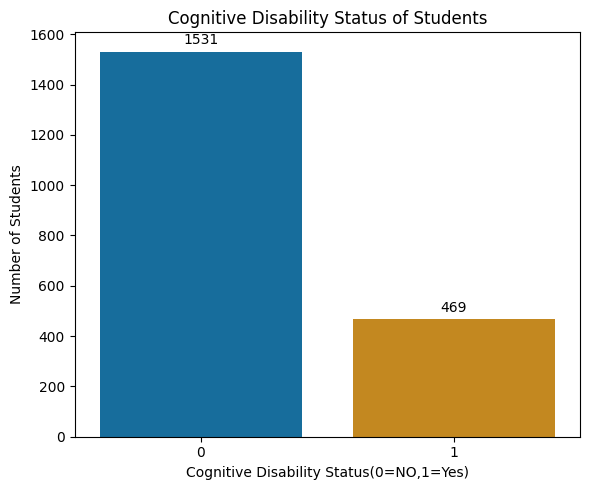

In [ ]:
# Basic describe for categorical variable
cognitive_desc = Data2Intel_EduRisk_Dataset['Disability_Cognitive'].describe()

# Value counts
cognitive_counts = Data2Intel_EduRisk_Dataset['Disability_Cognitive'].value_counts()

# Percentages
cognitive_percentages = Data2Intel_EduRisk_Dataset['Disability_Cognitive'].value_counts(normalize=True) * 100

# Mode (most frequent category)
cognitive_mode = Data2Intel_EduRisk_Dataset['Disability_Cognitive'].mode()[0]

# Display summary
print("Descriptive Summary:\n", cognitive_desc)
print("\nValue Counts:\n", cognitive_counts)
print("\nPercentage Distribution (%):\n", cognitive_percentages.round(2))
print("\nMost Frequent Category (Mode):", cognitive_mode)


# Plot for Cognitive Disability with value labels
plt.figure(figsize=(6,5))
ax = sns.countplot(x='Disability_Cognitive', data=Data2Intel_EduRisk_Dataset, palette='colorblind')

# Title and axis labels
plt.title('Cognitive Disability Status of Students')
plt.xlabel('Cognitive Disability Status(0=NO,1=Yes)')
plt.ylabel('Number of Students')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Display the plot
plt.tight_layout()
plt.show()



## Disability_Sensory


Descriptive Summary:
 count    2000.000000
mean        0.005000
std         0.070551
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Disability_Sensory, dtype: float64

Value Counts:
 Disability_Sensory
0    1990
1      10
Name: count, dtype: int64

Percentage Distribution (%):
 Disability_Sensory
0    99.5
1     0.5
Name: proportion, dtype: float64

Most Frequent Category (Mode): 0


<ipython-input-14-9d0870e8e720>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Disability_Sensory', data=Data2Intel_EduRisk_Dataset, palette='dark')


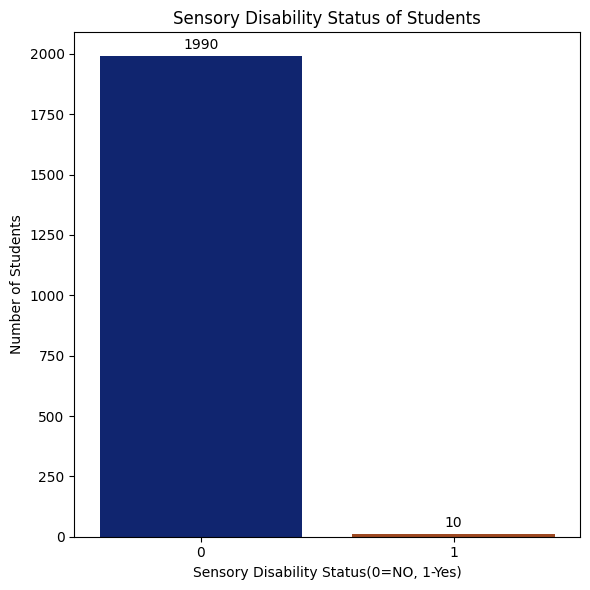

In [ ]:
# Describe for categorical variable
sensory_desc = Data2Intel_EduRisk_Dataset['Disability_Sensory'].describe()

# Value counts
sensory_counts = Data2Intel_EduRisk_Dataset['Disability_Sensory'].value_counts()

# Percentages
sensory_percentages = Data2Intel_EduRisk_Dataset['Disability_Sensory'].value_counts(normalize=True) * 100

# Mode (most frequent category)
sensory_mode = Data2Intel_EduRisk_Dataset['Disability_Sensory'].mode()[0]

# Print results
print("Descriptive Summary:\n", sensory_desc)
print("\nValue Counts:\n", sensory_counts)
print("\nPercentage Distribution (%):\n", sensory_percentages.round(2))
print("\nMost Frequent Category (Mode):", sensory_mode)


# Sensory Disability Countplot with Value Labels
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Disability_Sensory', data=Data2Intel_EduRisk_Dataset, palette='dark')

# Titles and axis labels
plt.title('Sensory Disability Status of Students')
plt.xlabel('Sensory Disability Status(0=NO, 1-Yes)')
plt.ylabel('Number of Students')

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Show plot
plt.tight_layout()
plt.show()


## Disability_SocialEmotional

Descriptive Summary:
 count    2000.000000
mean        0.036500
std         0.187578
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Disability_SocialEmotional, dtype: float64

Value Counts:
 Disability_SocialEmotional
0    1927
1      73
Name: count, dtype: int64

Percentage Distribution (%):
 Disability_SocialEmotional
0    96.35
1     3.65
Name: proportion, dtype: float64

Most Frequent Category (Mode): 0


<ipython-input-15-f5937b66893b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Disability_SocialEmotional', data=Data2Intel_EduRisk_Dataset, palette='pastel')


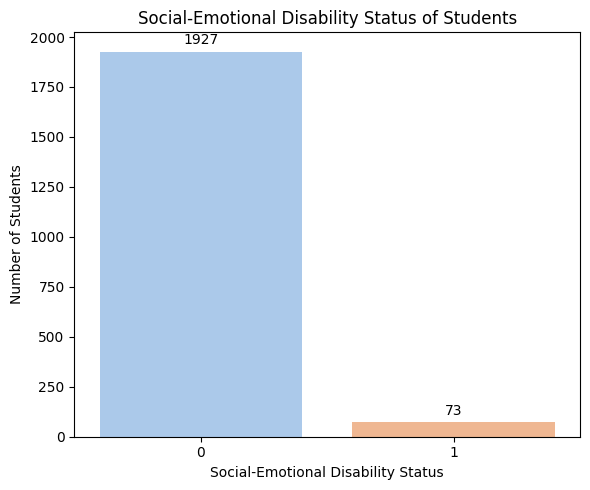

In [ ]:
# Describe basic stats
socialemotional_desc = Data2Intel_EduRisk_Dataset['Disability_SocialEmotional'].describe()

# Value counts
socialemotional_counts = Data2Intel_EduRisk_Dataset['Disability_SocialEmotional'].value_counts()

# Percentage distribution
socialemotional_percentages = Data2Intel_EduRisk_Dataset['Disability_SocialEmotional'].value_counts(normalize=True) * 100

# Mode (most frequent value)
socialemotional_mode = Data2Intel_EduRisk_Dataset['Disability_SocialEmotional'].mode()[0]

# Print results
print("Descriptive Summary:\n", socialemotional_desc)
print("\nValue Counts:\n", socialemotional_counts)
print("\nPercentage Distribution (%):\n", socialemotional_percentages.round(2))
print("\nMost Frequent Category (Mode):", socialemotional_mode)


# Plot for Social-Emotional Disability with value labels
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Disability_SocialEmotional', data=Data2Intel_EduRisk_Dataset, palette='pastel')

# Titles and axis labels
plt.title('Social-Emotional Disability Status of Students')
plt.xlabel('Social-Emotional Disability Status')
plt.ylabel('Number of Students')

# Add number labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Show plot
plt.tight_layout()
plt.show()


## NCCD-Funded

Descriptive Summary:
 count    2000.000000
mean        0.089000
std         0.284815
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: NCCD-Funded, dtype: float64

Value Counts:
 NCCD-Funded
0    1822
1     178
Name: count, dtype: int64

Percentage Distribution (%):
 NCCD-Funded
0    91.1
1     8.9
Name: proportion, dtype: float64

Most Frequent Category (Mode): 0


<ipython-input-16-405148165174>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='NCCD-Funded', data=Data2Intel_EduRisk_Dataset, palette='muted')


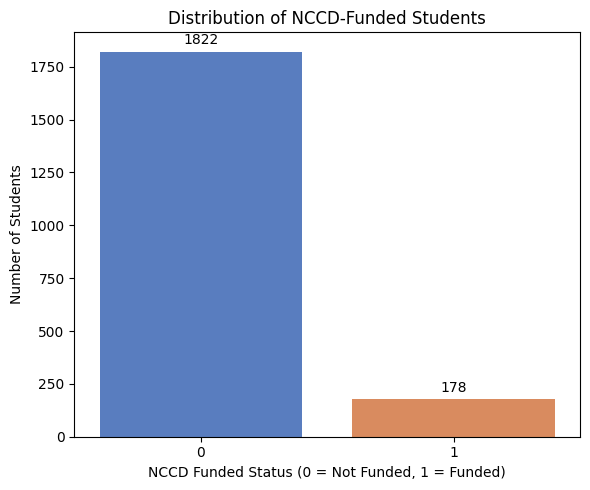

In [ ]:
# Describe the column
nccd_desc = Data2Intel_EduRisk_Dataset['NCCD-Funded'].describe()

# Count of each category
nccd_counts = Data2Intel_EduRisk_Dataset['NCCD-Funded'].value_counts()

# Percentage distribution
nccd_percentages = Data2Intel_EduRisk_Dataset['NCCD-Funded'].value_counts(normalize=True) * 100

# Mode (most frequent value)
nccd_mode = Data2Intel_EduRisk_Dataset['NCCD-Funded'].mode()[0]

# Print all results
print("Descriptive Summary:\n", nccd_desc)
print("\nValue Counts:\n", nccd_counts)
print("\nPercentage Distribution (%):\n", nccd_percentages.round(2))
print("\nMost Frequent Category (Mode):", nccd_mode)


# Plot for NCCD-Funded status with value labels
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='NCCD-Funded', data=Data2Intel_EduRisk_Dataset, palette='muted')

# Title and axis labels
plt.title('Distribution of NCCD-Funded Students')
plt.xlabel('NCCD Funded Status (0 = Not Funded, 1 = Funded)')
plt.ylabel('Number of Students')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Display the plot
plt.tight_layout()
plt.show()


## Number of Sibling


Descriptive Summary:
 count    2000.000000
mean        2.356500
std         0.993932
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: NumSibling, dtype: float64

Value Counts:
 NumSibling
1    339
2    911
3    535
4    155
5     36
6     21
7      3
Name: count, dtype: int64

Percentage Distribution (%):
 NumSibling
1    16.95
2    45.55
3    26.75
4     7.75
5     1.80
6     1.05
7     0.15
Name: count, dtype: float64

Most Frequent Number of Siblings (Mode): 2


<ipython-input-17-13263a87d343>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='NumSibling', data=Data2Intel_EduRisk_Dataset, palette='muted')


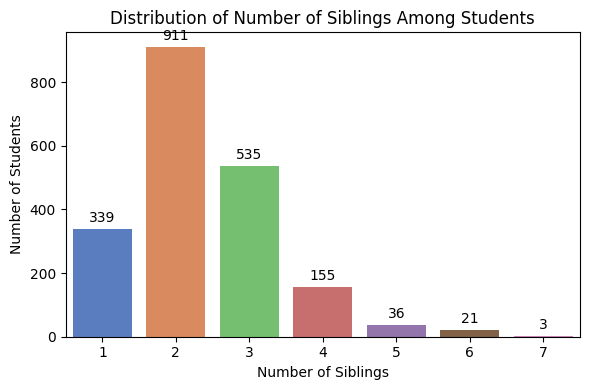

In [ ]:
# Describe basic stats for numeric discrete variable
numsibling_desc = Data2Intel_EduRisk_Dataset['NumSibling'].describe()

# Value counts for each sibling count
numsibling_counts = Data2Intel_EduRisk_Dataset['NumSibling'].value_counts().sort_index()

# Percentage distribution
numsibling_percentages = numsibling_counts / numsibling_counts.sum() * 100

# Mode (most common number of siblings)
numsibling_mode = Data2Intel_EduRisk_Dataset['NumSibling'].mode()[0]

# Print results
print("Descriptive Summary:\n", numsibling_desc)
print("\nValue Counts:\n", numsibling_counts)
print("\nPercentage Distribution (%):\n", numsibling_percentages.round(2))
print("\nMost Frequent Number of Siblings (Mode):", numsibling_mode)


# Countplot for Number of Siblings
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='NumSibling', data=Data2Intel_EduRisk_Dataset, palette='muted')

# Titles and axis labels
plt.title('Distribution of Number of Siblings Among Students')
plt.xlabel('Number of Siblings')
plt.ylabel('Number of Students')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


## SiblingOrder

Descriptive Summary:
 count    2000.000000
mean        1.748500
std         0.865229
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: SiblingOrder, dtype: float64

Value Counts:
 SiblingOrder
1    942
2    718
3    260
4     64
5     13
6      3
Name: count, dtype: int64

Percentage Distribution (%):
 SiblingOrder
1    47.10
2    35.90
3    13.00
4     3.20
5     0.65
6     0.15
Name: count, dtype: float64

Most Frequent Sibling Order (Mode): 1


<ipython-input-18-b041ed0ec526>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SiblingOrder', data=Data2Intel_EduRisk_Dataset, palette='muted')


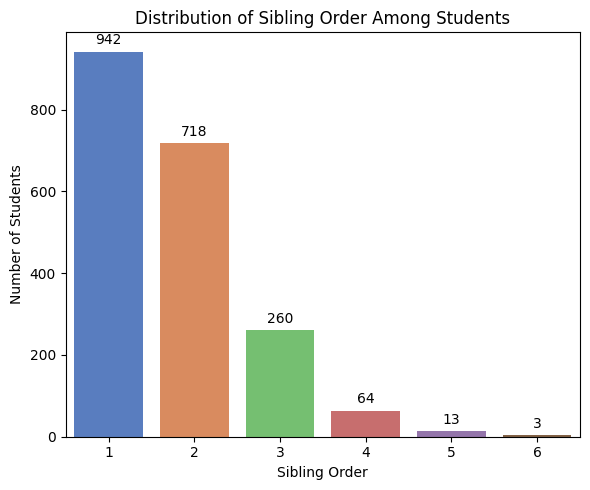

In [ ]:
# Basic descriptive stats
siblingorder_desc = Data2Intel_EduRisk_Dataset['SiblingOrder'].describe()

# Value counts
siblingorder_counts = Data2Intel_EduRisk_Dataset['SiblingOrder'].value_counts().sort_index()

# Percentage distribution
siblingorder_percentages = siblingorder_counts / siblingorder_counts.sum() * 100

# Mode (most common sibling order)
siblingorder_mode = Data2Intel_EduRisk_Dataset['SiblingOrder'].mode()[0]

# Print results
print("Descriptive Summary:\n", siblingorder_desc)
print("\nValue Counts:\n", siblingorder_counts)
print("\nPercentage Distribution (%):\n", siblingorder_percentages.round(2))
print("\nMost Frequent Sibling Order (Mode):", siblingorder_mode)

# Countplot for Sibling Order
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='SiblingOrder', data=Data2Intel_EduRisk_Dataset, palette='muted')

# Titles and axis labels
plt.title('Distribution of Sibling Order Among Students')
plt.xlabel('Sibling Order')
plt.ylabel('Number of Students')

# Add number labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


TAK-1 QUESTION-2

# Task-1 Question2

## Numeracy-oriented assessments





# Univariate Analysis

## Counting-01

Descriptive Statistics for Counting-01:
count    2000.000000
mean        1.758000
std         0.935881
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Counting-01, dtype: float64


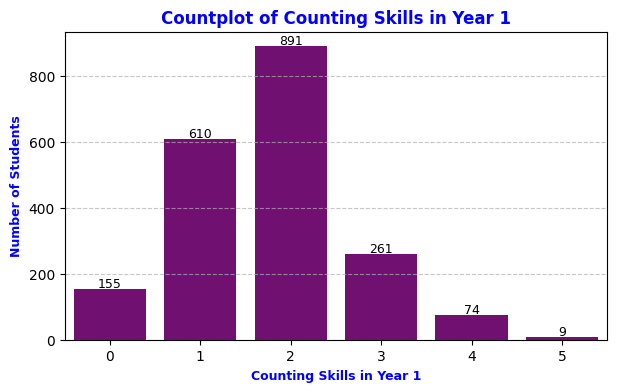

In [ ]:
print("Descriptive Statistics for Counting-01:")
print(Data2Intel_EduRisk_Dataset['Counting-01'].describe())

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Counting-01', data=Data2Intel_EduRisk_Dataset, color='purple')
plt.title('Countplot of Counting Skills in Year 1', fontsize=12, fontweight='bold', color='blue')
plt.xlabel('Counting Skills in Year 1', fontsize=9, fontweight='bold', color='blue')
plt.ylabel('Number of Students', fontsize=9, fontweight='bold', color='blue')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Added number labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha="center", fontsize=9, color='black')

plt.show()


## Place Value-01


Descriptive Statistics for Place Value-01:
count    2000.000000
mean        1.028500
std         0.529932
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Place Value-01, dtype: float64


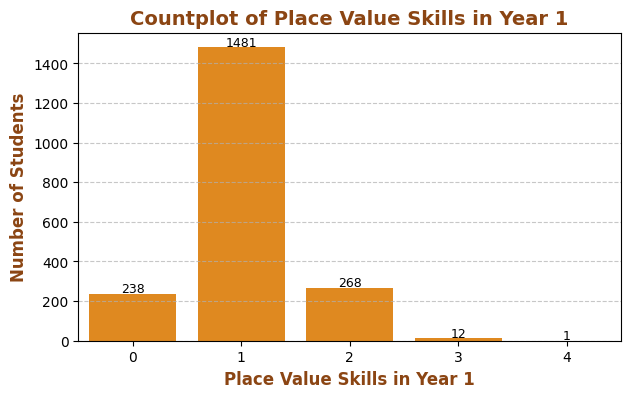

In [ ]:
print("Descriptive Statistics for Place Value-01:")
print(Data2Intel_EduRisk_Dataset['Place Value-01'].describe())


# Countplot for 'Place Value-01'
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Place Value-01', data=Data2Intel_EduRisk_Dataset, color='darkorange')
plt.title('Countplot of Place Value Skills in Year 1', fontsize=14, fontweight='bold', color='saddlebrown')
plt.xlabel('Place Value Skills in Year 1', fontsize=12, fontweight='bold', color='saddlebrown')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='saddlebrown')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add number labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', fontsize=9, color='black')

plt.show()



## Addition and Subtraction-01

Descriptive statistics for 'Addition and Subtraction-01':
 count    2000.000000
mean        1.290500
std         0.935172
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: Addition and Subtraction-01, dtype: float64


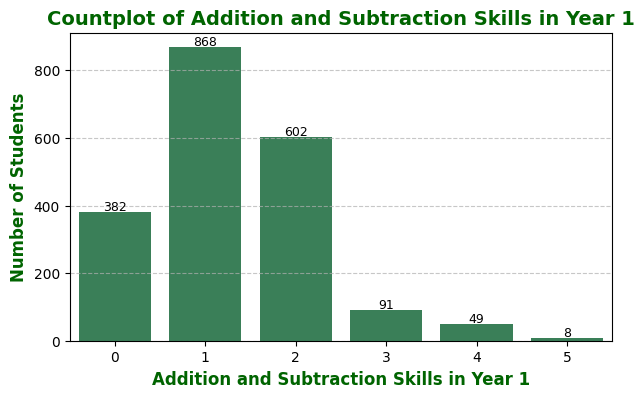

In [ ]:
# Describe the feature
description = Data2Intel_EduRisk_Dataset['Addition and Subtraction-01'].describe()
print("Descriptive statistics for 'Addition and Subtraction-01':\n", description)


# Countplot with number labels
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Addition and Subtraction-01', data=Data2Intel_EduRisk_Dataset, color='seagreen')
plt.title('Countplot of Addition and Subtraction Skills in Year 1', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Addition and Subtraction Skills in Year 1', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Added number labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', fontsize=9, color='black')

plt.show()





## Multiplication and Division-01


Descriptive statistics for 'Multiplication and Division-01':
 count    2000.000000
mean        1.075500
std         0.837944
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Multiplication and Division-01, dtype: float64


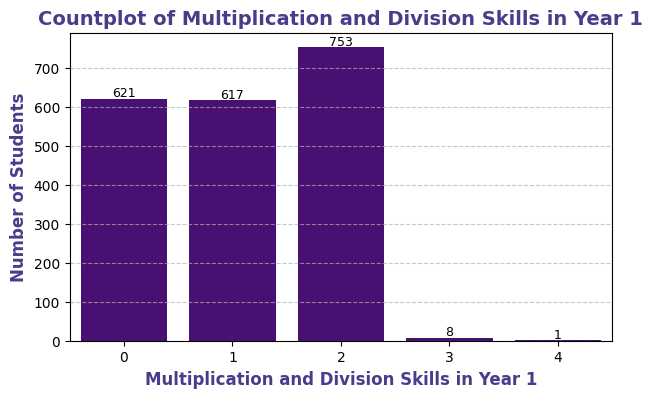

In [ ]:

# Described the feature
description = Data2Intel_EduRisk_Dataset['Multiplication and Division-01'].describe()
print("Descriptive statistics for 'Multiplication and Division-01':\n", description)


# Countplot with number labels
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Multiplication and Division-01', data=Data2Intel_EduRisk_Dataset, color='indigo')
plt.title('Countplot of Multiplication and Division Skills in Year 1', fontsize=14, fontweight='bold', color='darkslateblue')
plt.xlabel('Multiplication and Division Skills in Year 1', fontsize=12, fontweight='bold', color='darkslateblue')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='darkslateblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Added number labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', fontsize=9, color='black')

plt.show()



In [ ]:
Data2Intel_EduRisk_Dataset.describe(include='all')

TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  \
count         2000.00000       2000.000000         2000.0000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean            10.69900         15.001500           21.1300   
std              6.10082          5.489496            4.5786   
min             -4.00000          0.000000            4.0000   
25%              6.00000         11.000000           18.0000   
50%             10.00000         14.000000           21.0000   
75%             14.00000         18.000000           24.0000   
max             34.00000         33.000000           34.0000   

        TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
count        2000.000000        2000.00000       2000.000000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean           21.786500          24.07300         26.998500   
std             5.220205           4.69134          3.765314   
min             2.000000           5.00000          5.000000   
25%            18.000000          21.00000         25.000000   
50%            22.000000          24.00000         28.000000   
75%            25.000000          28.00000         30.000000   
max            36.000000          34.00000         33.000000   

        WritingVocab-01-SOY  HRSIW-01-SOY  Counting-01  Counting-02  ...  \
count           2000.000000   2000.000000  2000.000000  2000.000000  ...   
unique                  NaN           NaN          NaN          NaN  ...   
top                     NaN           NaN          NaN          NaN  ...   
freq                    NaN           NaN          NaN          NaN  ...   
mean              22.018500     30.508000     1.758000     2.850500  ...   
std               12.679098     10.020686     0.935881     1.072719  ...   
min                0.000000     -3.000000     0.000000     0.000000  ...   
25%               13.000000     25.000000     1.000000     2.000000  ...   
50%               20.000000     32.000000     2.000000     3.000000  ...   
75%               29.000000     37.000000     2.000000     4.000000  ...   
max               95.000000     58.000000     5.000000     6.000000  ...   

        NCCD-Funded   NumSibling  SiblingOrder     01.SES       02.SES  \
count   2000.000000  2000.000000   2000.000000  2000.0000  2000.000000   
unique          NaN          NaN           NaN        NaN          NaN   
top             NaN          NaN           NaN        NaN          NaN   
freq            NaN          NaN           NaN        NaN          NaN   
mean       0.089000     2.356500      1.748500   102.9415   102.117500   
std        0.284815     0.993932      0.865229     9.3859     9.150167   
min        0.000000     1.000000      1.000000    78.0000    78.000000   
25%        0.000000     2.000000      1.000000    95.0000    95.000000   
50%        0.000000     2.000000      2.000000   101.0000   101.000000   
75%        0.000000     3.000000      2.000000   113.0000   109.000000   
max        1.000000     7.000000      6.000000   120.0000   120.000000   

        NumAbvYear9  NumAbvDiploma      NumProf      Year_02  At_Risk_Numeracy  
count   2000.000000    2000.000000  2000.000000  2000.000000              2000  
unique          NaN            NaN          NaN          NaN                 2  
top             NaN            NaN          NaN          NaN             False  
freq            NaN            NaN          NaN          NaN              1500  
mean       1.564000       0.886500     0.766500  2018.640000               NaN  
std        0.725374       0.837836     0.811977     1.664568               NaN  
min        0.000000       0.000000     0.000000  2016.000000               NaN  
25%        1.000000 

## Conversion of Target Feature

In [ ]:
def convert_risk_status_corrected(status):
    if status is True:  # Check for the Boolean True
        return 1
    elif status is False: # Check for the Boolean False
        return 0
    else:
        # Handle potential other values or NaNs if they exist
        return None
Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'] = Data2Intel_EduRisk_Dataset['At_Risk_Numeracy'].apply(convert_risk_status_corrected)

In [ ]:
Data2Intel_EduRisk_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TextLevel-01-SOY                2000 non-null   int64  
 1   TextLevel-01-MOY                2000 non-null   int64  
 2   TextLevel-01-EOY                2000 non-null   int64  
 3   TextLevel-02-SOY                2000 non-null   int64  
 4   TextLevel-02-MOY                2000 non-null   int64  
 5   TextLevel-02-EOY                2000 non-null   int64  
 6   WritingVocab-01-SOY             2000 non-null   int64  
 7   HRSIW-01-SOY                    2000 non-null   int64  
 8   Counting-01                     2000 non-null   int64  
 9   Counting-02                     2000 non-null   int64  
 10  Place Value-01                  2000 non-null   int64  
 11  Place Value-02                  2000 non-null   int64  
 12  Addition and Subtraction-01     20

# Bivariate  Analysis

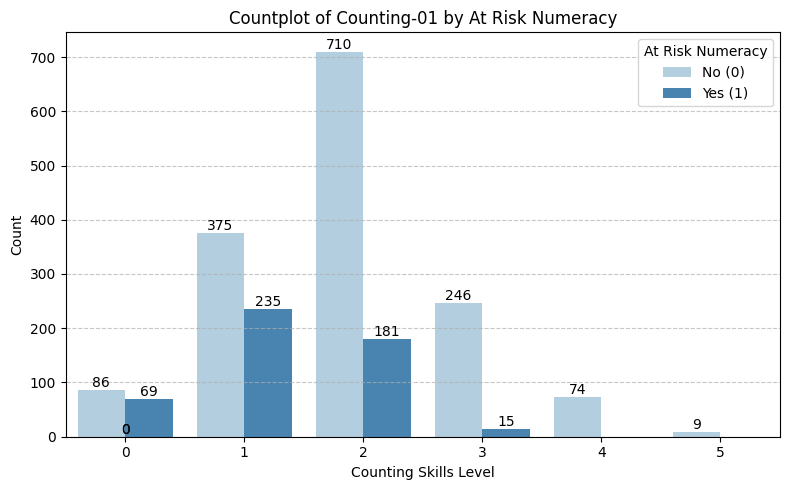

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Counting-01', hue='At_Risk_Numeracy', data=Data2Intel_EduRisk_Dataset, palette='Blues')

# Add count labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Countplot of Counting-01 by At Risk Numeracy')
plt.xlabel('Counting Skills Level')
plt.ylabel('Count')
plt.legend(title='At Risk Numeracy', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

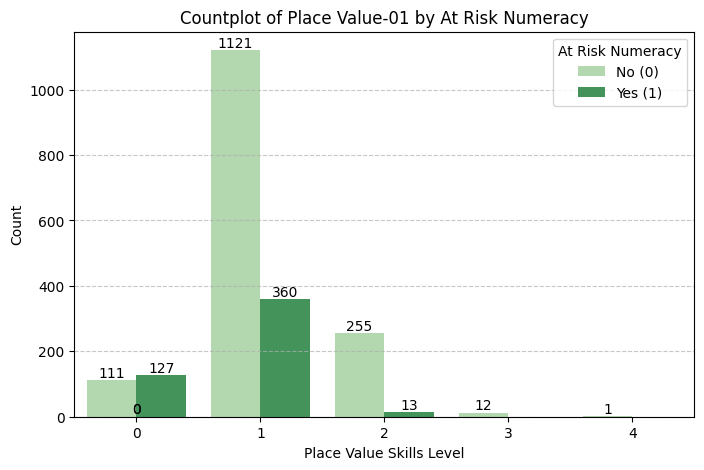

In [ ]:


plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Place Value-01', hue='At_Risk_Numeracy', data=Data2Intel_EduRisk_Dataset, palette='Greens')

# Add count labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Countplot of Place Value-01 by At Risk Numeracy')
plt.xlabel('Place Value Skills Level')
plt.ylabel('Count')
plt.legend(title='At Risk Numeracy', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


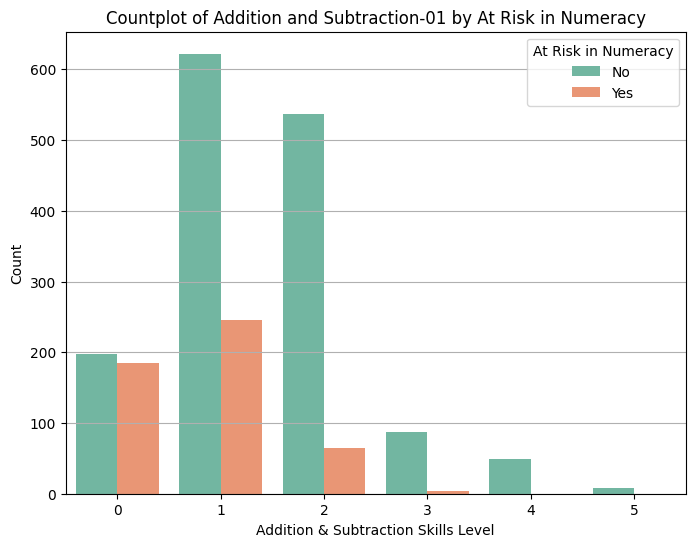

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Addition and Subtraction-01', hue='At_Risk_Numeracy', data=Data2Intel_EduRisk_Dataset, palette='Set2')

plt.title('Countplot of Addition and Subtraction-01 by At Risk in Numeracy')
plt.xlabel('Addition & Subtraction Skills Level')
plt.ylabel('Count')
plt.legend(title='At Risk in Numeracy', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


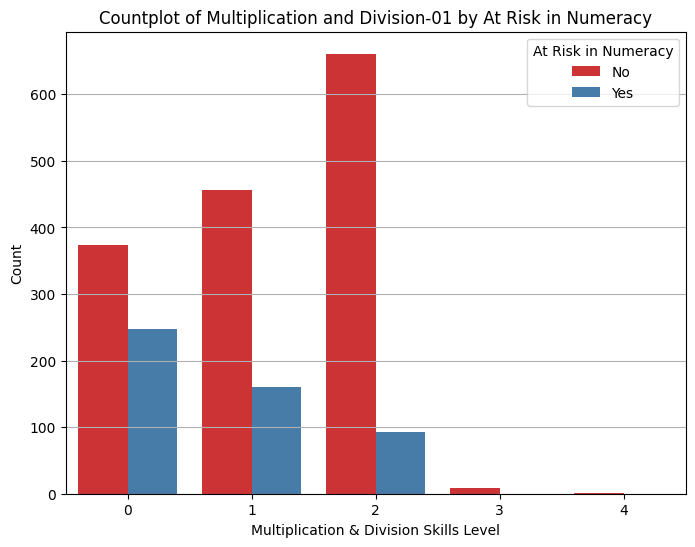

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Multiplication and Division-01', hue='At_Risk_Numeracy', data=Data2Intel_EduRisk_Dataset, palette='Set1')

plt.title('Countplot of Multiplication and Division-01 by At Risk in Numeracy')
plt.xlabel('Multiplication & Division Skills Level')
plt.ylabel('Count')
plt.legend(title='At Risk in Numeracy', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


# Multivariate Analysis - Heatmap to disply relationship

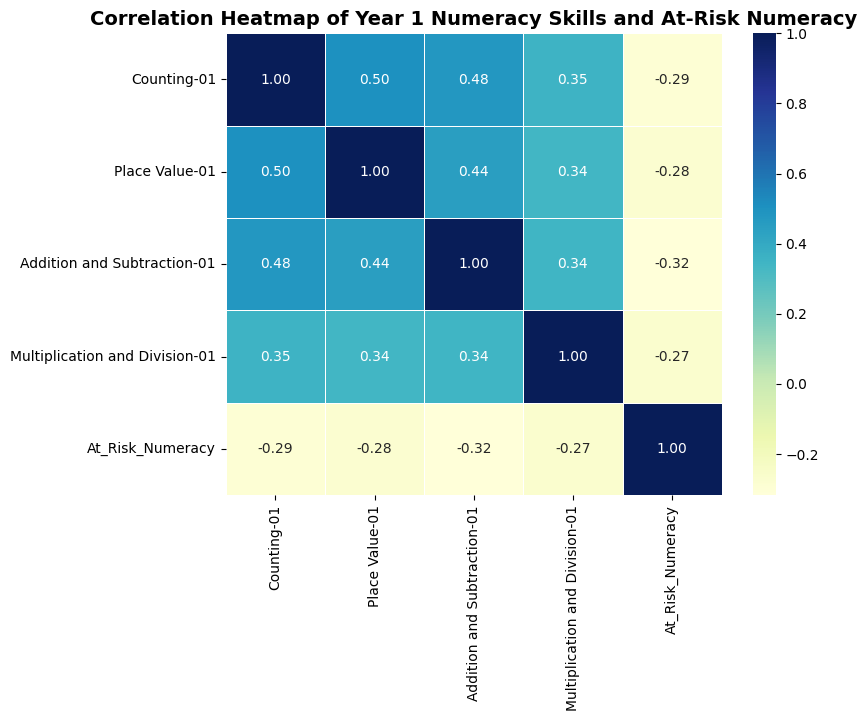

In [ ]:

# Display the first few rows to verify the changes
Data2Intel_EduRisk_Dataset.head()

# Selecting the columns for correlation analysis
correlation_columns = [
    'Counting-01',
    'Place Value-01',
    'Addition and Subtraction-01',
    'Multiplication and Division-01',
    'At_Risk_Numeracy'
]

# Calculate the correlation matrix
correlation_matrix = Data2Intel_EduRisk_Dataset[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Year 1 Numeracy Skills and At-Risk Numeracy', fontsize=14, fontweight='bold')
plt.show()


#TASK-1 QUESTION-3

# Univariate Analysis

## TextLevel-01-SOY

count    2000.00000
mean       10.69900
std         6.10082
min        -4.00000
25%         6.00000
50%        10.00000
75%        14.00000
max        34.00000
Name: TextLevel-01-SOY, dtype: float64


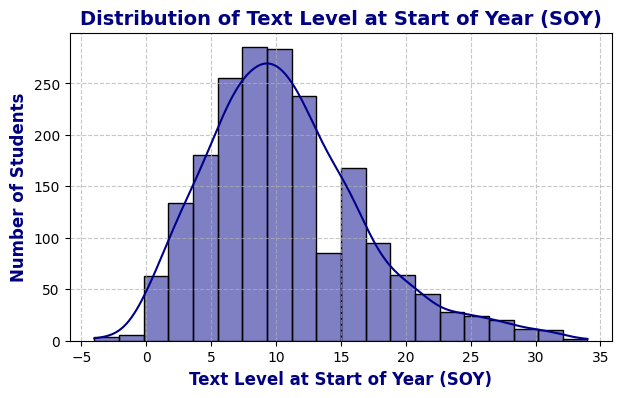

In [ ]:
print(Data2Intel_EduRisk_Dataset['TextLevel-01-SOY'].describe())
plt.figure(figsize=(7, 4))
sns.histplot(Data2Intel_EduRisk_Dataset['TextLevel-01-SOY'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Text Level at Start of Year (SOY)', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Text Level at Start of Year (SOY)', fontsize=12, fontweight='bold', color='navy')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='navy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## TextLevel-01-MOY

count    2000.000000
mean       15.001500
std         5.489496
min         0.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        33.000000
Name: TextLevel-01-MOY, dtype: float64


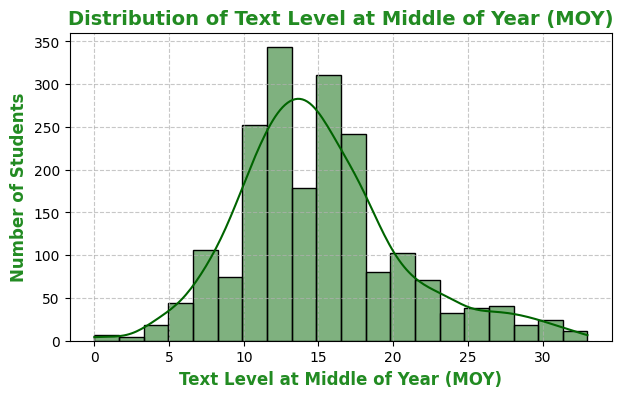

In [ ]:
print(Data2Intel_EduRisk_Dataset['TextLevel-01-MOY'].describe())
plt.figure(figsize=(7, 4))
sns.histplot(Data2Intel_EduRisk_Dataset['TextLevel-01-MOY'], bins=20, kde=True, color='darkgreen')
plt.title('Distribution of Text Level at Middle of Year (MOY)', fontsize=14, fontweight='bold', color='forestgreen')
plt.xlabel('Text Level at Middle of Year (MOY)', fontsize=12, fontweight='bold', color='forestgreen')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='forestgreen')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## TextLevel-01-EOY

count    2000.0000
mean       21.1300
std         4.5786
min         4.0000
25%        18.0000
50%        21.0000
75%        24.0000
max        34.0000
Name: TextLevel-01-EOY, dtype: float64


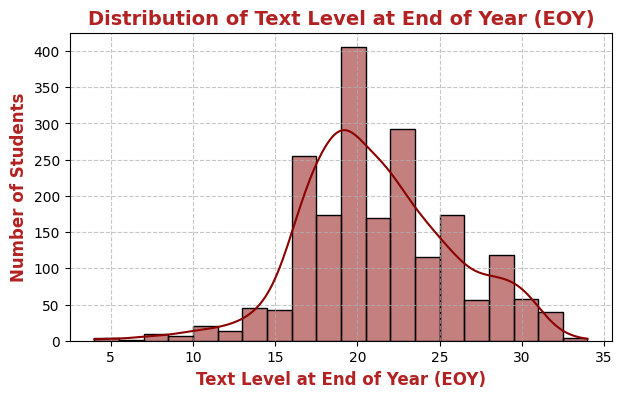

In [ ]:
print(Data2Intel_EduRisk_Dataset['TextLevel-01-EOY'].describe())
plt.figure(figsize=(7, 4))
sns.histplot(Data2Intel_EduRisk_Dataset['TextLevel-01-EOY'], bins=20, kde=True, color='darkred')
plt.title('Distribution of Text Level at End of Year (EOY)', fontsize=14, fontweight='bold', color='firebrick')
plt.xlabel('Text Level at End of Year (EOY)', fontsize=12, fontweight='bold', color='firebrick')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='firebrick')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## WritingVocab-01-SOY

count    2000.000000
mean       22.018500
std        12.679098
min         0.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        95.000000
Name: WritingVocab-01-SOY, dtype: float64


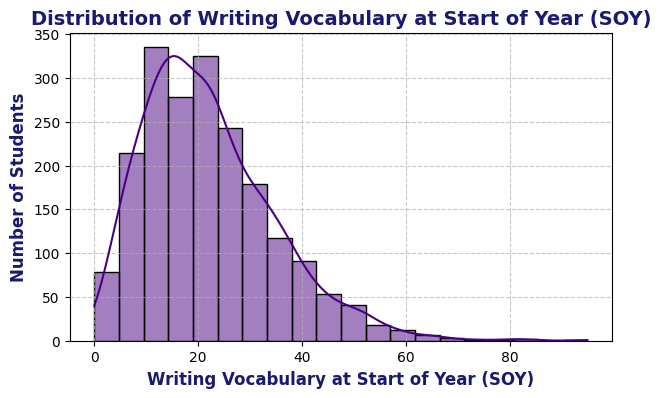

In [ ]:
print(Data2Intel_EduRisk_Dataset['WritingVocab-01-SOY'].describe())
plt.figure(figsize=(7, 4))
sns.histplot(Data2Intel_EduRisk_Dataset['WritingVocab-01-SOY'], bins=20, kde=True, color='indigo')
plt.title('Distribution of Writing Vocabulary at Start of Year (SOY)', fontsize=14, fontweight='bold', color='midnightblue')
plt.xlabel('Writing Vocabulary at Start of Year (SOY)', fontsize=12, fontweight='bold', color='midnightblue')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold', color='midnightblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Bivariate  Analysis

<ipython-input-35-3f65b8bad655>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='At_Risk_Numeracy', y='TextLevel-01-SOY', data=Data2Intel_EduRisk_Dataset, palette='coolwarm')


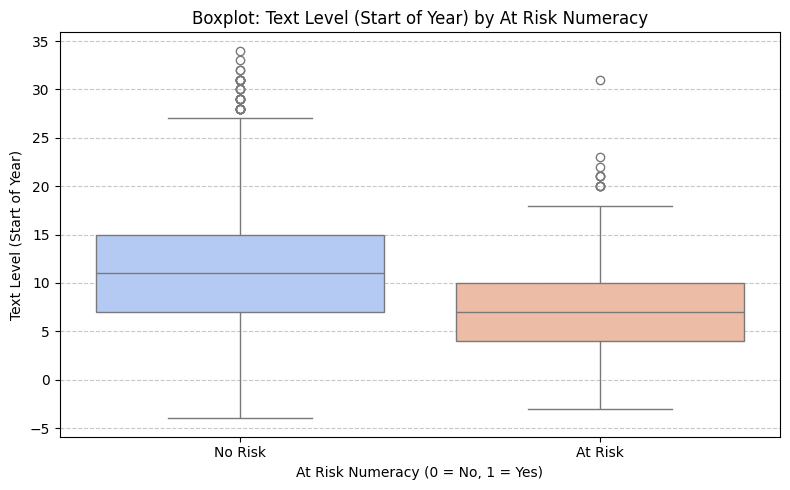

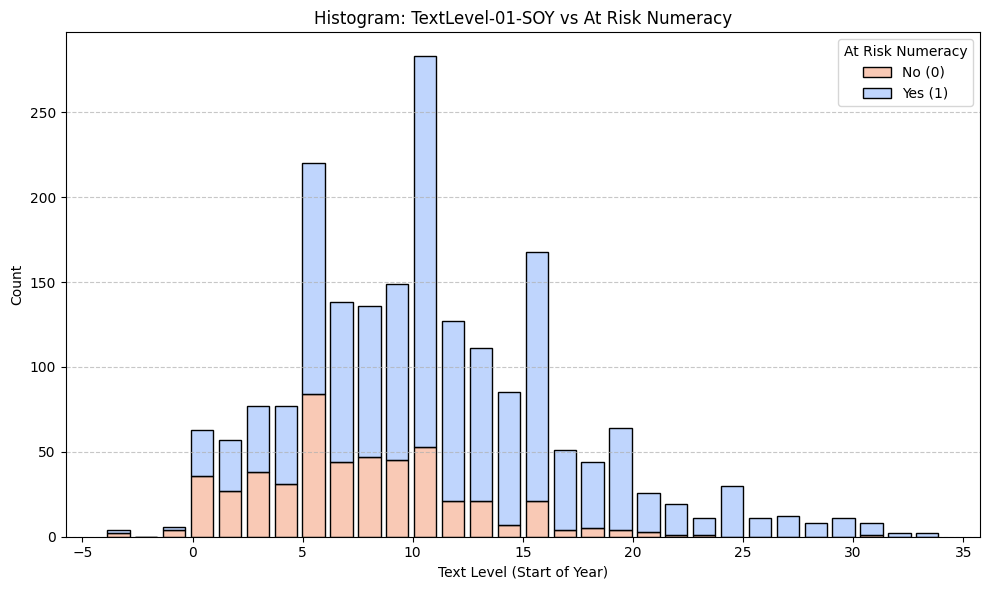

In [ ]:


plt.figure(figsize=(8, 5))
sns.boxplot(x='At_Risk_Numeracy', y='TextLevel-01-SOY', data=Data2Intel_EduRisk_Dataset, palette='coolwarm')

plt.title('Boxplot: Text Level (Start of Year) by At Risk Numeracy')
plt.xlabel('At Risk Numeracy (0 = No, 1 = Yes)')
plt.ylabel('Text Level (Start of Year)')
plt.xticks([0, 1], ['No Risk', 'At Risk'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(
    data=Data2Intel_EduRisk_Dataset,
    x='TextLevel-01-SOY',
    hue='At_Risk_Numeracy',
    multiple='stack',
    palette='coolwarm',
    bins=30,
    shrink=0.8
)

plt.title('Histogram: TextLevel-01-SOY vs At Risk Numeracy')
plt.xlabel('Text Level (Start of Year)')
plt.ylabel('Count')
plt.legend(title='At Risk Numeracy', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




<ipython-input-36-eaf693d25788>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='At_Risk_Numeracy', y='TextLevel-01-MOY', data=Data2Intel_EduRisk_Dataset, palette='Purples')


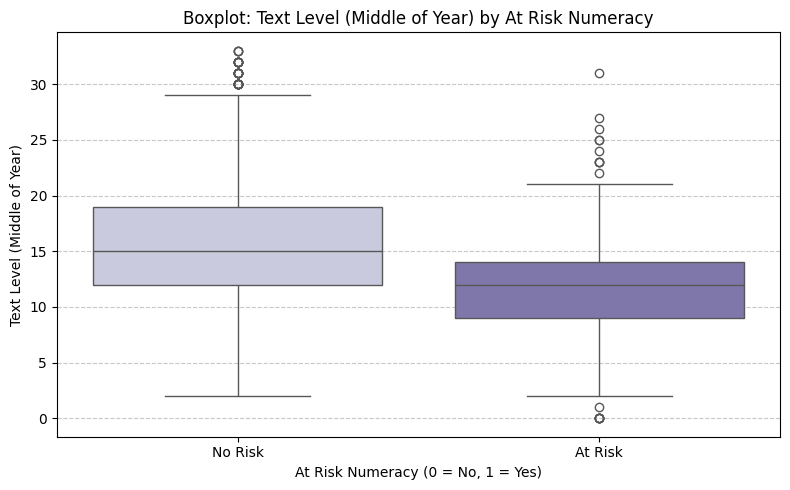

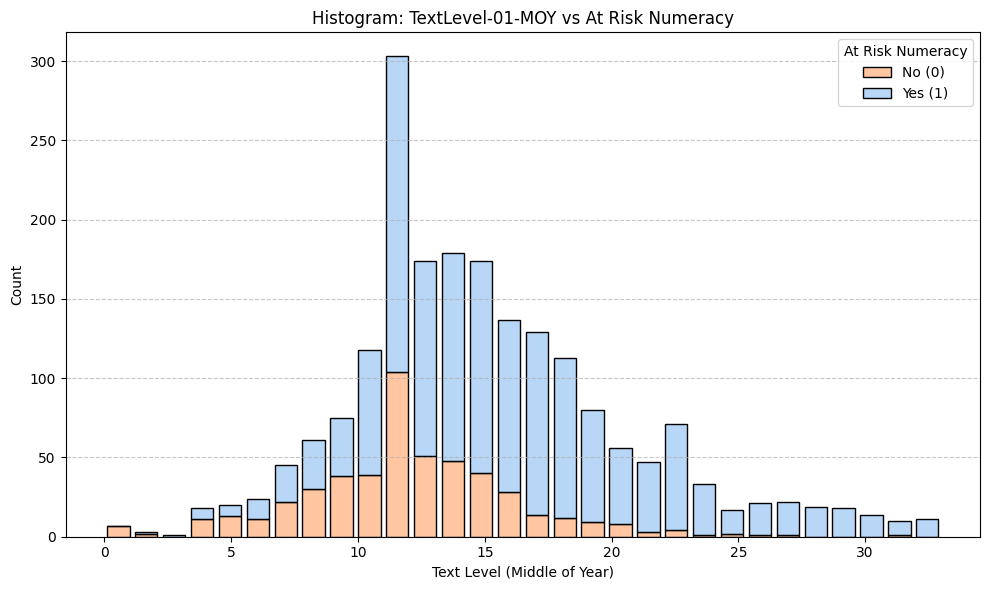

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='At_Risk_Numeracy', y='TextLevel-01-MOY', data=Data2Intel_EduRisk_Dataset, palette='Purples')

plt.title('Boxplot: Text Level (Middle of Year) by At Risk Numeracy')
plt.xlabel('At Risk Numeracy (0 = No, 1 = Yes)')
plt.ylabel('Text Level (Middle of Year)')
plt.xticks([0, 1], ['No Risk', 'At Risk'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=Data2Intel_EduRisk_Dataset,
    x='TextLevel-01-MOY',
    hue='At_Risk_Numeracy',
    multiple='stack',
    palette='pastel',
    bins=30,
    shrink=0.8
)
plt.title('Histogram: TextLevel-01-MOY vs At Risk Numeracy')
plt.xlabel('Text Level (Middle of Year)')
plt.ylabel('Count')
plt.legend(title='At Risk Numeracy', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-37-cd2629d66867>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='At_Risk_Numeracy', y='TextLevel-01-EOY', data=Data2Intel_EduRisk_Dataset, palette='Oranges')


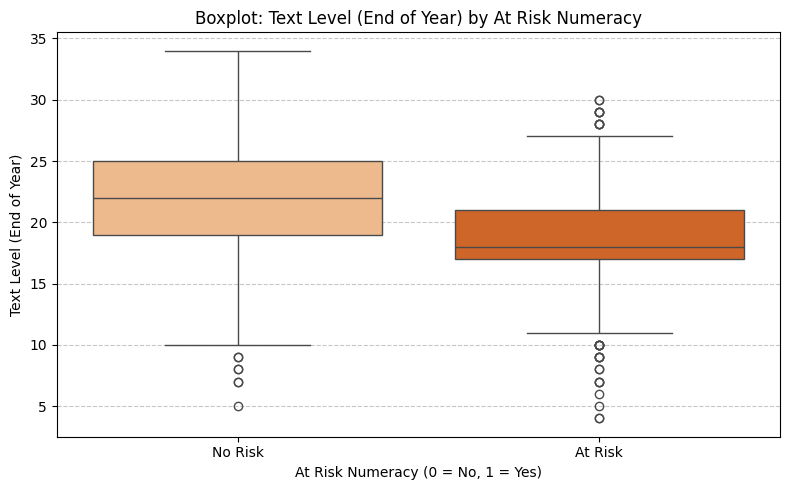

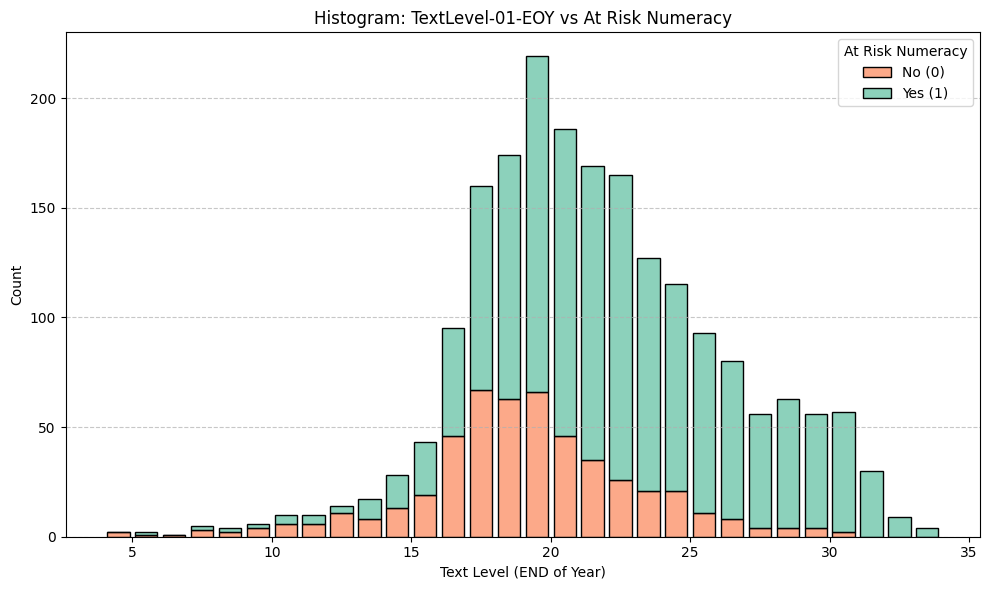

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='At_Risk_Numeracy', y='TextLevel-01-EOY', data=Data2Intel_EduRisk_Dataset, palette='Oranges')

plt.title('Boxplot: Text Level (End of Year) by At Risk Numeracy')
plt.xlabel('At Risk Numeracy (0 = No, 1 = Yes)')
plt.ylabel('Text Level (End of Year)')
plt.xticks([0, 1], ['No Risk', 'At Risk'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=Data2Intel_EduRisk_Dataset,
    x='TextLevel-01-EOY',
    hue='At_Risk_Numeracy',
    multiple='stack',
    palette='Set2',
    bins=30,  # you can adjust the number of bins as needed
    shrink=0.8
)
plt.title('Histogram: TextLevel-01-EOY vs At Risk Numeracy')
plt.xlabel('Text Level (END of Year)')
plt.ylabel('Count')
plt.legend(title='At Risk Numeracy', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




<ipython-input-38-42db723cde19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='At_Risk_Numeracy', y='WritingVocab-01-SOY', data=Data2Intel_EduRisk_Dataset, palette='Reds')


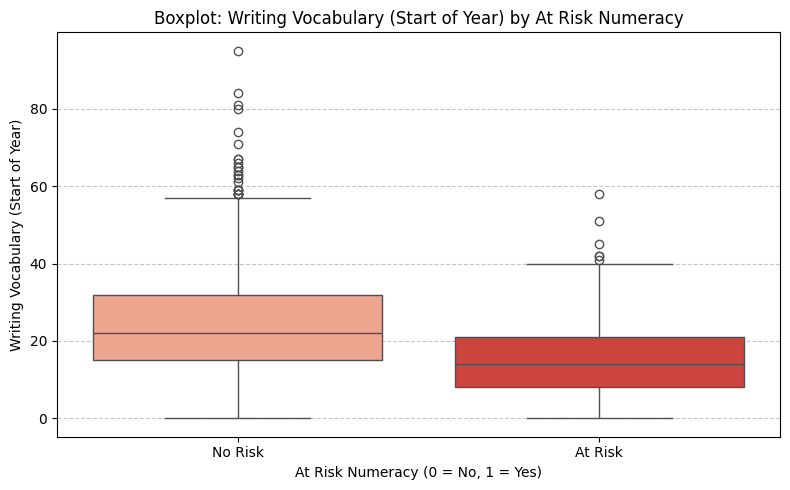

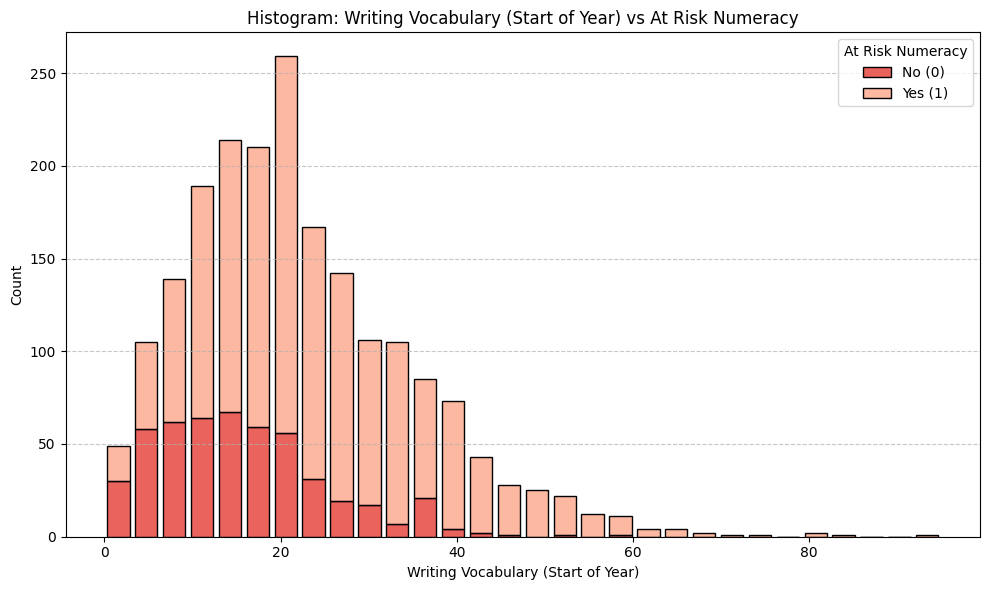

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='At_Risk_Numeracy', y='WritingVocab-01-SOY', data=Data2Intel_EduRisk_Dataset, palette='Reds')

plt.title('Boxplot: Writing Vocabulary (Start of Year) by At Risk Numeracy')
plt.xlabel('At Risk Numeracy (0 = No, 1 = Yes)')
plt.ylabel('Writing Vocabulary (Start of Year)')
plt.xticks([0, 1], ['No Risk', 'At Risk'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=Data2Intel_EduRisk_Dataset,
    x='WritingVocab-01-SOY',
    hue='At_Risk_Numeracy',
    multiple='stack',
    palette='Reds',
    bins=30,  # Adjust bins as needed
    shrink=0.8
)

plt.title('Histogram: Writing Vocabulary (Start of Year) vs At Risk Numeracy')
plt.xlabel('Writing Vocabulary (Start of Year)')
plt.ylabel('Count')
plt.legend(title='At Risk Numeracy', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Multivariate- Heatmap

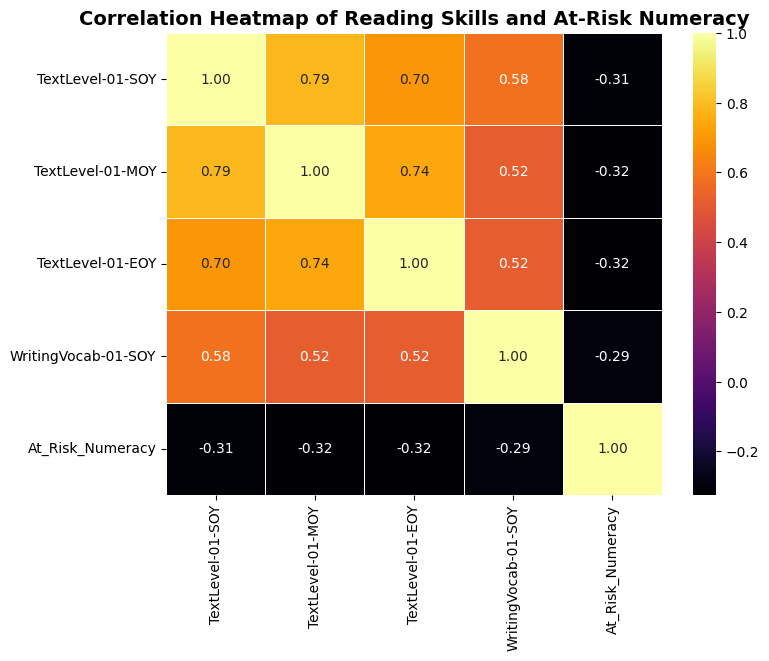

In [ ]:


# Selecting the columns for correlation analysis
correlation_columns = [
    'TextLevel-01-SOY',
    'TextLevel-01-MOY',
    'TextLevel-01-EOY',
    'WritingVocab-01-SOY',
    'At_Risk_Numeracy'
]

# Calculate the correlation matrix
correlation_matrix = Data2Intel_EduRisk_Dataset[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Reading Skills and At-Risk Numeracy', fontsize=14, fontweight='bold')
plt.show()


# TASK-1 QUESTION-4

## Univariate Analysis

count    2000.000000
mean       30.508000
std        10.020686
min        -3.000000
25%        25.000000
50%        32.000000
75%        37.000000
max        58.000000
Name: HRSIW-01-SOY, dtype: float64


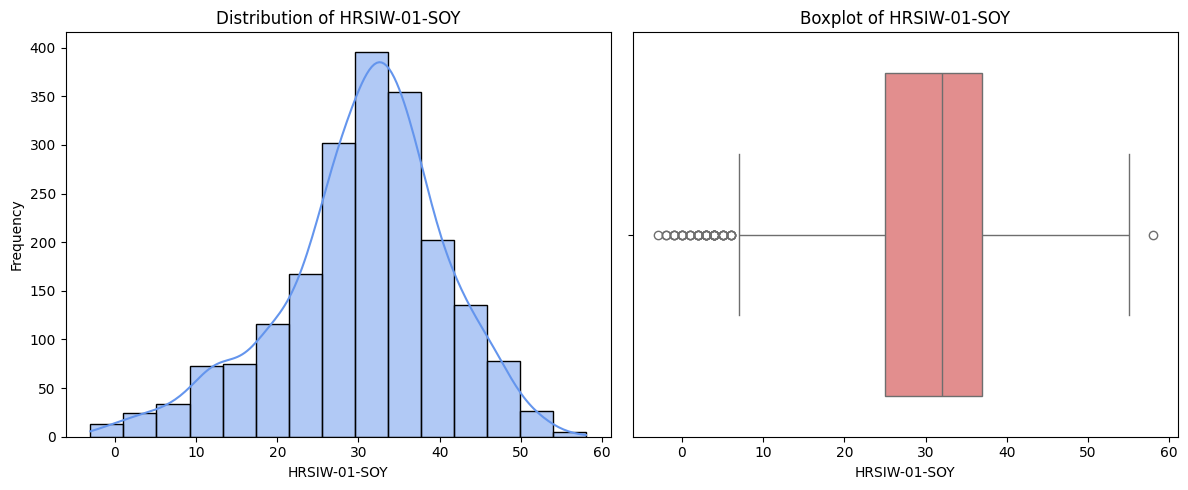

In [ ]:
print(Data2Intel_EduRisk_Dataset['HRSIW-01-SOY'].describe())
plt.figure(figsize=(12, 5))

# Histogram for HRSIW-01-SOY
plt.subplot(1, 2, 1)
sns.histplot(Data2Intel_EduRisk_Dataset['HRSIW-01-SOY'], bins=15, kde=True, color='cornflowerblue')
plt.title('Distribution of HRSIW-01-SOY')
plt.xlabel('HRSIW-01-SOY')
plt.ylabel('Frequency')

# Boxplot for HRSIW-01-SOY
plt.subplot(1, 2, 2)
sns.boxplot(x=Data2Intel_EduRisk_Dataset['HRSIW-01-SOY'], color='lightcoral')
plt.title('Boxplot of HRSIW-01-SOY')
plt.xlabel('HRSIW-01-SOY')

# Display the plots
plt.tight_layout()
plt.show()

## Bivariate  Analysis

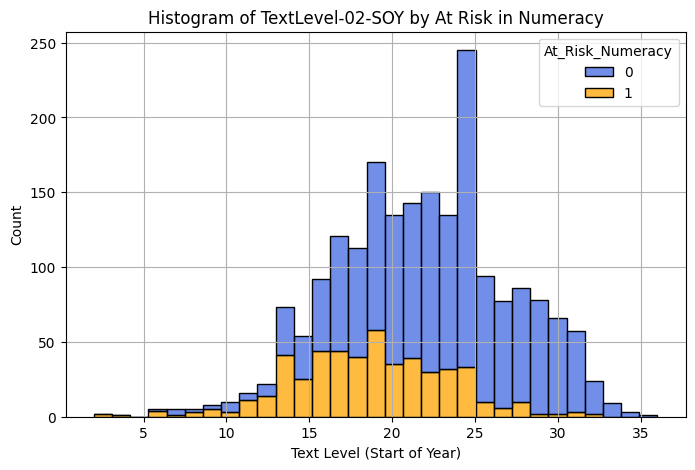

<ipython-input-41-9a2a0cbf8c10>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy', y='TextLevel-02-SOY',


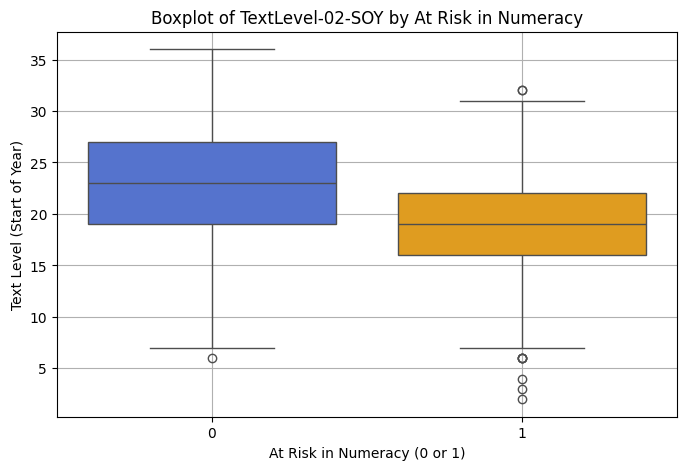

In [ ]:


# Histogram plot for 'TextLevel-02-SOY' split by 'At_Risk_Numeracy'
plt.figure(figsize=(8, 5))
sns.histplot(data=Data2Intel_EduRisk_Dataset, x='TextLevel-02-SOY', hue='At_Risk_Numeracy',
             multiple='stack', palette=['royalblue', 'orange'])
plt.title('Histogram of TextLevel-02-SOY by At Risk in Numeracy')
plt.xlabel('Text Level (Start of Year)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Boxplot for 'TextLevel-02-SOY' grouped by 'At_Risk_Numeracy'
plt.figure(figsize=(8, 5))
sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy', y='TextLevel-02-SOY',
            palette=['royalblue', 'orange'])
plt.title('Boxplot of TextLevel-02-SOY by At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy (0 or 1)')
plt.ylabel('Text Level (Start of Year)')
plt.grid(True)
plt.show()


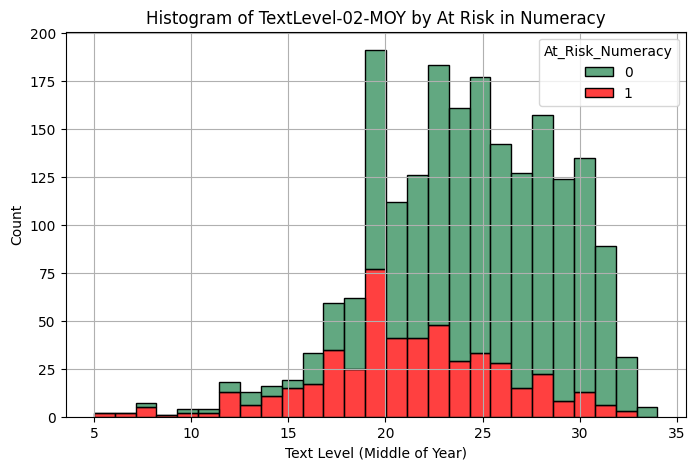

<ipython-input-42-4d043bb69065>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy', y='TextLevel-02-MOY',


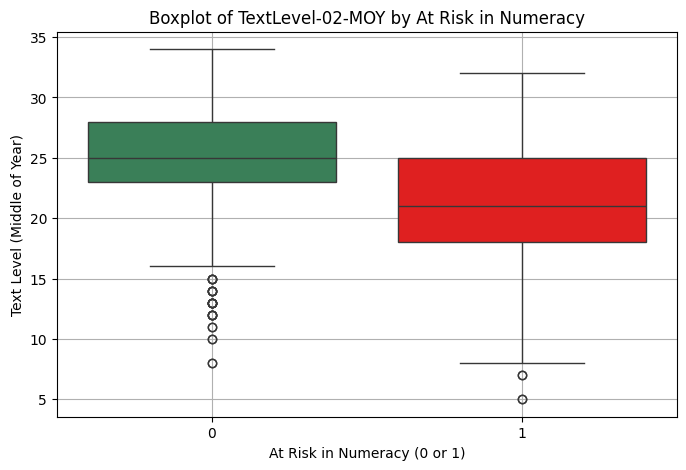

In [ ]:


# Histogram plot for 'TextLevel-02-MOY' split by 'At_Risk_Numeracy'
plt.figure(figsize=(8, 5))
sns.histplot(data=Data2Intel_EduRisk_Dataset, x='TextLevel-02-MOY', hue='At_Risk_Numeracy',
             multiple='stack', palette=['seagreen', 'red'])
plt.title('Histogram of TextLevel-02-MOY by At Risk in Numeracy')
plt.xlabel('Text Level (Middle of Year)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Boxplot for 'TextLevel-02-MOY' grouped by 'At_Risk_Numeracy'
plt.figure(figsize=(8, 5))
sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy', y='TextLevel-02-MOY',
            palette=['seagreen', 'red'])
plt.title('Boxplot of TextLevel-02-MOY by At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy (0 or 1)')
plt.ylabel('Text Level (Middle of Year)')
plt.grid(True)
plt.show()


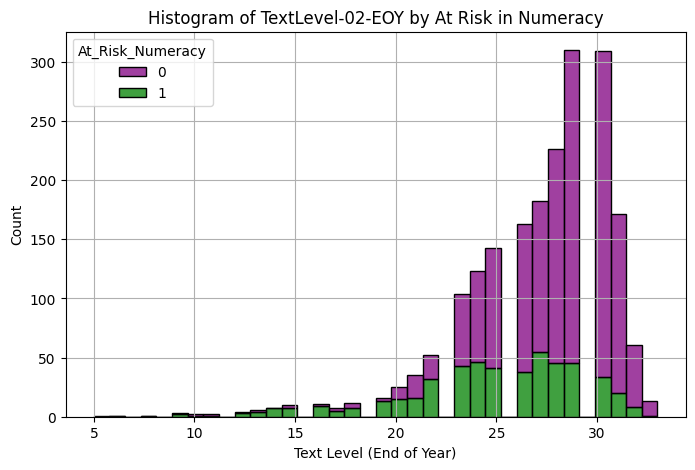

<ipython-input-43-28e584820251>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy', y='TextLevel-02-EOY',


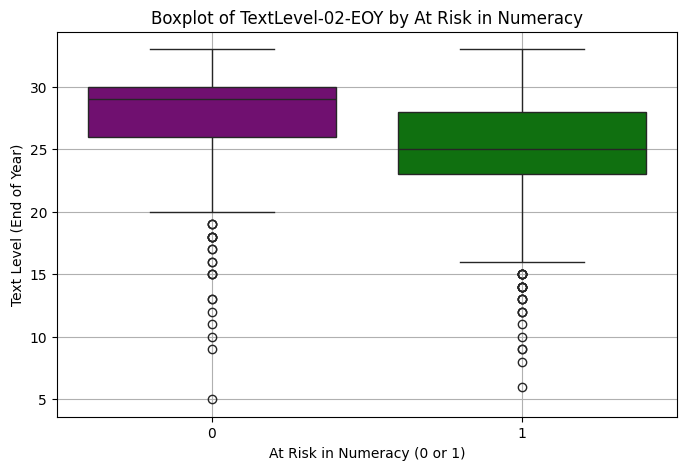

In [ ]:

# Histogram plot for 'TextLevel-02-EOY' split by 'At_Risk_Numeracy'
plt.figure(figsize=(8, 5))
sns.histplot(data=Data2Intel_EduRisk_Dataset, x='TextLevel-02-EOY', hue='At_Risk_Numeracy',
             multiple='stack', palette=['purple', 'green'])
plt.title('Histogram of TextLevel-02-EOY by At Risk in Numeracy')
plt.xlabel('Text Level (End of Year)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Boxplot for 'TextLevel-02-EOY' grouped by 'At_Risk_Numeracy'
plt.figure(figsize=(8, 5))
sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy', y='TextLevel-02-EOY',
            palette=['purple', 'green'])
plt.title('Boxplot of TextLevel-02-EOY by At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy (0 or 1)')
plt.ylabel('Text Level (End of Year)')
plt.grid(True)
plt.show()


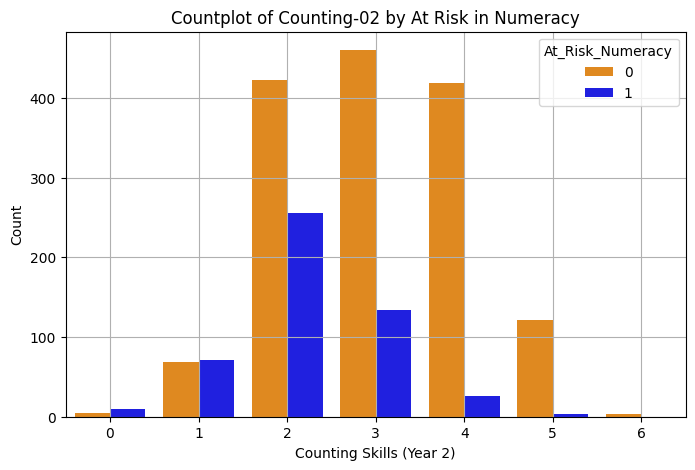

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='Counting-02', hue='At_Risk_Numeracy', palette=['darkorange', 'blue'])
plt.title('Countplot of Counting-02 by At Risk in Numeracy')
plt.xlabel('Counting Skills (Year 2)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


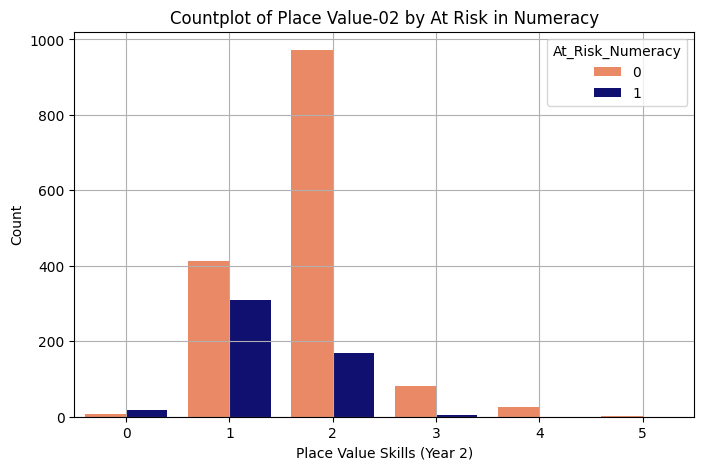

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='Place Value-02', hue='At_Risk_Numeracy', palette=['coral', 'navy'])
plt.title('Countplot of Place Value-02 by At Risk in Numeracy')
plt.xlabel('Place Value Skills (Year 2)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


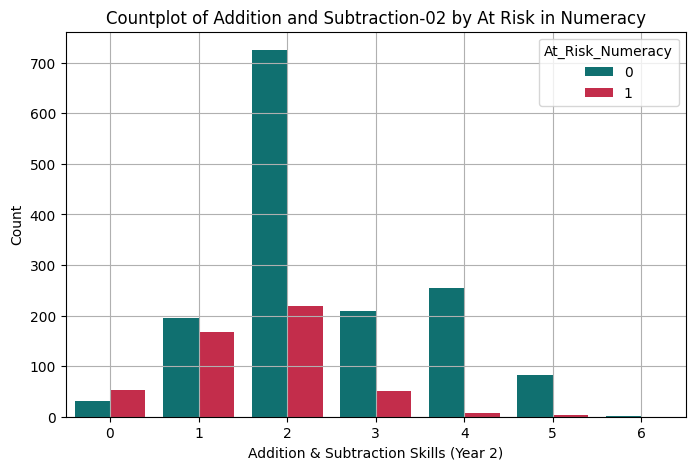

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='Addition and Subtraction-02', hue='At_Risk_Numeracy', palette=['teal', 'crimson'])
plt.title('Countplot of Addition and Subtraction-02 by At Risk in Numeracy')
plt.xlabel('Addition & Subtraction Skills (Year 2)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


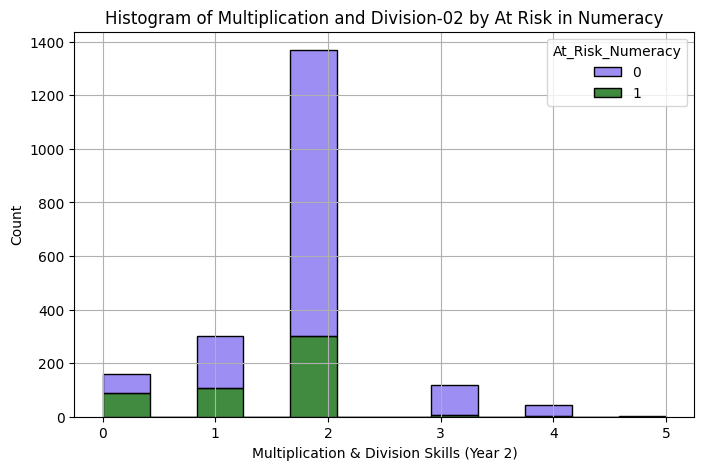

In [ ]:
# Multiplication and Division-02 histplot
plt.figure(figsize=(8, 5))
sns.histplot(data=Data2Intel_EduRisk_Dataset, x='Multiplication and Division-02', hue='At_Risk_Numeracy',
             multiple='stack', palette=['mediumslateblue', 'darkgreen'])
plt.title('Histogram of Multiplication and Division-02 by At Risk in Numeracy')
plt.xlabel('Multiplication & Division Skills (Year 2)')
plt.ylabel('Count')
plt.grid(True)
plt.show()



## Multivariate Analysis

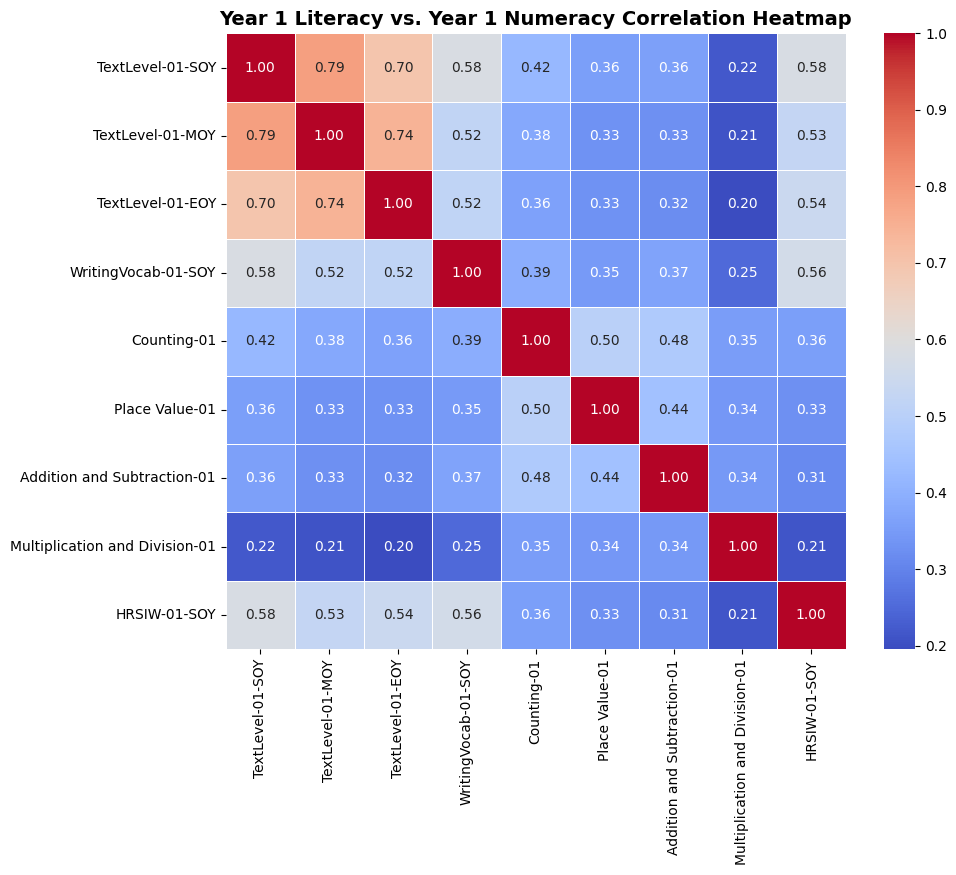

In [ ]:
# Year 1 Literacy Skills and Numeracy Skills
year1_columns = [
    'TextLevel-01-SOY',
    'TextLevel-01-MOY',
    'TextLevel-01-EOY',
    'WritingVocab-01-SOY',
    'Counting-01',
    'Place Value-01',
    'Addition and Subtraction-01',
    'Multiplication and Division-01',
    'HRSIW-01-SOY'
]

plt.figure(figsize=(10, 8))
sns.heatmap(Data2Intel_EduRisk_Dataset[year1_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Year 1 Literacy vs. Year 1 Numeracy Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

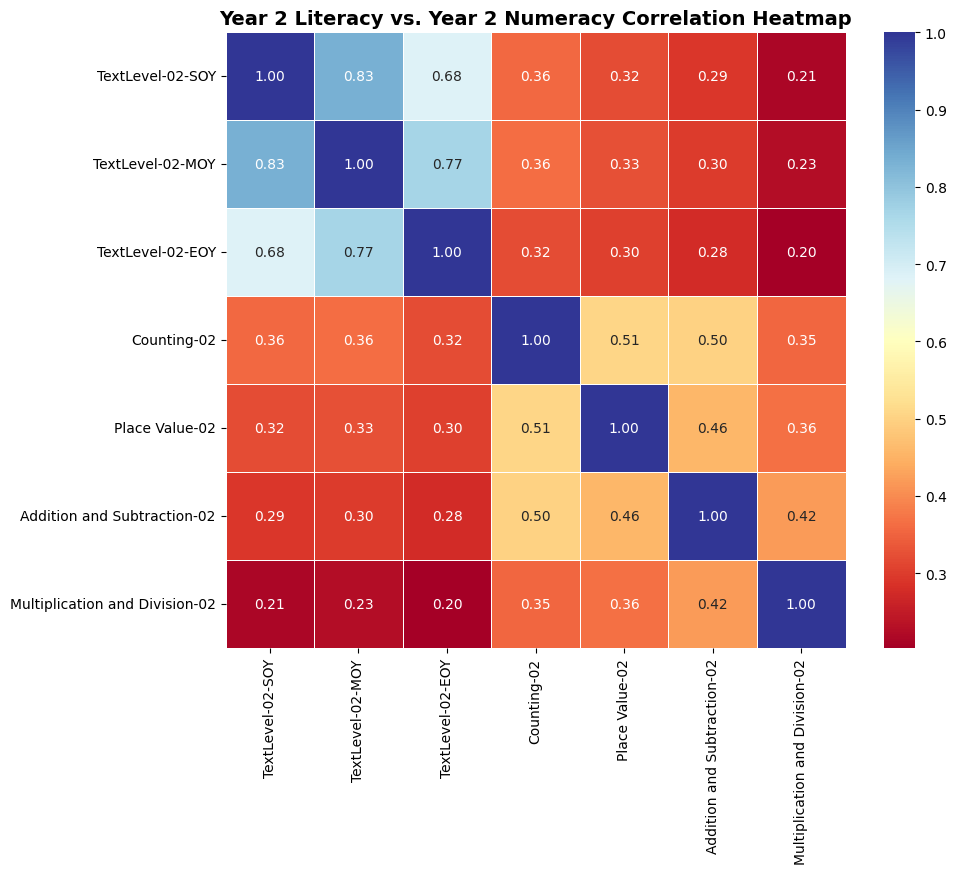

In [ ]:
# Year 2 Literacy Skills and Numeracy Skills
year2_columns = [
    'TextLevel-02-SOY',
    'TextLevel-02-MOY',
    'TextLevel-02-EOY',
    'Counting-02',
    'Place Value-02',
    'Addition and Subtraction-02',
    'Multiplication and Division-02'
]
plt.figure(figsize=(10, 8))
sns.heatmap(Data2Intel_EduRisk_Dataset[year2_columns].corr(), annot=True, cmap='RdYlBu', fmt='.2f', linewidths=0.5)
plt.title('Year 2 Literacy vs. Year 2 Numeracy Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

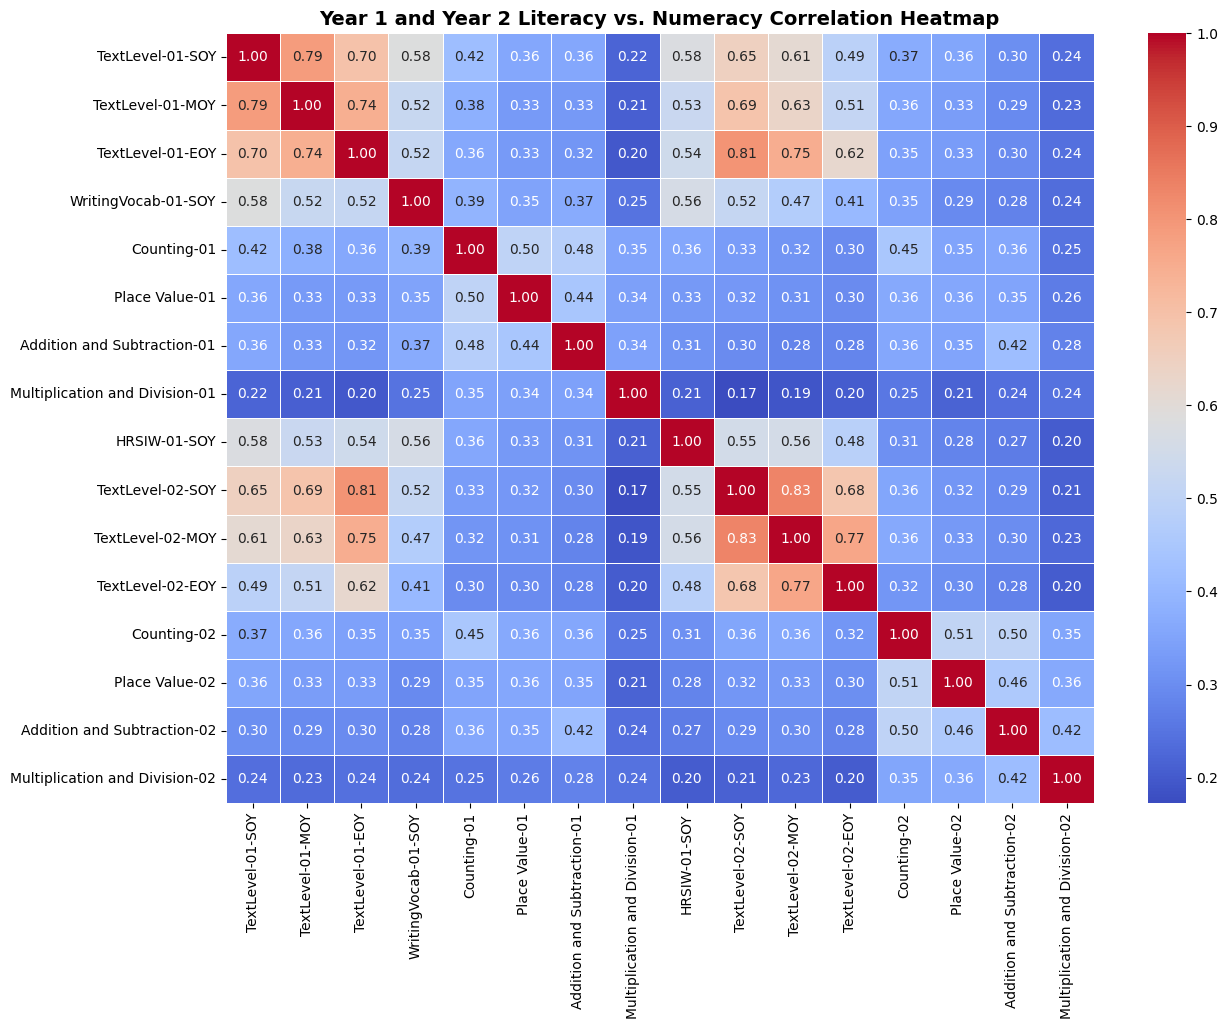

In [ ]:
plt.figure(figsize=(14, 10))
combined_columns = year1_columns + year2_columns
sns.heatmap(Data2Intel_EduRisk_Dataset[combined_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Year 1 and Year 2 Literacy vs. Numeracy Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

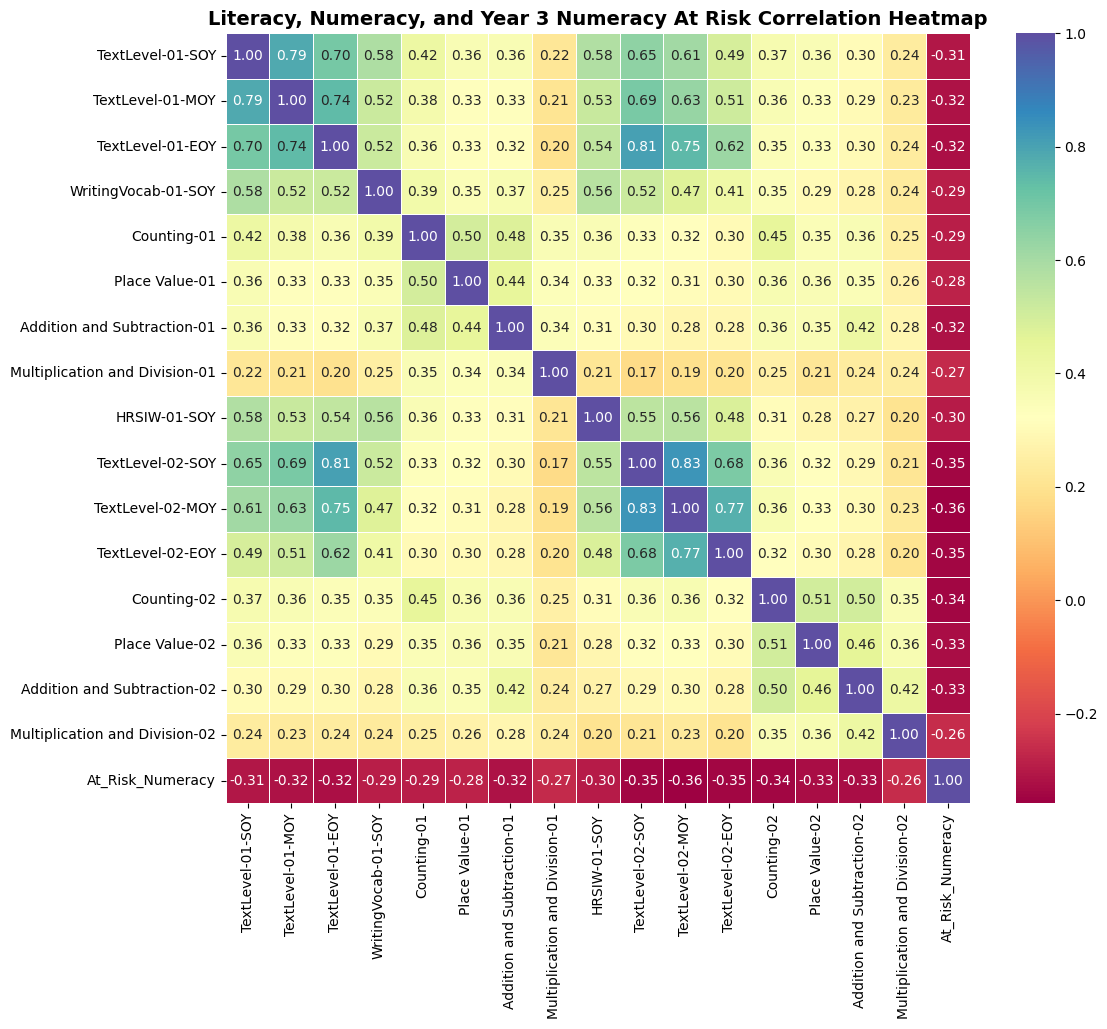

In [ ]:
combined_columns = year1_columns + year2_columns + ['At_Risk_Numeracy']

plt.figure(figsize=(12, 10))
sns.heatmap(Data2Intel_EduRisk_Dataset[combined_columns].corr(), annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Literacy, Numeracy, and Year 3 Numeracy At Risk Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

# Task-1 Question 5

## Bivariate  Analysis

<Figure size 1200x500 with 0 Axes>

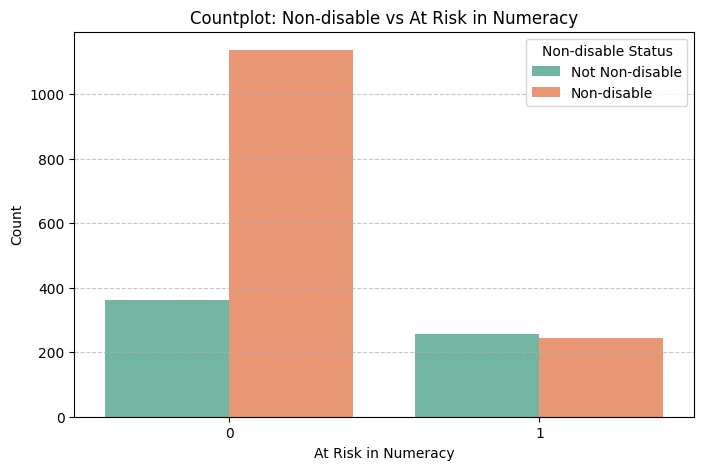

In [ ]:

plt.figure(figsize=(12, 5))

# countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='At_Risk_Numeracy', hue='Disability_Non-disable', data=Data2Intel_EduRisk_Dataset, palette='Set2')
plt.title('Countplot: Non-disable vs At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy')
plt.ylabel('Count')
plt.legend(title='Non-disable Status', labels=['Not Non-disable', 'Non-disable'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


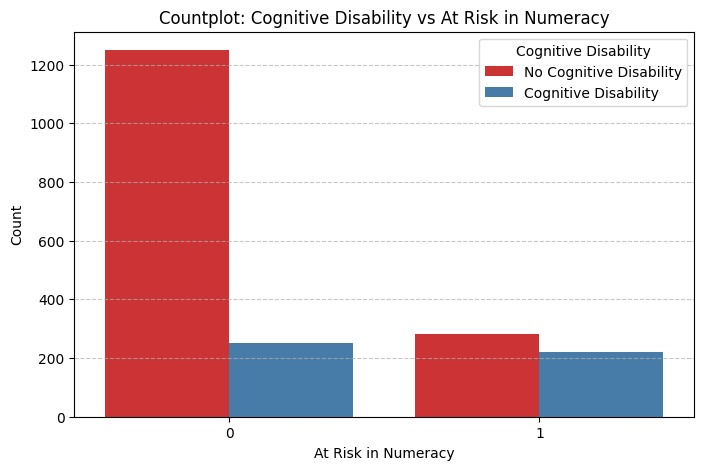

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='At_Risk_Numeracy', hue='Disability_Cognitive', data=Data2Intel_EduRisk_Dataset, palette='Set1')
plt.title('Countplot: Cognitive Disability vs At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy')
plt.ylabel('Count')
plt.legend(title='Cognitive Disability', labels=['No Cognitive Disability', 'Cognitive Disability'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


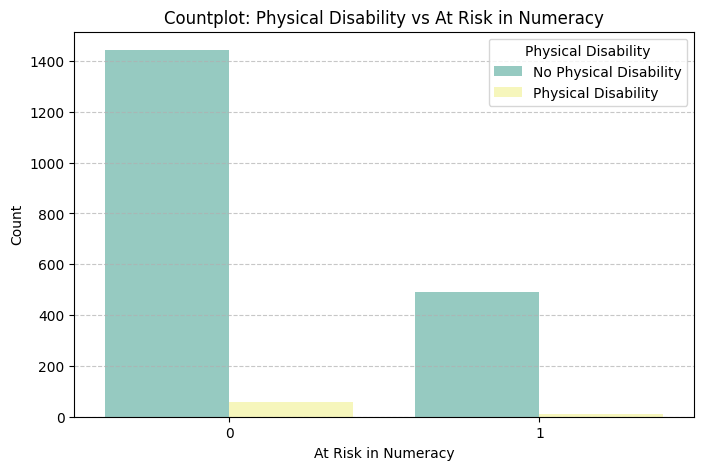

In [ ]:

# Histplot
plt.figure(figsize=(8, 5))
sns.countplot(x='At_Risk_Numeracy', hue='Disability_Physical', data=Data2Intel_EduRisk_Dataset, palette='Set3')
plt.title('Countplot: Physical Disability vs At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy')
plt.ylabel('Count')
plt.legend(title='Physical Disability', labels=['No Physical Disability', 'Physical Disability'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


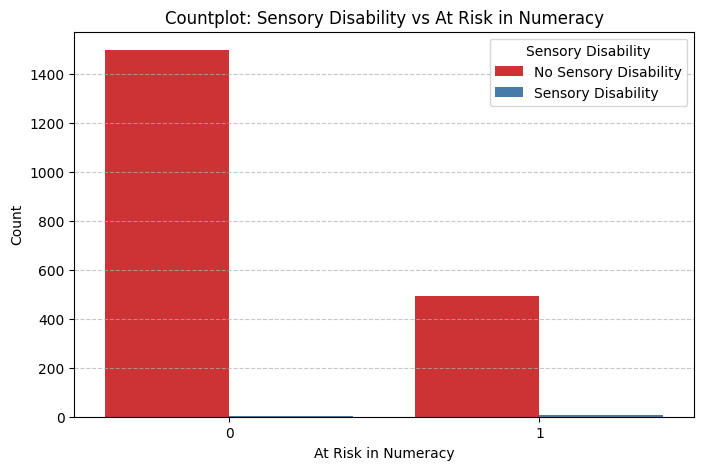

In [ ]:
# countplot. # add number labels everywhere     # add blue in sensory disbaility with numbers
plt.figure(figsize=(8, 5))
sns.countplot(x='At_Risk_Numeracy', hue='Disability_Sensory', data=Data2Intel_EduRisk_Dataset, palette='Set1')
plt.title('Countplot: Sensory Disability vs At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy')
plt.ylabel('Count')
plt.legend(title='Sensory Disability', labels=['No Sensory Disability', 'Sensory Disability'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


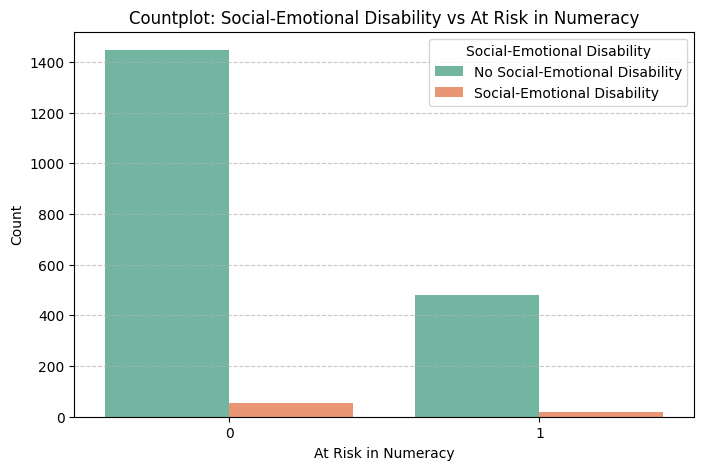

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='At_Risk_Numeracy', hue='Disability_SocialEmotional', data=Data2Intel_EduRisk_Dataset, palette='Set2')
plt.title('Countplot: Social-Emotional Disability vs At Risk in Numeracy')
plt.xlabel('At Risk in Numeracy')
plt.ylabel('Count')
plt.legend(title='Social-Emotional Disability', labels=['No Social-Emotional Disability', 'Social-Emotional Disability'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Multivariate Analysis

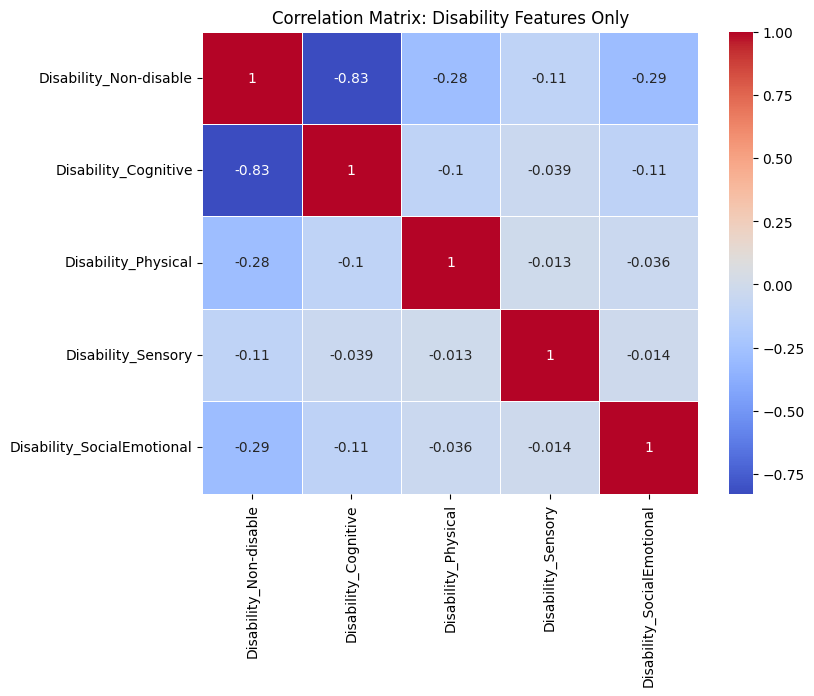

In [ ]:


# Selecting only disability features
disability_features = [
    'Disability_Non-disable',
    'Disability_Cognitive',
    'Disability_Physical',
    'Disability_Sensory',
    'Disability_SocialEmotional'
]

# Compute the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Data2Intel_EduRisk_Dataset[disability_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Disability Features Only')
plt.show()


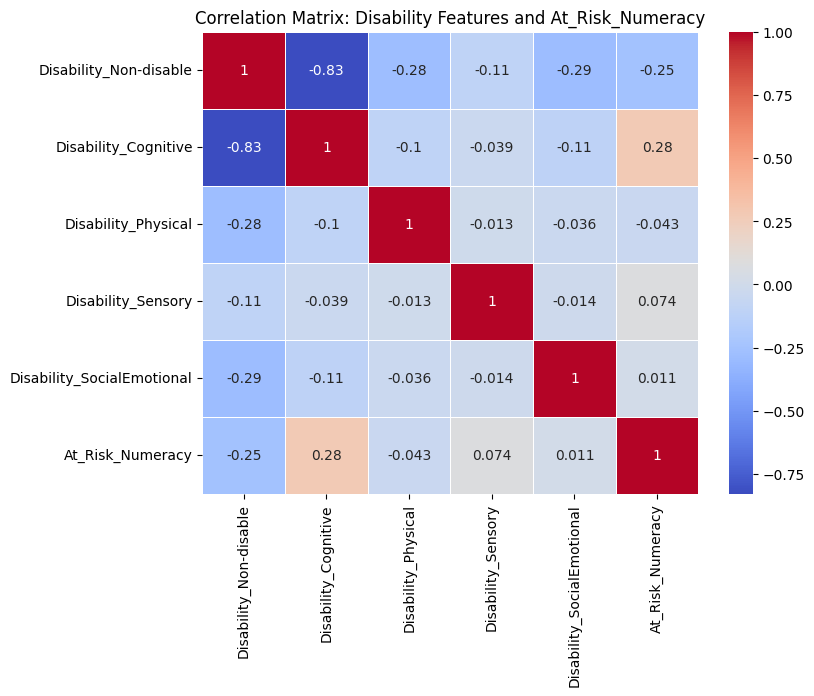

In [ ]:
# Adding the target feature to the list
all_features = disability_features + ['At_Risk_Numeracy']

# Compute the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Data2Intel_EduRisk_Dataset[all_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Disability Features and At_Risk_Numeracy')
plt.show()


# Task-1 Question-6


## Additional Insights

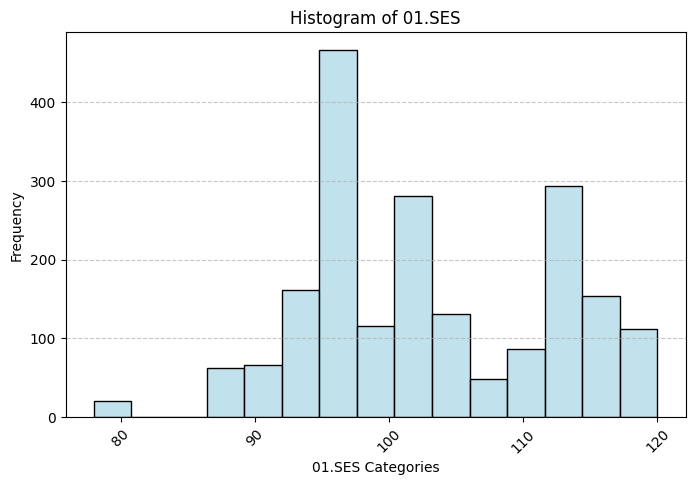

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Data2Intel_EduRisk_Dataset['01.SES'], bins=15, kde=False, color='lightblue')
plt.title('Histogram of 01.SES')
plt.xlabel('01.SES Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


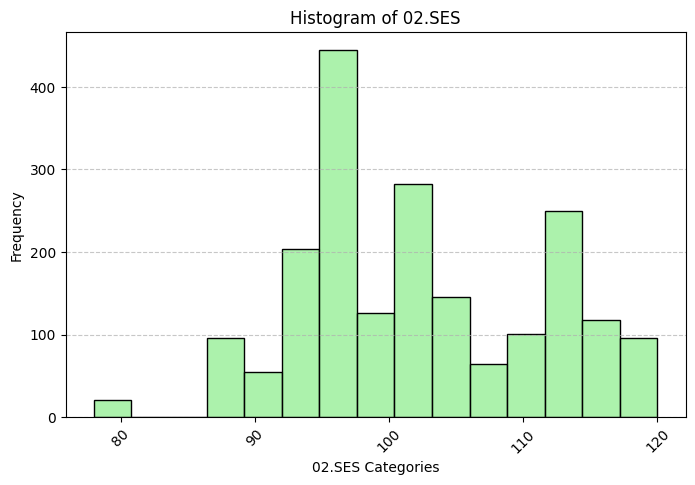

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Data2Intel_EduRisk_Dataset['02.SES'], bins=15, kde=False, color='lightgreen')
plt.title('Histogram of 02.SES')
plt.xlabel('02.SES Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Bivariet analysis of 01.SES, 02.SES

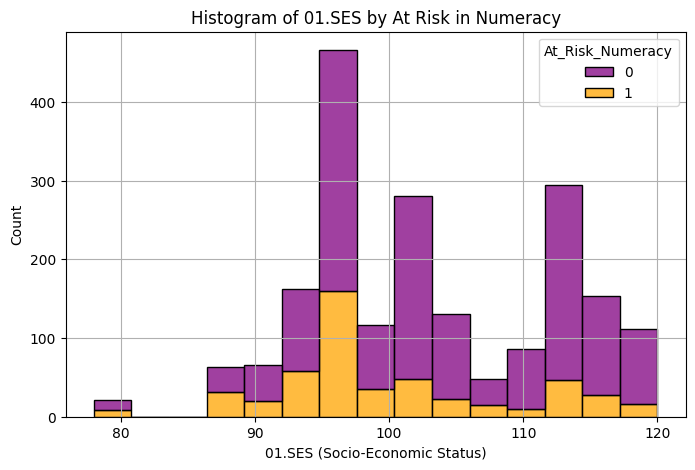

In [ ]:
# Histplot for 01.SES
plt.figure(figsize=(8, 5))
sns.histplot(data=Data2Intel_EduRisk_Dataset, x='01.SES', hue='At_Risk_Numeracy', multiple='stack', palette=['purple', 'orange'])
plt.title('Histogram of 01.SES by At Risk in Numeracy')
plt.xlabel('01.SES (Socio-Economic Status)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


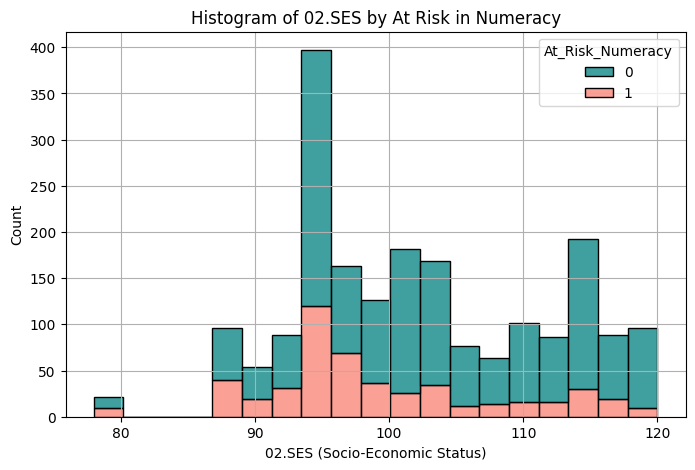

In [ ]:
# Histplot for 02.SES with different colors
plt.figure(figsize=(8, 5))
sns.histplot(data=Data2Intel_EduRisk_Dataset, x='02.SES', hue='At_Risk_Numeracy', multiple='stack', palette=['teal', 'salmon'])
plt.title('Histogram of 02.SES by At Risk in Numeracy')
plt.xlabel('02.SES (Socio-Economic Status)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Multivariet of 01.SES', '02.SES vs 'At_Risk_Numeracy'

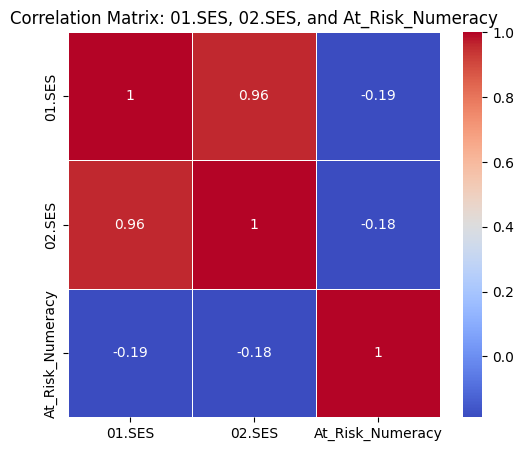

In [ ]:

# Selecting the specific columns
selected_columns = ['01.SES', '02.SES', 'At_Risk_Numeracy']

# Plotting the heatmap
plt.figure(figsize=(6, 5))
correlation_matrix = Data2Intel_EduRisk_Dataset[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: 01.SES, 02.SES, and At_Risk_Numeracy')
plt.show()




In [ ]:

# Converting Gender to numerical values
# Assuming the categories are 'Male' and 'Female'
Data2Intel_EduRisk_Dataset['Gender'] = Data2Intel_EduRisk_Dataset['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
print(Data2Intel_EduRisk_Dataset['Gender'].head(5))


0    1
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64


<ipython-input-66-6e8f43e3fe69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=Data2Intel_EduRisk_Dataset, palette='Set2')


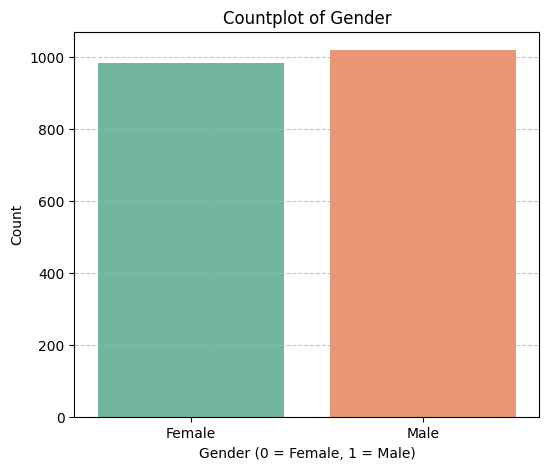

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=Data2Intel_EduRisk_Dataset, palette='Set2')
plt.title('Countplot of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

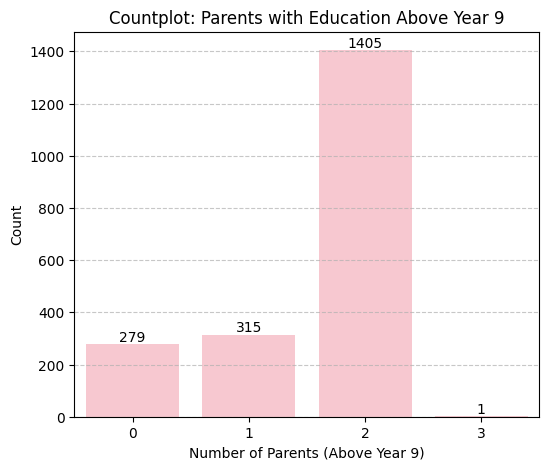

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='NumAbvYear9', data=Data2Intel_EduRisk_Dataset, color='Pink')

# Add value labels above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Countplot: Parents with Education Above Year 9')
plt.xlabel('Number of Parents (Above Year 9)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

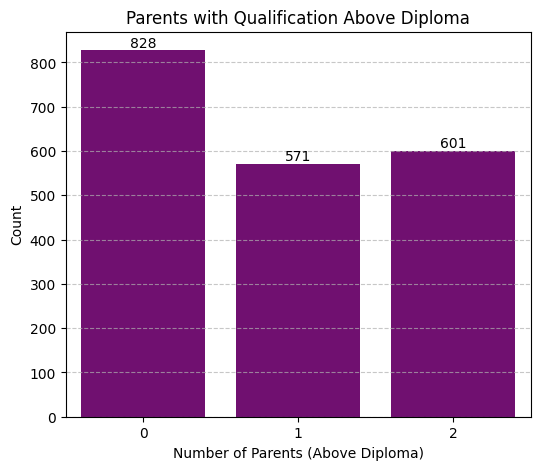

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='NumAbvDiploma', data=Data2Intel_EduRisk_Dataset, color='purple')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Parents with Qualification Above Diploma')
plt.xlabel('Number of Parents (Above Diploma)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


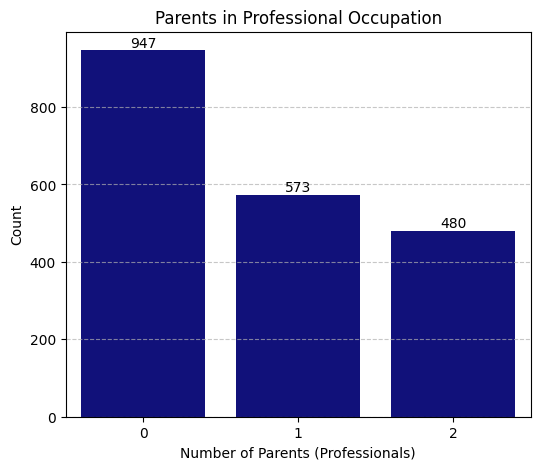

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='NumProf', data=Data2Intel_EduRisk_Dataset, color='darkblue')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Parents in Professional Occupation')
plt.xlabel('Number of Parents (Professionals)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Bivariet Analysis

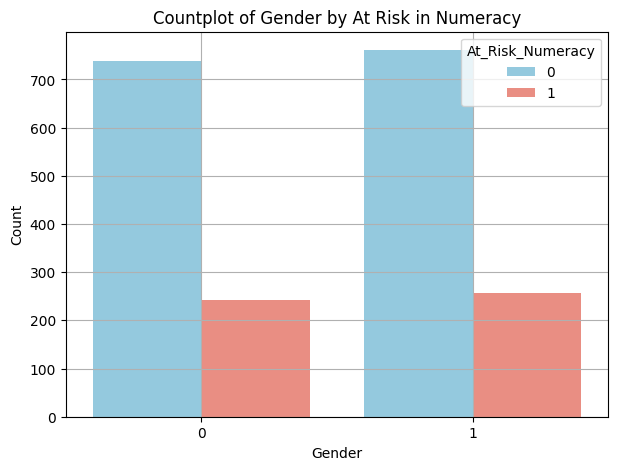

In [ ]:
# Countplot for Gender with At_Risk_Numeracy hue
plt.figure(figsize=(7, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='Gender', hue='At_Risk_Numeracy', palette=['skyblue', 'salmon'])
plt.title('Countplot of Gender by At Risk in Numeracy')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


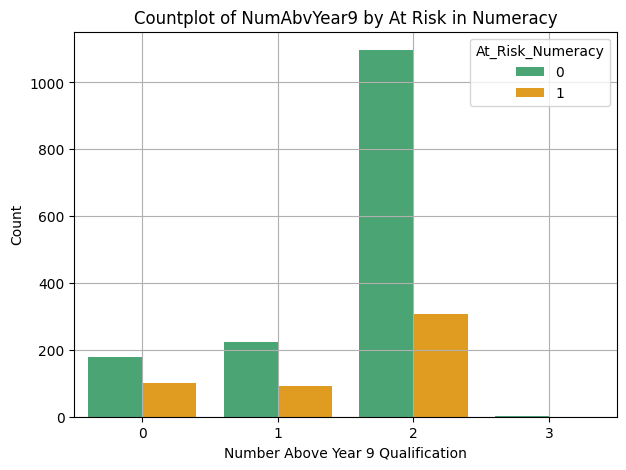

In [ ]:
# Countplot for NumAbvYear9 with At_Risk_Numeracy hue
plt.figure(figsize=(7, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='NumAbvYear9', hue='At_Risk_Numeracy', palette=['mediumseagreen', 'orange'])
plt.title('Countplot of NumAbvYear9 by At Risk in Numeracy')
plt.xlabel('Number Above Year 9 Qualification')
plt.ylabel('Count')
plt.grid(True)
plt.show()


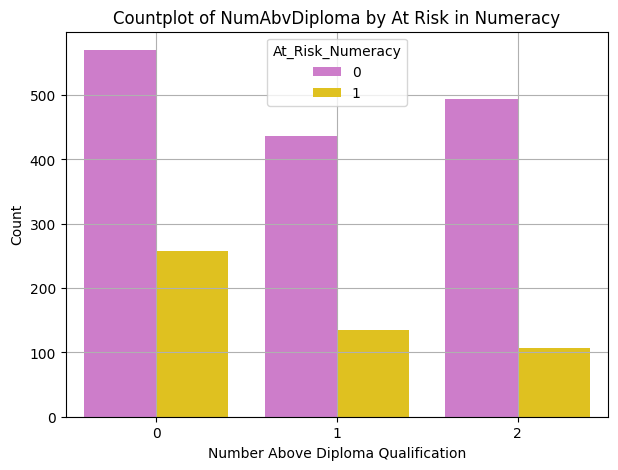

In [ ]:
# Countplot for NumAbvDiploma with At_Risk_Numeracy hue
plt.figure(figsize=(7, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='NumAbvDiploma', hue='At_Risk_Numeracy', palette=['orchid', 'gold'])
plt.title('Countplot of NumAbvDiploma by At Risk in Numeracy')
plt.xlabel('Number Above Diploma Qualification')
plt.ylabel('Count')
plt.grid(True)
plt.show()


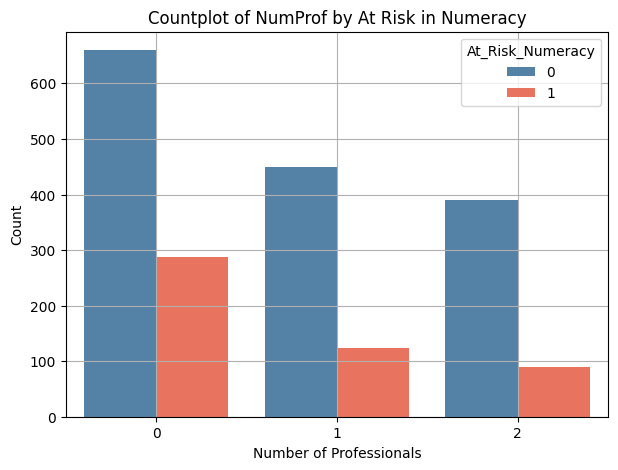

In [ ]:
# Countplot for NumProf with At_Risk_Numeracy hue
plt.figure(figsize=(7, 5))
sns.countplot(data=Data2Intel_EduRisk_Dataset, x='NumProf', hue='At_Risk_Numeracy', palette=['steelblue', 'tomato'])
plt.title('Countplot of NumProf by At Risk in Numeracy')
plt.xlabel('Number of Professionals')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Multivariet Analysis

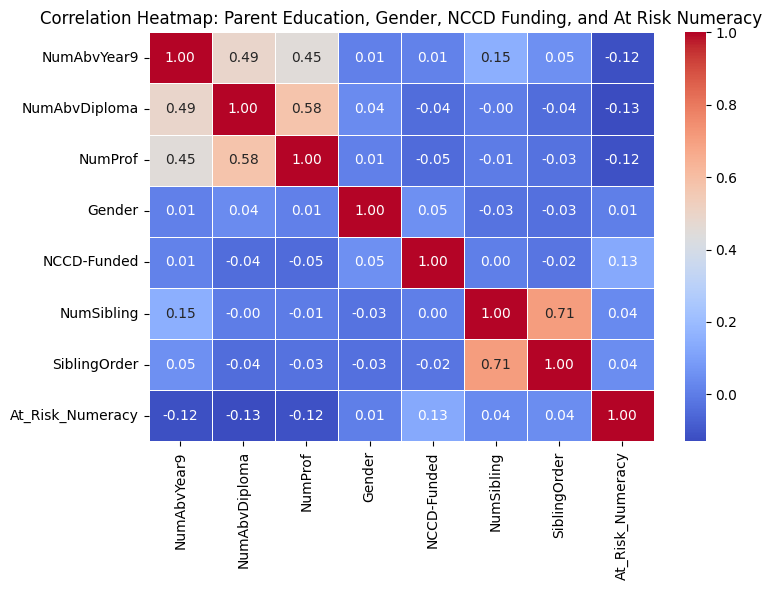

In [ ]:

# Add NCCD-funded to the correlation list
heatmap_vars = ['NumAbvYear9', 'NumAbvDiploma', 'NumProf', 'Gender', 'NCCD-Funded',"NumSibling","SiblingOrder",'At_Risk_Numeracy']

# Compute correlation matrix
corr_matrix = Data2Intel_EduRisk_Dataset[heatmap_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap: Parent Education, Gender, NCCD Funding, and At Risk Numeracy')
plt.tight_layout()
plt.show()


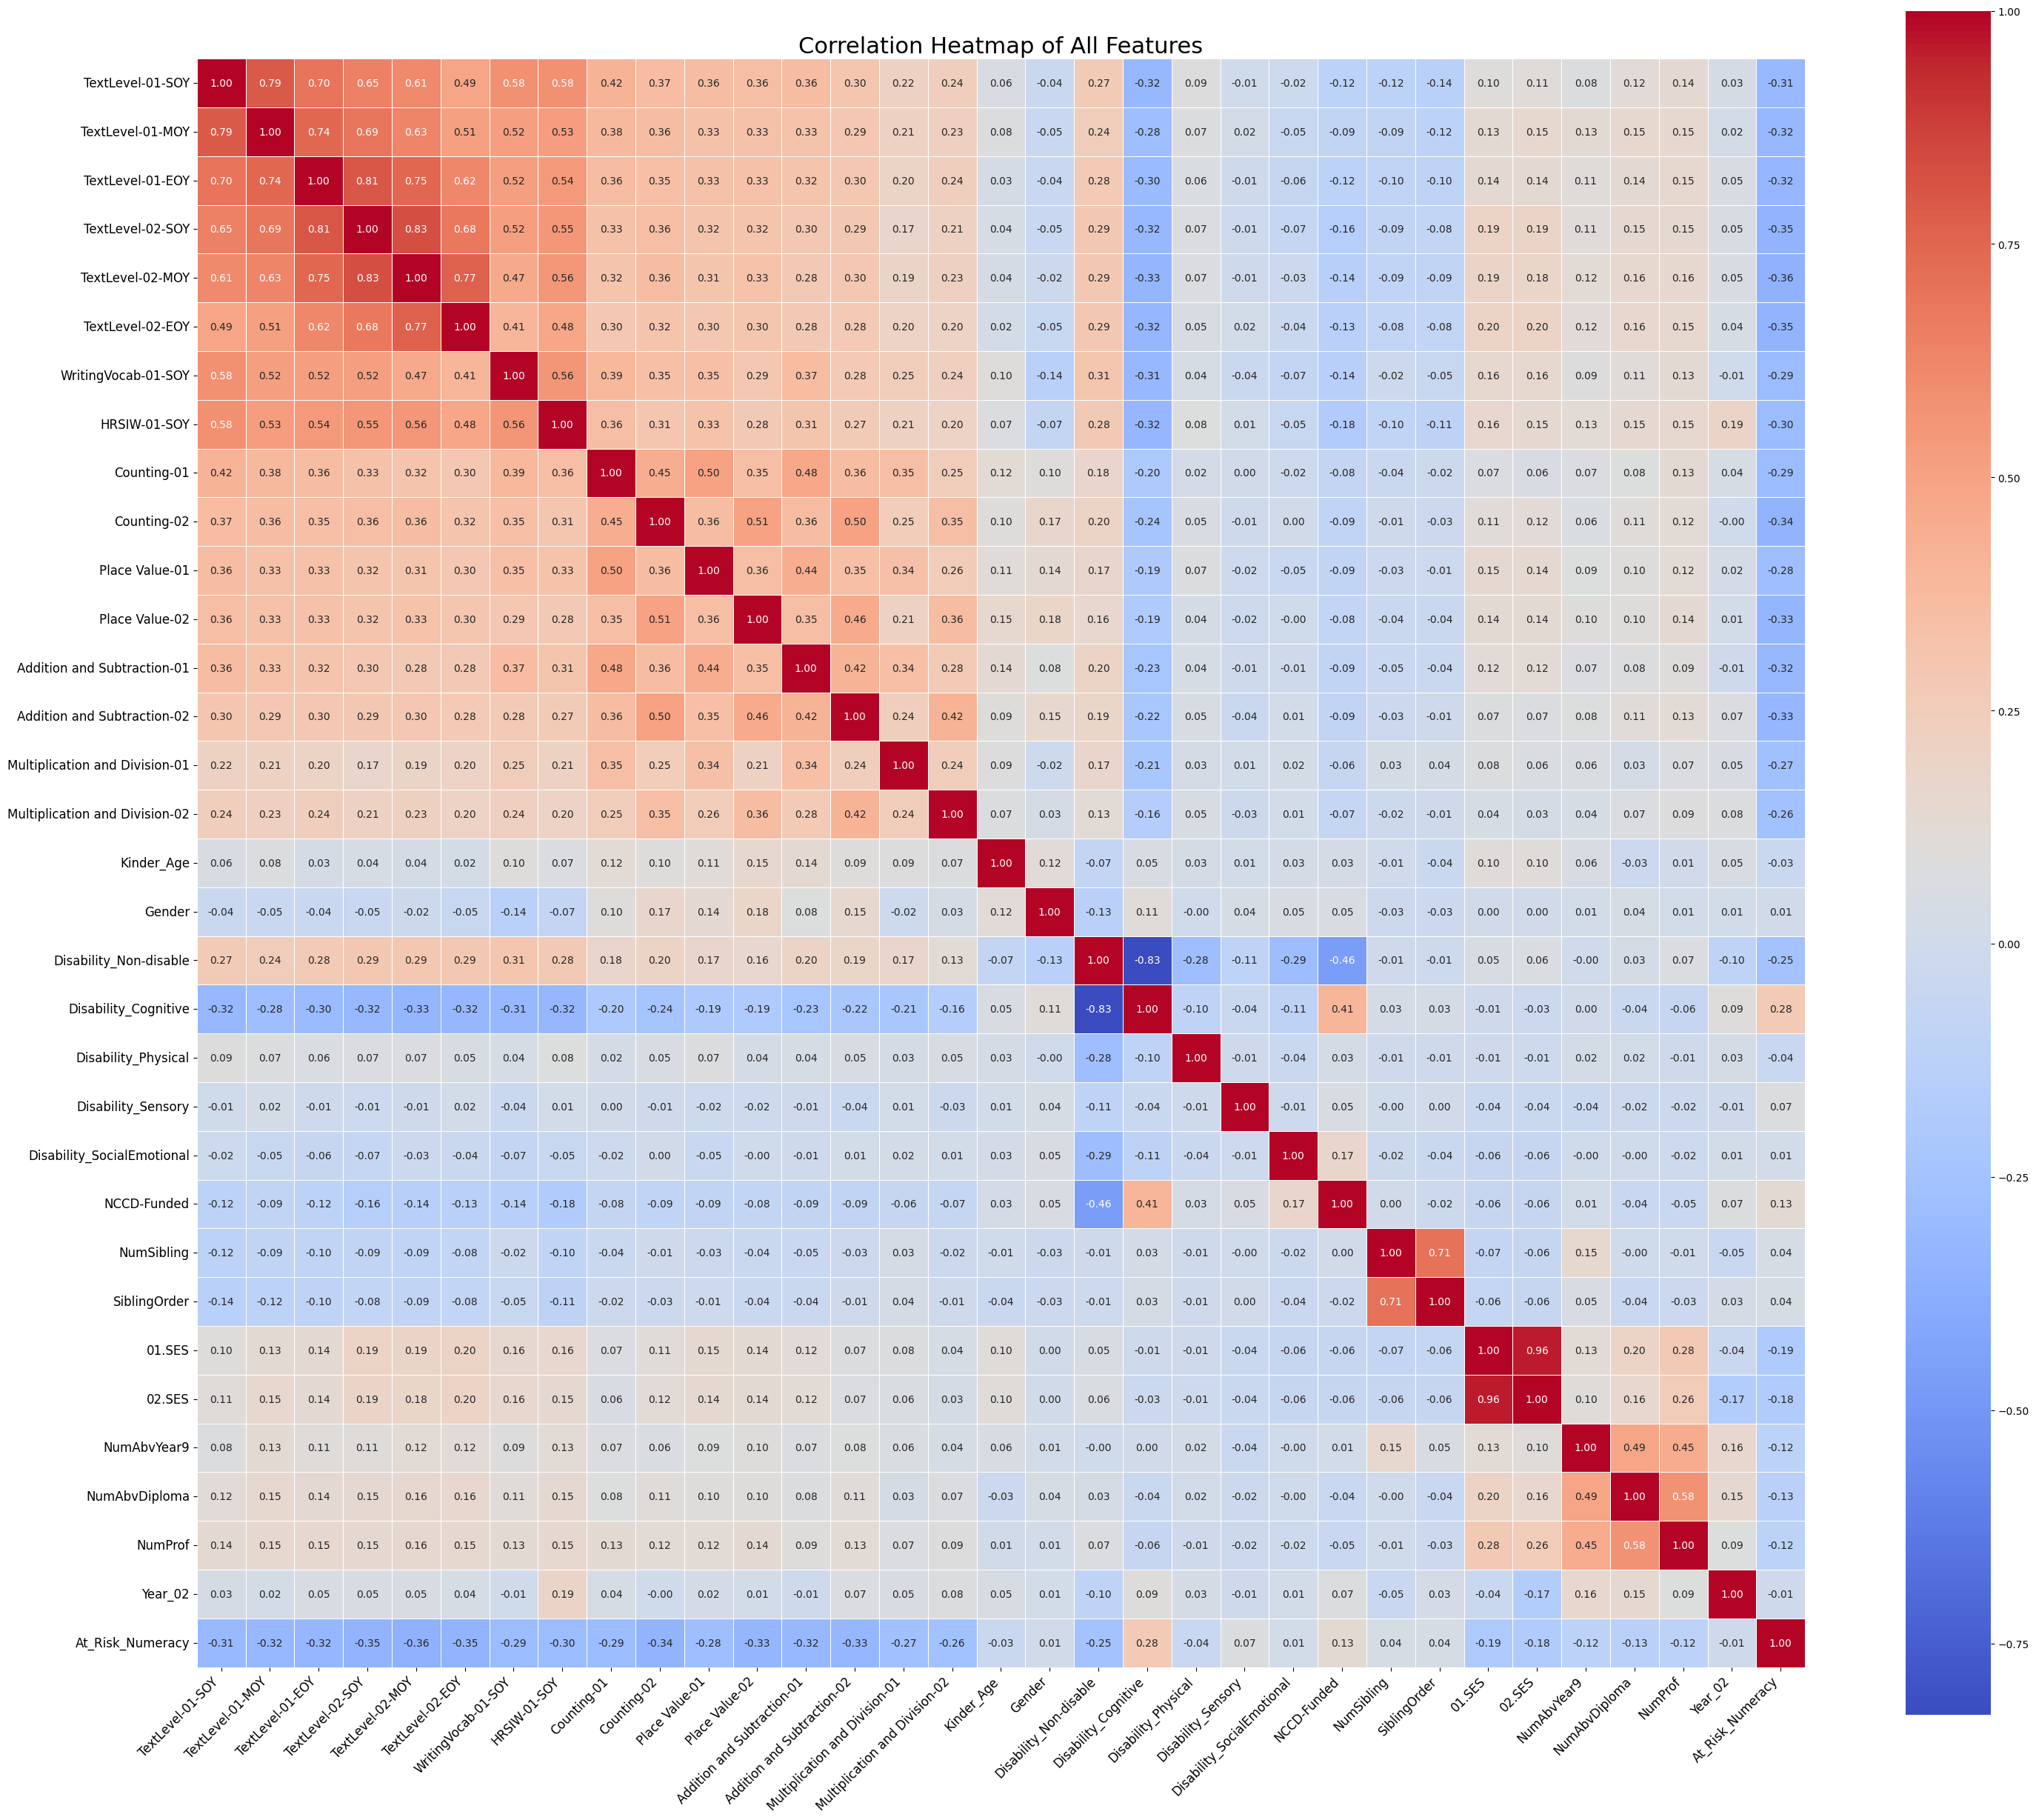

In [ ]:

# Set a larger figure size
plt.figure(figsize=(30, 25))  # Extra-large heatmap

# Compute the correlation matrix
corr_matrix = Data2Intel_EduRisk_Dataset.corr(numeric_only=True)

# Draw the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Customize labels and title
plt.title('Correlation Heatmap of All Features', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



# Logistic Regression- Supervised Predictive Model

## Explore the target Variable

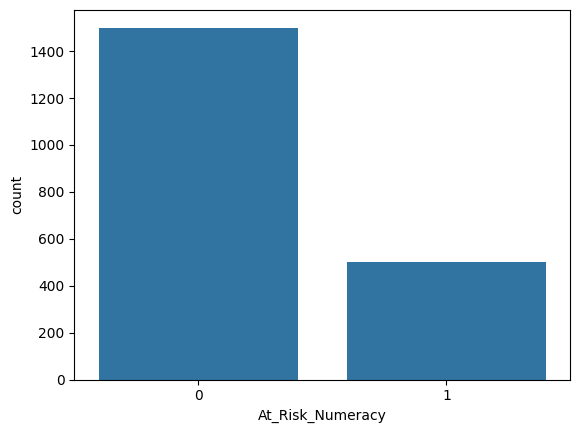

In [ ]:
plot=sns.countplot(data=Data2Intel_EduRisk_Dataset, x='At_Risk_Numeracy')
plt.show()

In [ ]:
outcome_counts = Data2Intel_EduRisk_Dataset.At_Risk_Numeracy.value_counts()
outcome_counts

At_Risk_Numeracy
0    1500
1     500
Name: count, dtype: int64

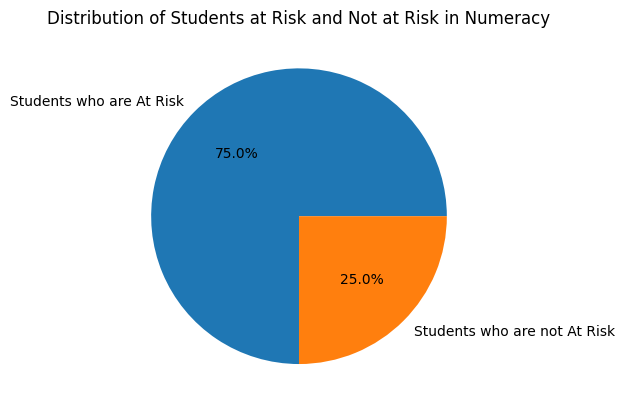

In [ ]:
outcome_labels = ['Students who are At Risk', 'Students who are not At Risk']
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%')
plt.title('Distribution of Students at Risk and Not at Risk in Numeracy')
plt.show()

## Feature Selection


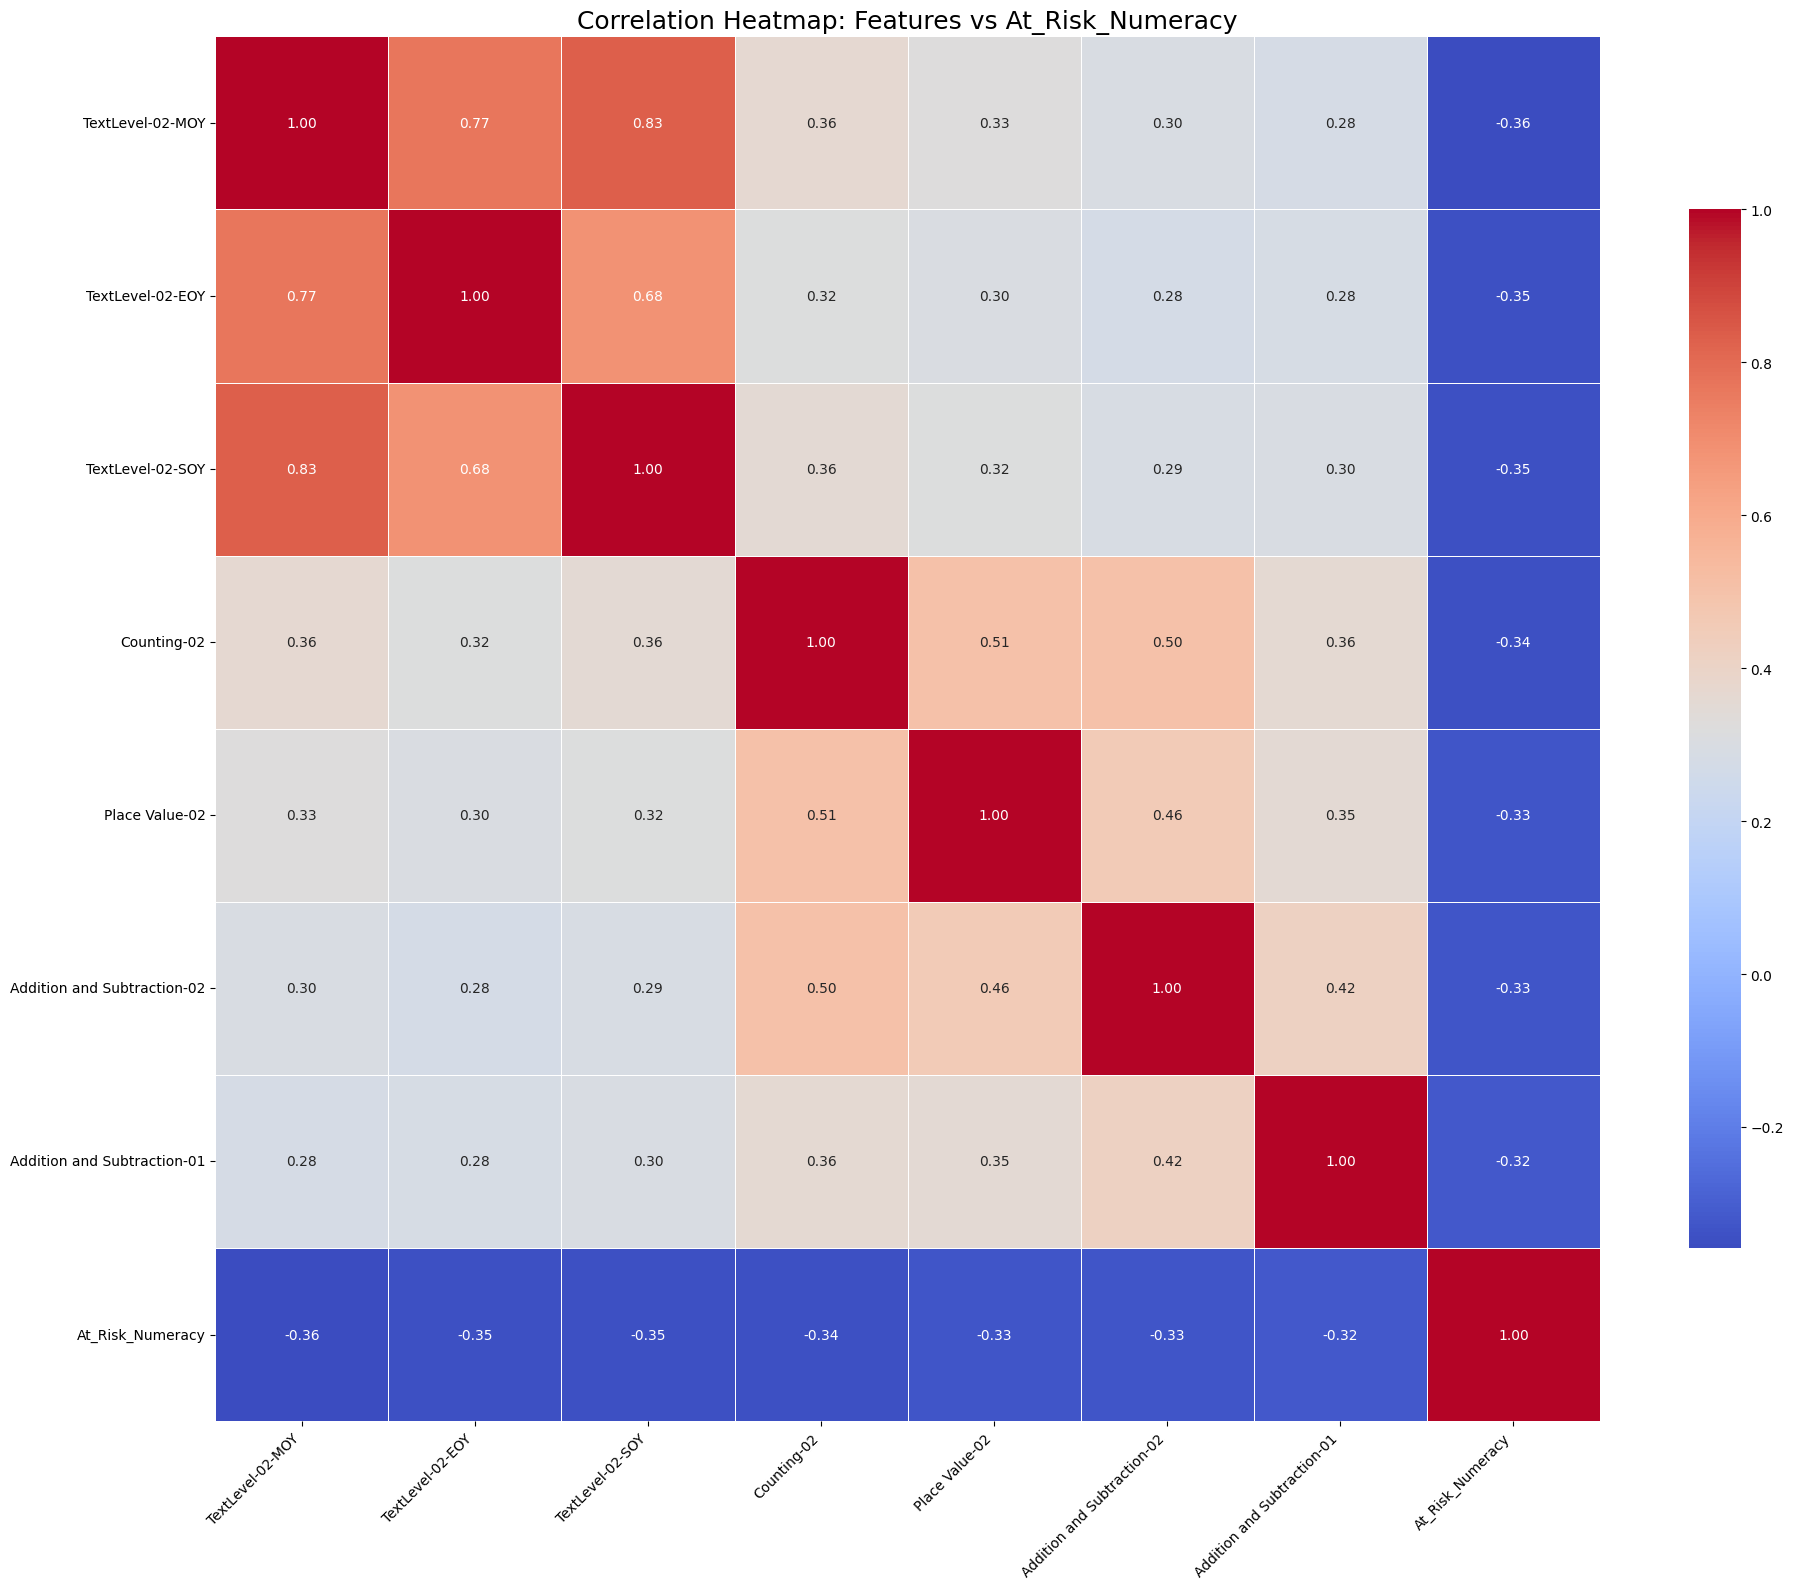

In [ ]:
# Your selected features
features = [
    "TextLevel-02-MOY",
    "TextLevel-02-EOY",
    "TextLevel-02-SOY",
    'Counting-02',
    'Place Value-02',
    'Addition and Subtraction-02',
    'Addition and Subtraction-01',


]

# Define predictors and target
X = Data2Intel_EduRisk_Dataset[features]
y = Data2Intel_EduRisk_Dataset['At_Risk_Numeracy']

# Combine for correlation
df_combined = X.copy()
df_combined['At_Risk_Numeracy'] = y

# Compute correlation matrix
correlation_matrix = df_combined.corr()

# Plot large heatmap
plt.figure(figsize=(20, 16))  # Wider and taller for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f", square=True, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap: Features vs At_Risk_Numeracy', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Define the predictors and label

In [ ]:
# Define the predictors and label
X = Data2Intel_EduRisk_Dataset[features]
y = Data2Intel_EduRisk_Dataset['At_Risk_Numeracy']

# Display the first few rows
print(X.head())
print(y.head())

   TextLevel-02-MOY  TextLevel-02-EOY  TextLevel-02-SOY  Counting-02  \
0                30                32                25            5   
1                18                21                19            1   
2                23                22                18            1   
3                26                31                27            3   
4                24                26                21            4   

   Place Value-02  Addition and Subtraction-02  Addition and Subtraction-01  
0               2                            4                            2  
1               1                            3                            2  
2               2                            1                            2  
3               2                            5                            1  
4               2                            4                            2  
0    0
1    0
2    0
3    0
4    0
Name: At_Risk_Numeracy, dtype: int64


## Splitting the data

In [ ]:
# Step 2: Create X and y
X = Data2Intel_EduRisk_Dataset[features]
y = Data2Intel_EduRisk_Dataset['At_Risk_Numeracy']

# Step 3: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1738 to 1126
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   TextLevel-02-MOY             1500 non-null   int64
 1   TextLevel-02-EOY             1500 non-null   int64
 2   TextLevel-02-SOY             1500 non-null   int64
 3   Counting-02                  1500 non-null   int64
 4   Place Value-02               1500 non-null   int64
 5   Addition and Subtraction-02  1500 non-null   int64
 6   Addition and Subtraction-01  1500 non-null   int64
dtypes: int64(7)
memory usage: 93.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1860 to 694
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   TextLevel-02-MOY             500 non-null    int64
 1   TextLevel-02-EOY             500 non-null    int64
 2   TextLevel-02-SOY 

## Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=2257)
log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)
y_pred_probs = log_reg.predict_proba(X_test_scaled)[:, 1]


## Train the model

In [ ]:
# Step 4: Train logistic regression model
log_reg = LogisticRegression(max_iter=2257)
log_reg.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_logreg = log_reg.predict(X_test)

##  Inspec prediction with Actual and Predicted Classes



In [ ]:
# Combine actual and predicted class labels
inspection = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg})


## Add Test Features to the Inspection DataFrame

In [ ]:
# Combine test features with the Actual/Predicted DataFrame
inspection = pd.concat([X_test.reset_index(drop=True), inspection.reset_index(drop=True)], axis=1)


## Get Predicted Probabilities

In [ ]:
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]
print(inspection.sample(20))

     TextLevel-02-MOY  TextLevel-02-EOY  TextLevel-02-SOY  Counting-02  \
397                25                29                21            2   
46                 27                28                26            4   
131                26                28                18            4   
418                17                22                18            3   
62                 18                25                17            2   
264                25                25                18            3   
15                 17                30                14            2   
43                 21                23                15            2   
339                27                31                22            3   
60                 20                23                19            2   
78                 21                21                17            1   
14                 21                20                18            3   
434                24                2

## Add Probabilities to the Inspection DataFrame

In [ ]:
# Step 9: Add probabilities to inspection
inspection['Probability'] = y_pred_probs

# Step 10: Preview sample of predictions
print(inspection.sample(20))

     TextLevel-02-MOY  TextLevel-02-EOY  TextLevel-02-SOY  Counting-02  \
90                 22                22                22            5   
19                 25                29                22            2   
120                21                26                18            1   
338                28                31                29            4   
202                27                30                24            4   
26                 31                31                33            4   
134                26                27                23            4   
243                23                26                20            2   
305                26                26                22            4   
343                25                30                25            4   
358                24                30                20            2   
14                 21                20                18            3   
497                22                2

##  Evaluate Model Performance

In [ ]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Confusion Matrix:
 [[359  19]
 [ 78  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       378
           1       0.70      0.36      0.48       122

    accuracy                           0.81       500
   macro avg       0.76      0.66      0.68       500
weighted avg       0.79      0.81      0.78       500



## Confusion metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("\nLogistic Regression Performance:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")



Logistic Regression Performance:
Accuracy : 0.81
Precision: 0.70
Recall   : 0.36
F1 Score : 0.48


probabilities of the classes

In [ ]:
probabilities = log_reg.predict_proba(X_test)
y_prob = probabilities[:, 1]  # Probabilities for positive class (At Risk)

## display RocCurve and Confusion Matrix

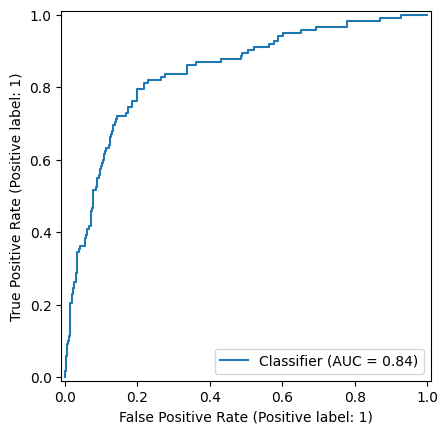

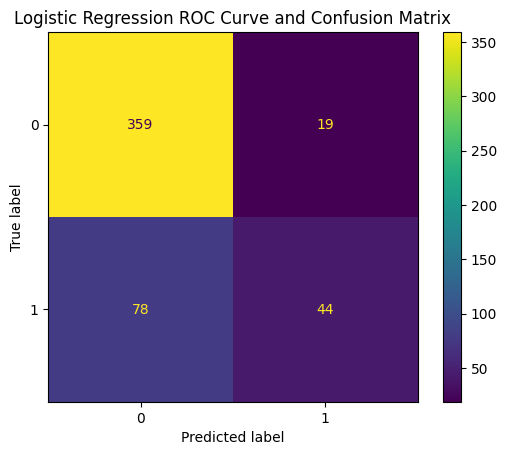

In [ ]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title('Logistic Regression ROC Curve and Confusion Matrix')
plt.show()


## Logistic Regression Sigmoid Curve

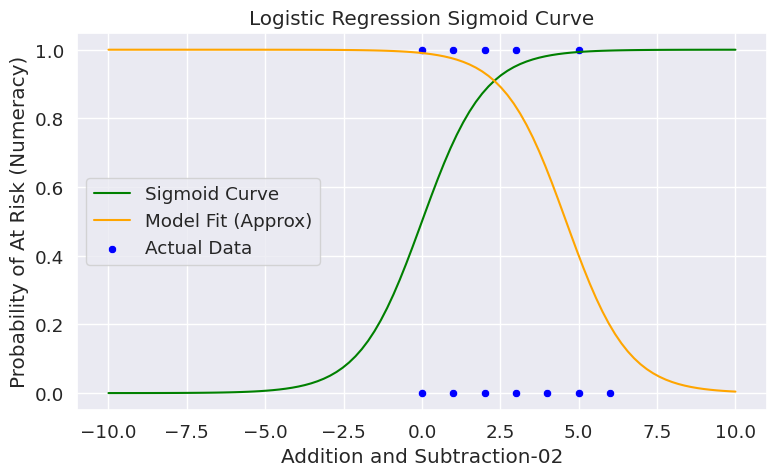

In [ ]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of x values
x_vals = np.linspace(-10, 10, 100)

# Flatten model coefficients and intercept
coef = log_reg.coef_.flatten()
intercept = log_reg.intercept_

# Generic sigmoid curve
y_generic = sigmoid(x_vals)

# Approximate model-fit curve (for visual effect only — not exact without full feature matrix)
# For simplicity, this multiplies the same x across the top 5 features
x_matrix = np.column_stack([x_vals] * 5)  # Assuming visualization for 5 features
y_model_fit = sigmoid(np.dot(x_matrix, coef[:5]) + intercept)

# Feature to scatter for actual values
scatter_feature = 'Addition and Subtraction-02'

# Plotting
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)

plt.figure(figsize=(8, 5))
sns.lineplot(x=x_vals, y=y_generic, label='Sigmoid Curve', color='green')
sns.lineplot(x=x_vals, y=y_model_fit, label='Model Fit (Approx)', color='orange')
sns.scatterplot(x=X_test[scatter_feature], y=y_test, color='blue', label='Actual Data')
plt.xlabel(scatter_feature)
plt.ylabel('Probability of At Risk (Numeracy)')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.tight_layout()
plt.show()


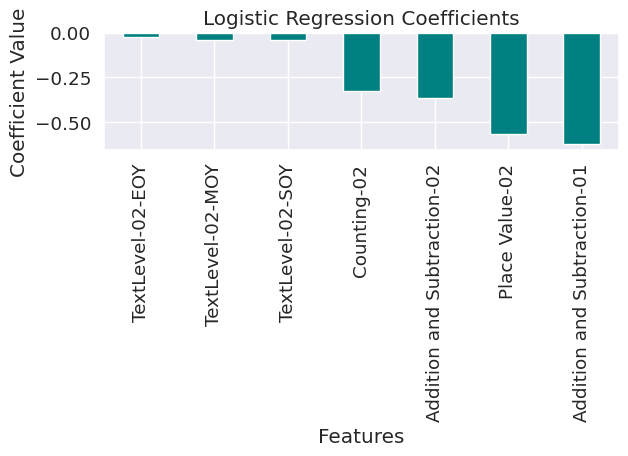

In [ ]:
coefs = pd.Series(log_reg.coef_[0], index=X.columns.values)
coefs.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


In [ ]:
print('At_Risk_Numeracy =')
print('    ', '%.3f' % intercept)
print('  + ', '%.3f' % coef[0], '* TextLevel-02-SOY')
print('  + ', '%.3f' % coef[1], '* TextLevel-02-MOY')
print('  + ', '%.3f' % coef[2], '* TextLevel-02-EOY')
print('  + ', '%.3f' % coef[3], '* Counting-02')
print('  + ', '%.3f' % coef[4], '* Place Value-02')
print('  + ', '%.3f' % coef[5], '* Addition and Subtraction-02')



At_Risk_Numeracy =
     4.630
  +  -0.043 * TextLevel-02-SOY
  +  -0.026 * TextLevel-02-MOY
  +  -0.044 * TextLevel-02-EOY
  +  -0.326 * Counting-02
  +  -0.567 * Place Value-02
  +  -0.365 * Addition and Subtraction-02


<ipython-input-94-1d18081ae496>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('    ', '%.3f' % intercept)


# K-Nearest Neighbors(KNN Model- Supervised Predictive Model)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, LeaveOneOut, LeavePOut
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Assuming X_train is already defined
X_test_scaled = scaler.transform(X_test)


## KNN Model Evaluation

In [ ]:
# KNN with k=10
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train_scaled, y_train)
y_pred_k10 = knn_10.predict(X_test_scaled)

print("KNN Model (k=10) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_k10))
print("\nClassification Report (k=10):")
print(classification_report(y_test, y_pred_k10))

# KNN with k=30
knn_30 = KNeighborsClassifier(n_neighbors=30)
knn_30.fit(X_train_scaled, y_train)
y_pred_k30 = knn_30.predict(X_test_scaled)

print("\nKNN Model (k=30) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_k30))
print("\nClassification Report (k=30):")
print(classification_report(y_test, y_pred_k30))


KNN Model (k=10) Confusion Matrix:
[[358  20]
 [ 80  42]]

Classification Report (k=10):
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       378
           1       0.68      0.34      0.46       122

    accuracy                           0.80       500
   macro avg       0.75      0.65      0.67       500
weighted avg       0.78      0.80      0.77       500


KNN Model (k=30) Confusion Matrix:
[[357  21]
 [ 76  46]]

Classification Report (k=30):
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       378
           1       0.69      0.38      0.49       122

    accuracy                           0.81       500
   macro avg       0.76      0.66      0.68       500
weighted avg       0.79      0.81      0.78       500



## Model Optimisation with best k value

Best k value: 13
Best accuracy: 0.818


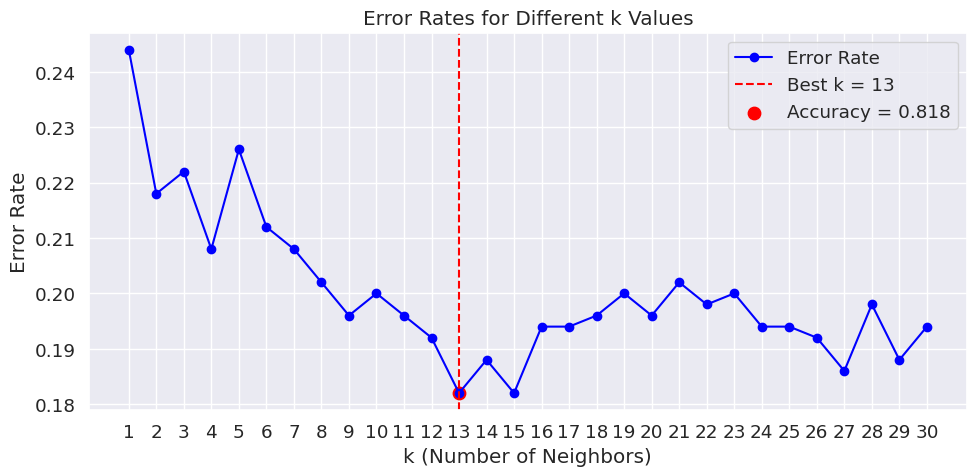

In [ ]:


# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values
best_k = 0
best_accuracy = 0
accuracy_scores = []
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1 - accuracy)

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Output best k and accuracy
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Plot the error rates
plt.figure(figsize=(10, 5))
plt.plot(k_values, error_rates, color='blue', marker='o', label='Error Rate')

# Highlight best k
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.scatter(best_k, 1 - best_accuracy, color='red', s=80, label=f'Accuracy = {best_accuracy:.3f}')

# Customize ticks and labels
plt.xticks(k_values)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Error Rates for Different k Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Train a KNN model with best K value
best_k= 13# Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test_scaled)


In [ ]:
# Train and predict again with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_pred_bestk = knn_best.predict(X_test_scaled)

print(f"\n Confusion Matrix for Best k = {best_k}")
print(confusion_matrix(y_test, y_pred_bestk))
print(classification_report(y_test, y_pred_bestk))


 Confusion Matrix for Best k = 13
[[352  26]
 [ 65  57]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       378
           1       0.69      0.47      0.56       122

    accuracy                           0.82       500
   macro avg       0.77      0.70      0.72       500
weighted avg       0.81      0.82      0.81       500



## ROC Curve Data and accuracy

In [ ]:
best_k = 13

# Train the KNN model using the best k
knn_bestk = KNeighborsClassifier(n_neighbors=best_k)
knn_bestk.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred_probs_bestk = knn_bestk.predict_proba(X_test_scaled)[:, 1]


## Get Class Probabilities for student at risk

In [ ]:
# Get predicted probabilities for class 1 (At Risk = 1)
y_pred_probs_bestk = knn_bestk.predict_proba(X_test_scaled)[:, 1]
print("Class 1 Probabilities (At Risk):")
print(y_pred_probs_bestk)


Class 1 Probabilities (At Risk):
[0.07692308 0.         0.         0.         0.69230769 0.23076923
 0.38461538 0.15384615 0.38461538 0.23076923 0.30769231 0.61538462
 0.07692308 0.15384615 0.15384615 0.53846154 0.         0.15384615
 0.15384615 0.15384615 0.15384615 0.53846154 0.30769231 0.15384615
 0.15384615 0.         0.07692308 0.15384615 0.         0.07692308
 0.         0.         0.38461538 0.         0.07692308 0.30769231
 0.30769231 0.07692308 0.46153846 0.30769231 0.         0.30769231
 0.15384615 0.53846154 0.53846154 0.         0.         0.
 0.46153846 0.69230769 0.23076923 0.07692308 0.         0.23076923
 0.         0.38461538 0.53846154 0.         0.30769231 0.
 0.38461538 0.         0.30769231 0.         0.07692308 0.46153846
 0.69230769 0.         0.30769231 0.         0.15384615 0.07692308
 0.         0.07692308 0.07692308 0.07692308 0.53846154 0.38461538
 0.53846154 0.61538462 0.15384615 0.         0.         0.
 0.38461538 0.61538462 0.76923077 0.76923077 0.076923

## Plot ROC Curve & Get AUC

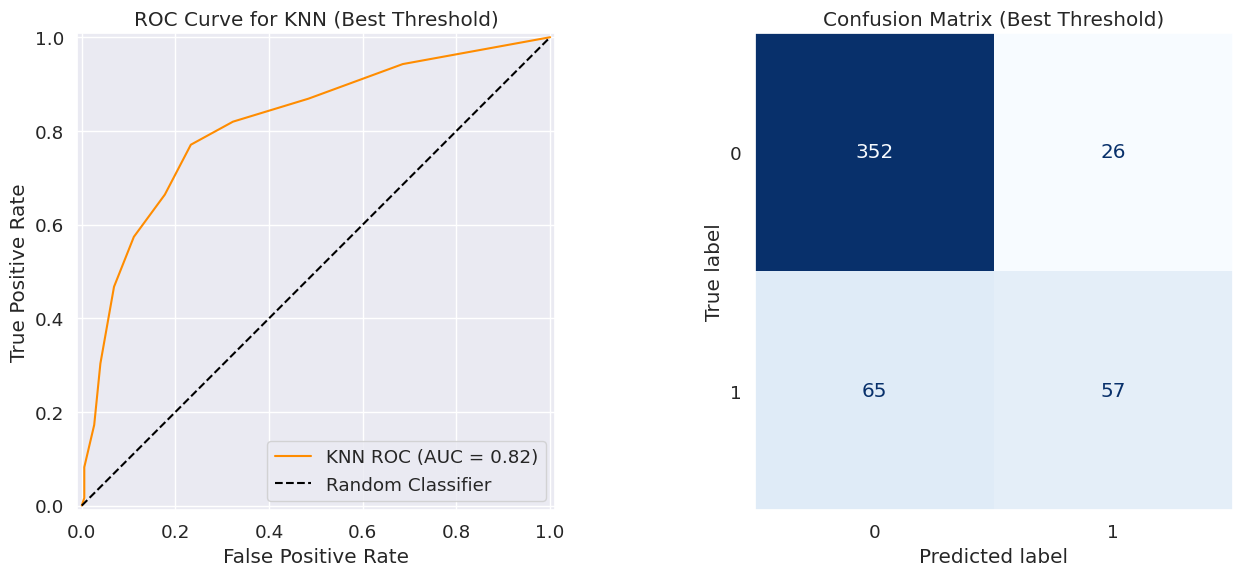

In [ ]:
y_pred_best = knn_bestk.predict(X_test_scaled)

# Set figure size and layout
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve (with best threshold)
roc_disp = RocCurveDisplay.from_predictions(
    y_test, y_pred_probs_bestk,
    name="KNN ROC", ax=ax[0], color='darkorange'
)
ax[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax[0].set_title('ROC Curve for KNN (Best Threshold)')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Confusion Matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_best,
    ax=ax[1], cmap='Blues', colorbar=False
)
ax[1].set_title('Confusion Matrix (Best Threshold)')
ax[1].grid(False)

# Apply tight layout
plt.tight_layout()
plt.show()

## Find Best Threshold Based on Accuracy

In [ ]:
thresholds = np.arange(0.0, 1.01, 0.01)
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    accuracy.append(accuracy_score(y_test, y_pred_t))

best_threshold_acc = thresholds[accuracy.index(max(accuracy))]
print("Best Threshold by Accuracy:", round(best_threshold_acc, 2))

Best Threshold by Accuracy: 0.47


## Evaluate prediction using best accuracy threshold

In [ ]:
# Evaluate prediction using best accuracy threshold
y_pred_best_acc = (y_pred_probs_bestk >= best_threshold_acc).astype(int)
print("Confusion Matrix (Best Accuracy Threshold):")
print(confusion_matrix(y_test, y_pred_best_acc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_acc))

Confusion Matrix (Best Accuracy Threshold):
[[352  26]
 [ 65  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       378
           1       0.69      0.47      0.56       122

    accuracy                           0.82       500
   macro avg       0.77      0.70      0.72       500
weighted avg       0.81      0.82      0.81       500



## Find Best Threshold Based on F1 Score

In [ ]:
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    f1.append(f1_score(y_test, y_pred_t))

best_threshold_f1 = thresholds[f1.index(max(f1))]
print("Best Threshold by F1 Score:", round(best_threshold_f1, 2))

Best Threshold by F1 Score: 0.24


## Apply Best Threshold and Predict Final Labels

In [ ]:
# Apply best threshold for F1 score
y_pred_best = (y_pred_probs_bestk >= best_threshold_f1).astype(int)


## Evaluate Final Prediction

In [ ]:
print(" Confusion Matrix (Best Threshold):")
print(confusion_matrix(y_test, y_pred_best))

print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

 Confusion Matrix (Best Threshold):
[[290  88]
 [ 28  94]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       378
           1       0.52      0.77      0.62       122

    accuracy                           0.77       500
   macro avg       0.71      0.77      0.73       500
weighted avg       0.82      0.77      0.78       500



## Summary Metric for best threshold

In [ ]:
print(" Accuracy :", metrics.accuracy_score(y_test, y_pred_best))
print("Precision:", metrics.precision_score(y_test, y_pred_best))
print("Recall   :", metrics.recall_score(y_test, y_pred_best))
print("F1 Score :", metrics.f1_score(y_test, y_pred_best))

 Accuracy : 0.768
Precision: 0.5164835164835165
Recall   : 0.7704918032786885
F1 Score : 0.618421052631579


## Cross Validation with Leave one Out

In [ ]:
# Define function to calculate 95% confidence interval
def get_95ci(scores):
    return 1.96 * np.std(scores) / np.sqrt(len(scores))


In [ ]:
# Perform 10-fold cross-validation on features
accuracy = cross_val_score(knn_bestk, X, y, cv=10)
f1 = cross_val_score(knn_bestk, X, y, cv=10, scoring='f1')

# Print 10-fold results with confidence interval
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))


Accuracy scores: 0.774 (+/- 0.013)
F1 scores: 0.381 (+/- 0.039)


In [ ]:
# Perform Leave-One-Out cross-validation
loocv = LeaveOneOut()
accuracy = cross_val_score(knn_bestk, X_test_scaled, y_test, cv=loocv, scoring='accuracy')

# Print LOOCV results
print("LOOCV Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))


LOOCV Accuracy: 0.792 (+/- 0.036)


#  K-Means Clustering-Unsupervised Model

## Mutual Information Classifier

In [ ]:
"""from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_series)"""

from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Define your features (X) and target (y)
X = Data2Intel_EduRisk_Dataset[[
    "TextLevel-02-SOY","TextLevel-01-EOY",'Counting-01', 'Counting-02', 'Place Value-01', 'Place Value-02',
    'Addition and Subtraction-01', 'Addition and Subtraction-02',
    'Multiplication and Division-01', 'Multiplication and Division-02',
    'Kinder_Age', 'Gender',
    'Disability_Non-disable', 'Disability_Cognitive', 'Disability_Physical',
    'Disability_Sensory', 'Disability_SocialEmotional',
    'NCCD-Funded', 'NumSibling', 'SiblingOrder',
    '01.SES', '02.SES', 'NumAbvYear9', 'NumAbvDiploma', 'NumProf',
    'Year_02'
]]

y = Data2Intel_EduRisk_Dataset['At_Risk_Numeracy']

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create and sort series
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Print the scores
print(mi_series)


Addition and Subtraction-02       0.077162
TextLevel-02-SOY                  0.075689
Counting-02                       0.054047
Addition and Subtraction-01       0.051659
Place Value-01                    0.048303
Place Value-02                    0.047271
TextLevel-01-EOY                  0.045756
Counting-01                       0.045287
Multiplication and Division-02    0.042547
Multiplication and Division-01    0.033352
Disability_Non-disable            0.033034
Disability_Cognitive              0.031398
01.SES                            0.024334
NumProf                           0.018841
Gender                            0.015125
02.SES                            0.011953
NumSibling                        0.010675
NCCD-Funded                       0.004781
Disability_Sensory                0.003366
SiblingOrder                      0.002684
Disability_SocialEmotional        0.002292
Kinder_Age                        0.000000
Disability_Physical               0.000000
NumAbvYear9

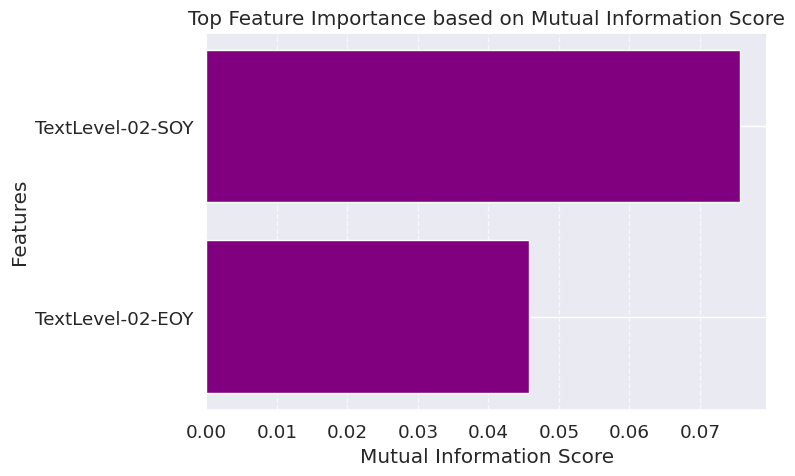

In [ ]:
#Target Features
top_features = [
    ("TextLevel-02-SOY", 0.075689),
    ("TextLevel-02-EOY", 0.045756)
]

# Unpack
features, scores = zip(*top_features)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(features, scores, color='purple')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Top Feature Importance based on Mutual Information Score')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming your DataFrame is called Data2Intel_EduRisk_Dataset
numeric_features = Data2Intel_EduRisk_Dataset.select_dtypes(include='number').columns.tolist()

# Optional: remove the target column if it's in there
numeric_features.remove('At_Risk_Numeracy')


## Model Building

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

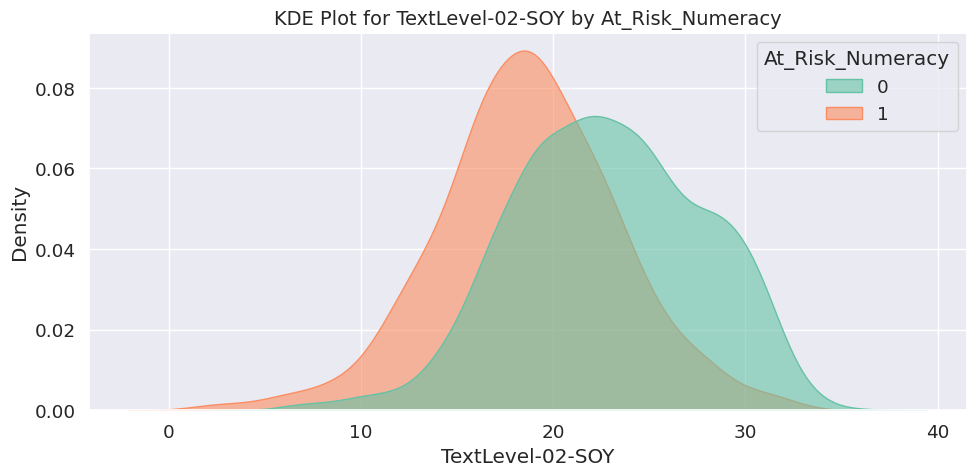

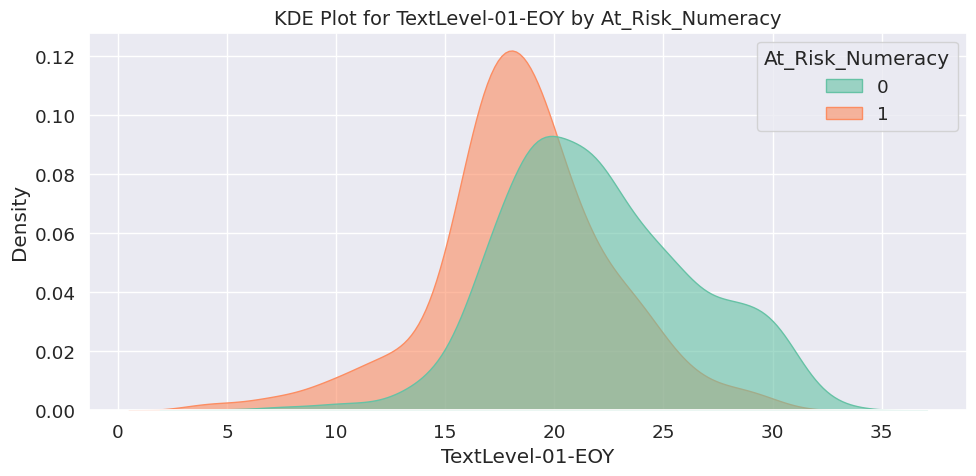

In [ ]:
# Your selected features for clustering
cluster_features = [
   "TextLevel-02-SOY",

   "TextLevel-01-EOY",
]

# Plot KDE for each feature with At_Risk_Numeracy as hue
for feature in cluster_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(
        data=Data2Intel_EduRisk_Dataset,
        x=feature,
        hue='At_Risk_Numeracy',
        fill=True,
        common_norm=False,
        palette='Set2',
        alpha=0.6
    )
    plt.title(f"KDE Plot for {feature} by At_Risk_Numeracy", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Use features based on your project
cluster_inputs = [

   "TextLevel-02-SOY",

   "TextLevel-01-EOY",
    ]

X_cluster = Data2Intel_EduRisk_Dataset[cluster_inputs]


## Scaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_cluster = MinMaxScaler()
X_cluster_scaled_values = scaler_cluster.fit_transform(X_cluster)

X_cluster_scaled = pd.DataFrame(X_cluster_scaled_values, columns=cluster_inputs)
X_cluster_scaled.describe()

TextLevel-02-SOY  TextLevel-01-EOY
count       2000.000000       2000.000000
mean           0.581956          0.571000
std            0.153535          0.152620
min            0.000000          0.000000
25%            0.470588          0.466667
50%            0.588235          0.566667
75%            0.676471          0.666667
max            1.000000          1.000000

In [ ]:
from sklearn.cluster import KMeans

k_guess =4
kmeans_cluster_model = KMeans(n_clusters=k_guess, n_init='auto', max_iter=300, random_state=2024)
kmeans_cluster_model.fit(X_cluster_scaled)

KMeans(n_clusters=4, random_state=2024)

In [ ]:
Data2Intel_EduRisk_Dataset['Cluster'] = kmeans_cluster_model.labels_


## Within-Cluster Sum of Squares

In [ ]:
# Calculate Within-Cluster Sum of Squares (WCSS)
wcss = kmeans_cluster_model.inertia_
print("Within-Cluster Sum of Squares (WCSS):", round(wcss, 3))


Within-Cluster Sum of Squares (WCSS): 18.979


## Davies_bouldin_score

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate DBI
dbi = davies_bouldin_score(X_cluster_scaled, kmeans_cluster_model.labels_)
print("Davies-Bouldin Index:", round(dbi, 3))


Davies-Bouldin Index: 0.795


## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette = silhouette_score(X_cluster_scaled, kmeans_cluster_model.labels_)
print("Silhouette Score:", round(silhouette, 3))


Silhouette Score: 0.401


## Plot silhouette diagram

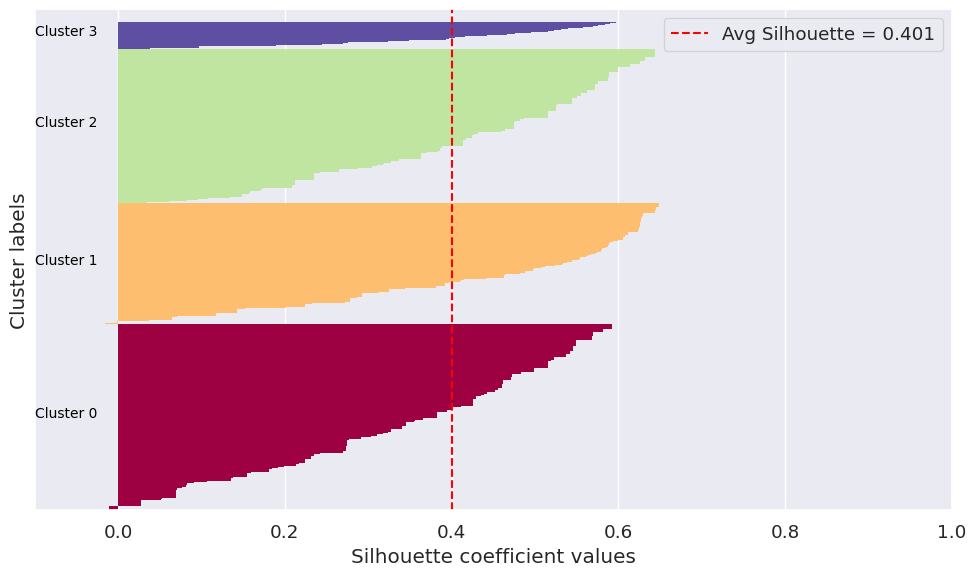

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_score, silhouette_samples

# Use the scaled cluster data and labels you already have
X_scaled = X_cluster_scaled
cluster_labels = kmeans_cluster_model.labels_

# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Number of clusters (adjust if needed)
n_clusters = len(np.unique(cluster_labels))

# Plot silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 0

# Define colormap (options: autumn, Spectral, viridis, plasma, cool, jet)
cmap = cm.Spectral
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cmap(values[i])
    ax.barh(
        range(y_lower, y_upper),
        ith_cluster_silhouette_values,
        height=1.0,
        edgecolor='none',
        color=color
    )
    ax.text(-0.1, (y_lower + y_upper) / 2, f'Cluster {i}', fontsize=10, color='black')
    y_lower = y_upper

ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg Silhouette = {silhouette_avg:.3f}")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
ax.legend()

plt.tight_layout()
plt.show()


## optimal number of clusters using the SSE metric

In [ ]:
from sklearn.cluster import KMeans

sse_scores = []
best_k = 6
best_sse_score = 9999  # Set a high initial SSE value

for i in range(2, 41):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=2024)
    kmeans.fit(X_cluster_scaled)  # Use your scaled data for clustering
    sse_score_i = kmeans.inertia_
    sse_scores.append(sse_score_i)

    if sse_score_i < best_sse_score:
        best_k = i
        best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squared errors (SSE): {:.3f}'.format(best_sse_score))


Best k:  40
Best within cluster sum of squared errors (SSE): 2.112


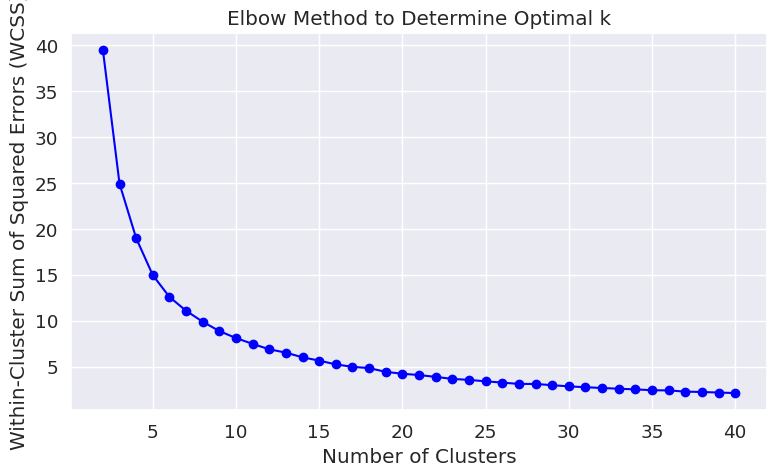

In [ ]:
# Plot the WCSS (sse_scores) to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 41), sse_scores, marker='o', color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squared Errors (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()


## Davies-Bouldin indices to determine optimal number of clusters

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Determine optimal number of clusters using Davies-Bouldin Index (DBI)
dbs_scores = []
best_k = 6
best_dbs_score = float('inf')  # Set initial DBI to infinity for minimization

for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=2024)
    kmeans.fit(X_cluster_scaled)
    dbs_score_k = davies_bouldin_score(X_cluster_scaled, kmeans.labels_)
    dbs_scores.append(dbs_score_k)

    if dbs_score_k < best_dbs_score:
        best_k = k
        best_dbs_score = dbs_score_k

print('Best k:', best_k)
print('Best Davies-Bouldin index: {:.3f}'.format(best_dbs_score))


Best k: 2
Best Davies-Bouldin index: 0.719


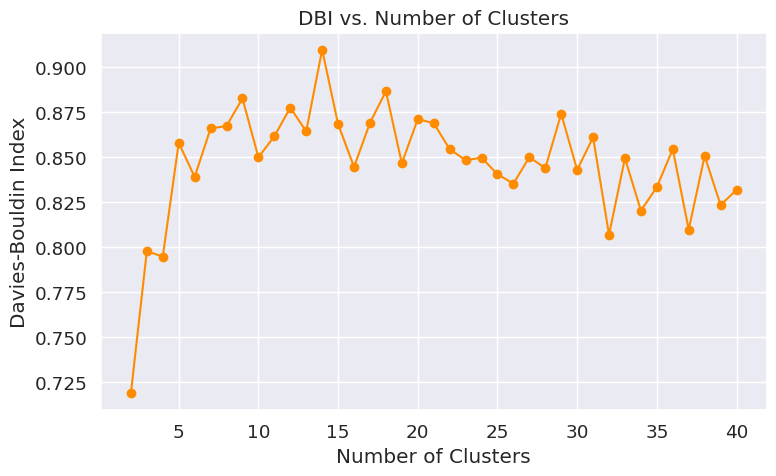

In [ ]:
# Plot the Davies-Bouldin indices to determine optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 41), dbs_scores, color='darkorange', marker='o', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('DBI vs. Number of Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()


## optimal number of clusters using Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Determine optimal number of clusters using Silhouette Score
sil_scores = []
best_k = 6
best_sil_score = -1  # Initialize to -1 because silhouette scores range from -1 to 1

for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=2024)
    kmeans.fit(X_cluster_scaled)
    sil_score_k = silhouette_score(X_cluster_scaled, kmeans.labels_)
    sil_scores.append(sil_score_k)

    if sil_score_k > best_sil_score:
        best_k = k
        best_sil_score = sil_score_k

print('Best k:', best_k)
print('Best silhouette score: {:.3f}'.format(best_sil_score))


Best k: 2
Best silhouette score: 0.492


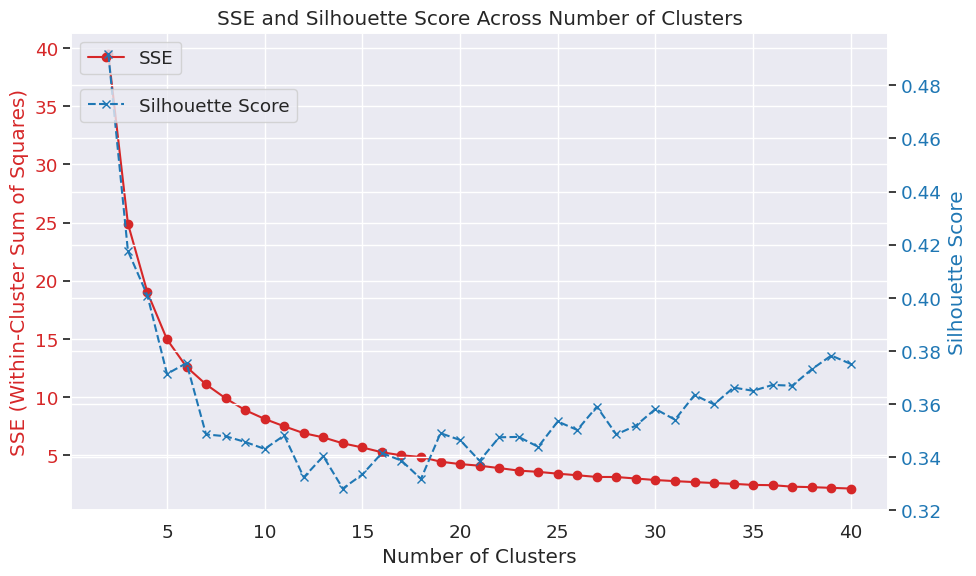

In [ ]:
import matplotlib.pyplot as plt

cluster_range = range(2, 41)

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot SSE (Within-Cluster Sum of Squares)
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE (Within-Cluster Sum of Squares)', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', color=color, label='SSE')
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Legends
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

# Title and layout
plt.title("SSE and Silhouette Score Across Number of Clusters")
plt.tight_layout()
plt.show()


## After Optimising K

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans

# Assuming you have determined best_k = 2
best_k = 2

# Initialise the KMeans model object
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=2024)

# Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_cluster_scaled)

# Add cluster labels to original dataset
Data2Intel_EduRisk_Dataset['Cluster'] = kmeans.labels_

# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", f"{wcss:.3f}")

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_cluster_scaled, kmeans.labels_)
print("Davies-Bouldin index:", f"{dbs:.3f}")

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_cluster_scaled, kmeans.labels_)
print("Silhouette score:", f"{silhouette_avg:.3f}")


Within-Cluster Sum of Squares (WCSS): 39.479
Davies-Bouldin index: 0.719
Silhouette score: 0.492


## silhouette Plot

<ipython-input-234-d7af08ee8bdb>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Spectral")


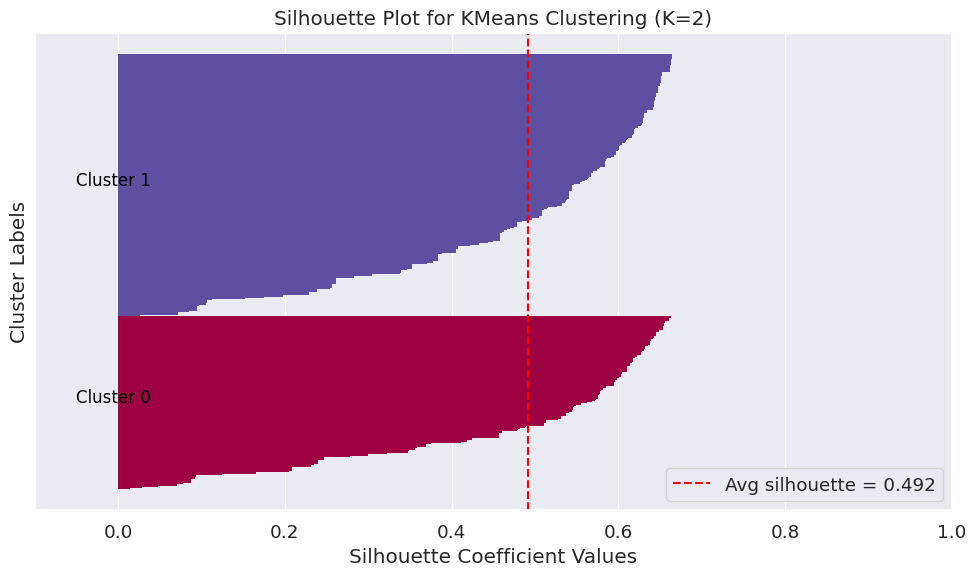

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Assuming X_scaled is your scaled data

# Fit KMeans model with k=2
k = 2
kmeans = KMeans(n_clusters=k, random_state=2024)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Compute average silhouette score and individual sample silhouette values
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 0

# Define colormap
cmap = cm.get_cmap("Spectral")
values = np.linspace(0, 1, k)

for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0, edgecolor='none', color=color)

    ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i}', fontsize=12, color='black')
    y_lower = y_upper

# Draw vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Avg silhouette = {silhouette_avg:.3f}')

# Labels and limits
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_title(f"Silhouette Plot for KMeans Clustering (K={k})")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
selectedD_features = ["TextLevel-02-SOY", "TextLevel-01-EOY"]
X_cluster = Data2Intel_EduRisk_Dataset[selectedD_features]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2024)
kmeans.fit(X_cluster_scaled)

KMeans(n_clusters=2, random_state=2024)

In [ ]:
num_features = len(selectedD_features)

print("\nCluster Centroids:")
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {idx} centroid values:")
    for feature_idx in range(num_features):
        print(f"  {selectedD_features[feature_idx]}: {centroid[feature_idx]:.2f}")
    print()
Data2Intel_EduRisk_Dataset['Cluster'] = kmeans.labels_



Cluster Centroids:
Cluster 0 centroid values:
  TextLevel-02-SOY: 0.94
  TextLevel-01-EOY: 0.93

Cluster 1 centroid values:
  TextLevel-02-SOY: -0.62
  TextLevel-01-EOY: -0.61



## Pie chart-Distribution of clusters

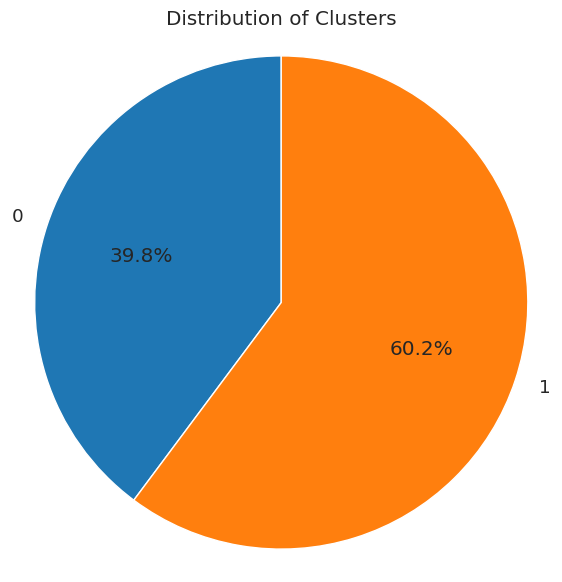

In [ ]:
cluster_count = Data2Intel_EduRisk_Dataset['Cluster'].value_counts()
sorted_cluster_count = cluster_count.sort_index()
colours = sns.color_palette("tab10", n_colors=len(sorted_cluster_count))

plt.figure(figsize=(7, 7))
plt.pie(sorted_cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors=colours, startangle=90)
plt.title('Distribution of Clusters')
plt.axis('equal')
plt.show()

##  Plot the Centroids

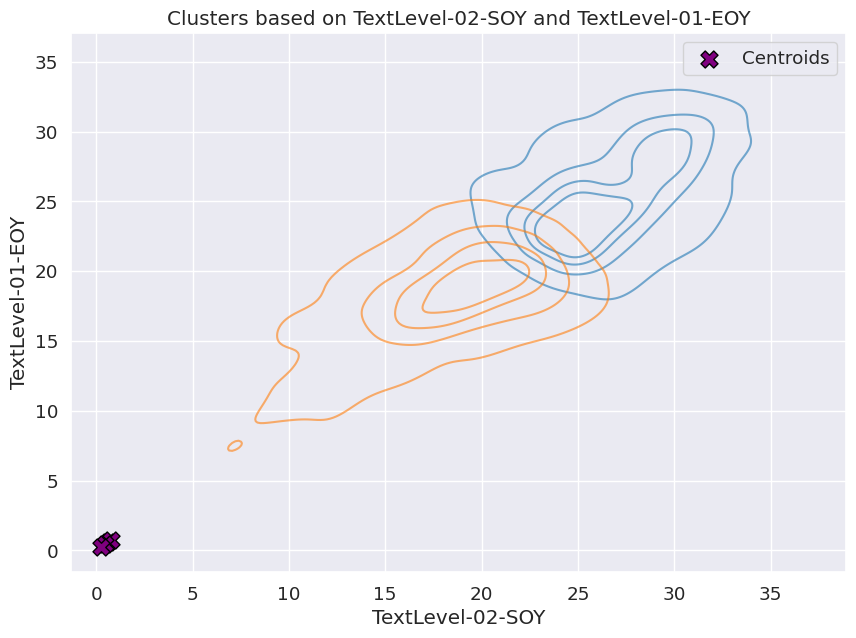

In [ ]:



# Get centroids (in scaled feature space)
centroids_scaled = kmeans_cluster_model.cluster_centers_

# Plot KDE contours for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("tab10", n_colors=len(centroids_scaled))

for cluster_id in np.unique(Data2Intel_EduRisk_Dataset['Cluster']):
    subset = Data2Intel_EduRisk_Dataset[Data2Intel_EduRisk_Dataset['Cluster'] == cluster_id]
    sns.kdeplot(
        x=subset['TextLevel-02-SOY'], y=subset['TextLevel-01-EOY'],
        levels=5,  # number of contour lines
        color=palette[cluster_id],
        label=f'Cluster {cluster_id}',
        fill=False, alpha=0.6
    )

# Plot centroids (in scaled space)
# If you want centroids in original scale, inverse transform first (if scaled)
plt.scatter(
    centroids_scaled[:, 0], centroids_scaled[:, 1],
    c='purple', marker='X', s=150, label='Centroids', edgecolor='black'
)

plt.title('Clusters based on TextLevel-02-SOY and TextLevel-01-EOY')
plt.xlabel('TextLevel-02-SOY')
plt.ylabel('TextLevel-01-EOY')
plt.legend()
plt.show()


## Plot 3D Sub plot

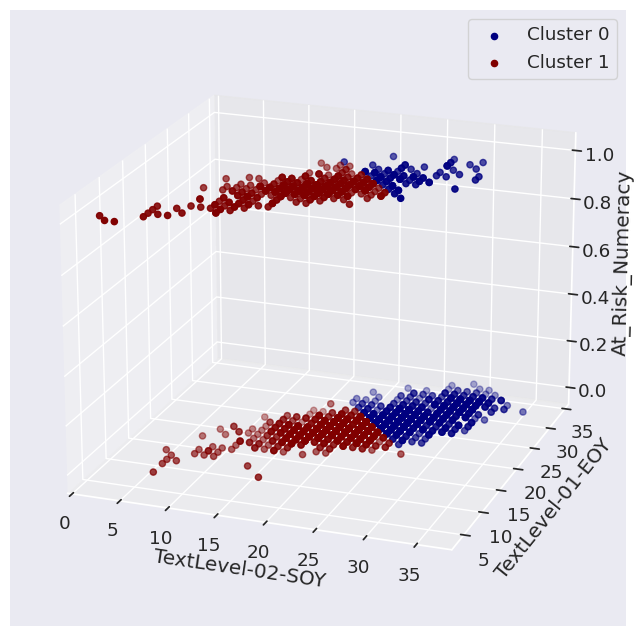

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Unique clusters from your dataset
unique_clusters = Data2Intel_EduRisk_Dataset['Cluster'].unique()

# Color map for clusters
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

# Adjust view angle for better visibility
ax.view_init(elev=20, azim=-70)

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = Data2Intel_EduRisk_Dataset[Data2Intel_EduRisk_Dataset['Cluster'] == cluster]
    ax.scatter(
        cluster_data['TextLevel-02-SOY'],
        cluster_data['TextLevel-01-EOY'],
        cluster_data['At_Risk_Numeracy'],  # or replace 'Cluster' with another numeric variable you want to plot on Z-axis
        label=f'Cluster {cluster}',
        color=colors[i]
    )

# Axis labels and legend
ax.set_xlabel('TextLevel-02-SOY')
ax.set_ylabel('TextLevel-01-EOY')
ax.set_zlabel('At_Risk_Numeracy')
ax.legend()

plt.show()


## 3D Scatter plot for clusters

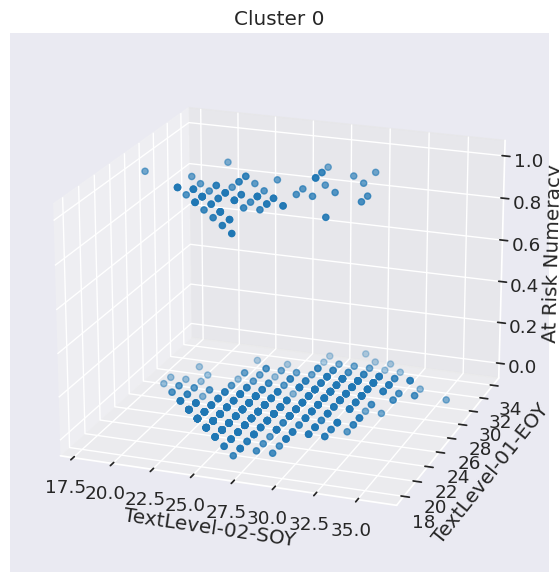

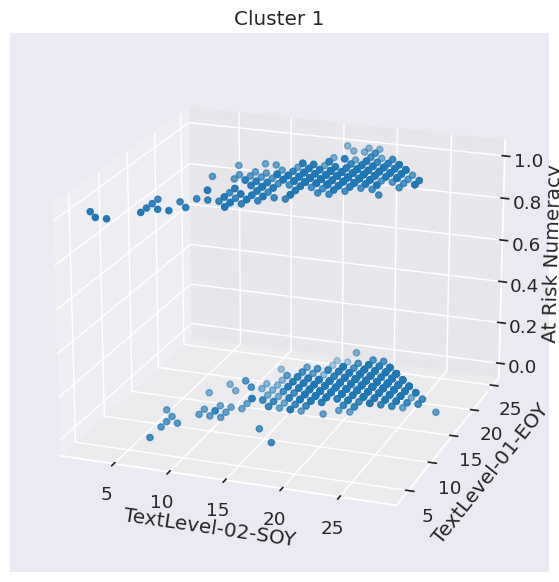

In [ ]:
import matplotlib.pyplot as plt

unique_clusters = Data2Intel_EduRisk_Dataset['Cluster'].unique()

for cluster in unique_clusters:
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Filter data for the current cluster
    cluster_data = Data2Intel_EduRisk_Dataset[Data2Intel_EduRisk_Dataset['Cluster'] == cluster]

    # Create 3D scatter plot
    ax.scatter(
        cluster_data['TextLevel-02-SOY'],
        cluster_data['TextLevel-01-EOY'],
        cluster_data['At_Risk_Numeracy'],  # or replace with 'Cluster' if you want
        label=f'Cluster {cluster}'
    )

    # Set viewing angle
    ax.view_init(elev=20, azim=-70)

    # Titles and labels
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('TextLevel-02-SOY')
    ax.set_ylabel('TextLevel-01-EOY')
    ax.set_zlabel('At Risk Numeracy')

    plt.show()


## KDE AND BOXPLOT

TextLevel-02-SOY :

          count       mean       std   min   25%   50%   75%   max
Cluster                                                           
0         796.0  26.711055  2.964261  18.0  24.0  27.0  29.0  36.0
1        1204.0  18.530731  3.580433   2.0  17.0  19.0  21.0  28.0




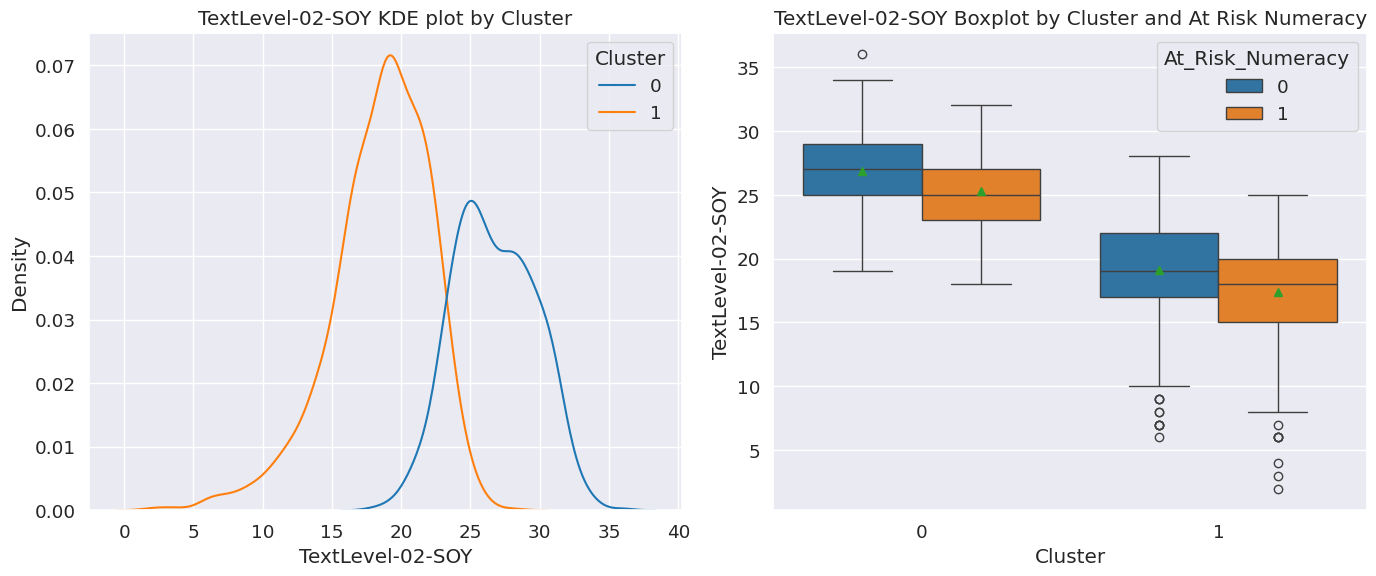

TextLevel-01-EOY :

          count       mean       std   min   25%   50%   75%   max
Cluster                                                           
0         796.0  25.374372  3.099287  18.0  23.0  25.0  28.0  34.0
1        1204.0  18.323920  2.947260   4.0  17.0  19.0  20.0  25.0




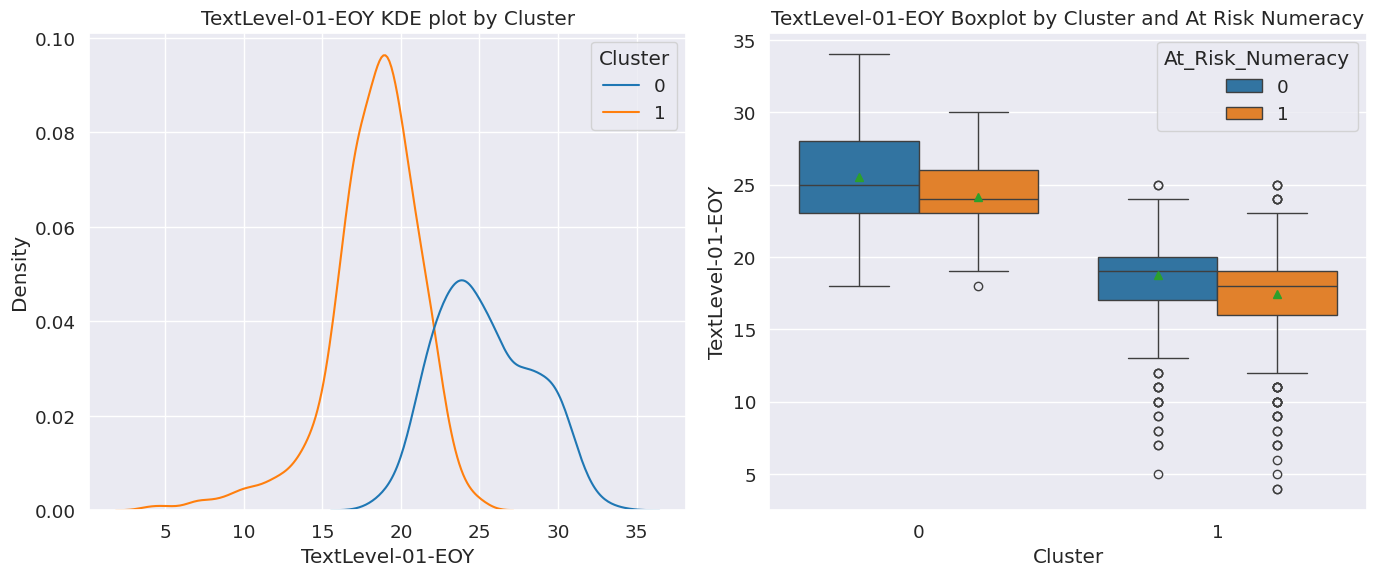

In [ ]:


# Your numeric features you want to analyze
nums = [
    "TextLevel-02-SOY",
    "TextLevel-01-EOY"
]

for feature in nums:
    print(feature, ':\n')
    print(Data2Intel_EduRisk_Dataset.groupby('Cluster')[feature].describe())
    print('\n')

    # Create subplots for KDE and Boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # KDE plot by cluster
    sns.kdeplot(data=Data2Intel_EduRisk_Dataset, x=feature, hue='Cluster', palette='tab10', ax=axes[0])
    axes[0].set_title(f'{feature} KDE plot by Cluster')

    # Boxplot by cluster with At_Risk_Numeracy as hue
    sns.boxplot(data=Data2Intel_EduRisk_Dataset, x='Cluster', y=feature, hue='At_Risk_Numeracy', showmeans=True, ax=axes[1])
    axes[1].set_title(f'{feature} Boxplot by Cluster and At Risk Numeracy')

    plt.tight_layout()
    plt.show()


## Cluster map of correlation matrix

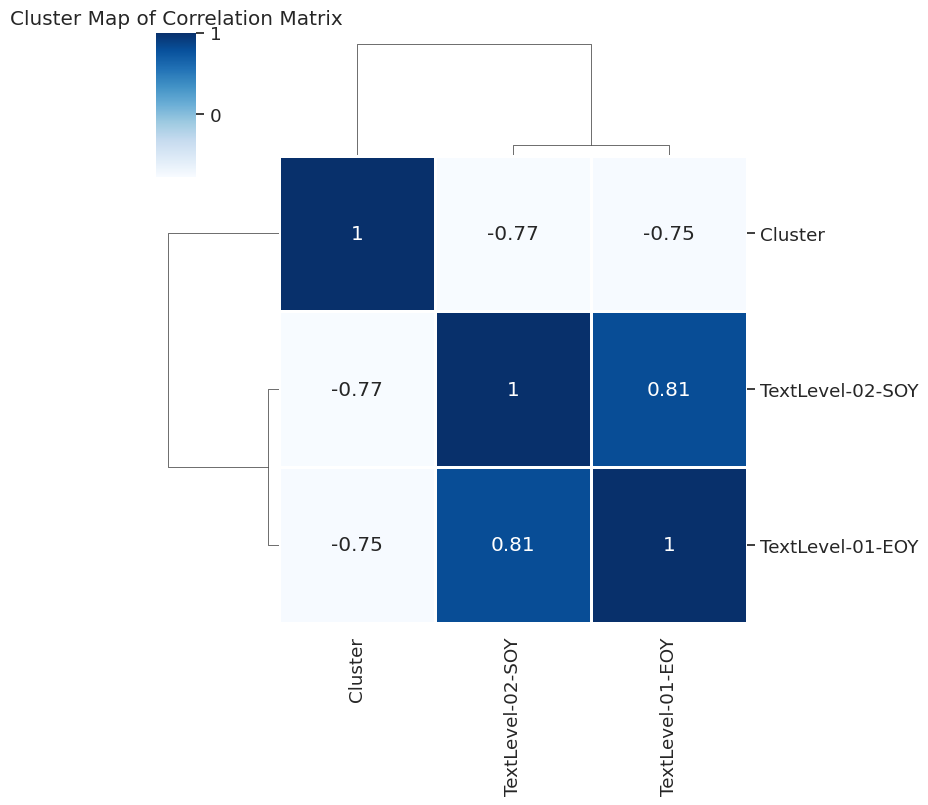

In [ ]:
# Select relevant columns (features + cluster)
selected_columns = [
    "TextLevel-02-SOY",
    "TextLevel-01-EOY",
    "Cluster"
]

# Compute correlation matrix
corr_matrix = Data2Intel_EduRisk_Dataset[selected_columns].corr()

# Plot cluster map
sns.clustermap(corr_matrix, cmap="Blues", linewidths=.9, annot=True, figsize=(8, 8))

plt.title("Cluster Map of Correlation Matrix")
plt.show()
